In [1]:
#Importing essential python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing nrclex for sentiment analysis and emotion detection
!pip install nrclex

In [3]:
from nrclex import NRCLex

In [4]:
#Importing comments on Puma's Instagram Posts
pumaInsta = pd.read_csv('PumaInstaComments.csv')
pumaInsta

profilePictureUrl            username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...             puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...     _imyourgreentea   
2      https://scontent.cdninstagram.com/v/t51.2885-1...      robbie.omahony   
3      https://scontent.cdninstagram.com/v/t51.2885-1...         nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...           huijeongs   
...                                                  ...                 ...   
60886  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60887  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60888  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60889  https://scontent-cdg4-3.cdninstagram.com/v/t51...          yoyo222884   
60890  https://scontent-cdg4-2.cdninstagram.com/v/t51...  clippersoffpodcast   

                                         profileUrl  \
0                 https://www.instagram.com/puma.uk   
1         https://www.instagram.com/_imyourgreentea   
2          https://www.instagram.com/robbie.omahony   
3             https://www.instagram.com/nicogchehab   
4               https://www.instagram.com/huijeongs   
...                                             ...   
60886       https://www.instagram.com/h.a.m.i.d____   
60887       https://www.instagram.com/h.a.m.i.d____   
60888       https://www.instagram.com/h.a.m.i.d____   
60889          https://www.instagram.com/yoyo222884   
60890  https://www.instagram.com/clippersoffpodcast   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
2                                                    NaN          5   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
...                                                  ...        ...   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻          1   
60887                                             👏🔥👏🔥👏🔥          1   
60888                                           👏🏻👏🏻👏🏻👏🏻          0   
60889                                My favorite brand 🤩          0   
60890                                                  🔥          0   

       replyCount               commentDate     commentId      ownerId  \
0               1  2023-05-19T09:39:44.000Z  1.810000e+16  52254607088   
1               0  2023-05-19T08:07:54.000Z  1.800000e+16  26554098971   
2               0  2023-05-19T10:15:09.000Z  1.800000e+16  11297028939   
3               0  2023-05-19T12:36:20.000Z  1.800000e+16   2867998756   
4               0  2023-05-19T08:05:33.000Z  1.800000e+16    842764645   
...           ...                       ...           ...          ...   
60886           0  2022-09-10T19:20:02.000Z  1.790000e+16   3432165999   
60887           0  2022-09-10T19:19:59.000Z  1.800000e+16   3432165999   
60888           0  2022-09-10T19:19:59.000Z  1.790000e+16   3432165999   
60889           0  2022-09-10T19:19:24.000Z  1.800000e+16  50210814297   
60890           0  2022-09-10T19:18:44.000Z  1.790000e+16  50105501252   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
2      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60886  2023-07-17T10:26:02.349Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60887  2023-07-17T10:26:02.349Z  https://www.instagram.com/

In [5]:
#Selecting the features required for the analysis which includes comments, number of likes, number of replies on each comment and the source
pumaInstaTask1 = pumaInsta[['comment', 'commentDate', 'likeCount', 'replyCount', 'Source']]
pumaInstaTask1

comment  \
0                                    Sky blue forever 🙌💙   
1                                 The green is so good!!   
2                                                    NaN   
3      The shirt that commemorates the 115 charges th...   
4      puma so perfect design 👏I like color and this ...   
...                                                  ...   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻   
60887                                             👏🔥👏🔥👏🔥   
60888                                           👏🏻👏🏻👏🏻👏🏻   
60889                                My favorite brand 🤩   
60890                                                  🔥   

                    commentDate  likeCount  replyCount     Source  
0      2023-05-19T09:39:44.000Z         58           1  Instagram  
1      2023-05-19T08:07:54.000Z         11           0  Instagram  
2      2023-05-19T10:15:09.000Z          5           0  Instagram  
3      2023-05-19T12:36:20.000Z          1           0  Instagram  
4      2023-05-19T08:05:33.000Z          7           0  Instagram  
...                         ...        ...         ...        ...  
60886  2022-09-10T19:20:02.000Z          1           0  Instagram  
60887  2022-09-10T19:19:59.000Z          1           0  Instagram  
60888  2022-09-10T19:19:59.000Z          0           0  Instagram  
60889  2022-09-10T19:19:24.000Z          0           0  Instagram  
60890  2022-09-10T19:18:44.000Z          0           0  Instagram  

[60891 rows x 5 columns]

In [6]:
#Renaming the columns to maintain uniformity
pumaInstaTask1 = pumaInstaTask1.rename(columns =  {'comment' : 'Text' , 'commentDate' : 'postDate', 'likeCount' : 'likes', 'replyCount' : 'replies'})
pumaInstaTask1

Text  \
0                                    Sky blue forever 🙌💙   
1                                 The green is so good!!   
2                                                    NaN   
3      The shirt that commemorates the 115 charges th...   
4      puma so perfect design 👏I like color and this ...   
...                                                  ...   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻   
60887                                             👏🔥👏🔥👏🔥   
60888                                           👏🏻👏🏻👏🏻👏🏻   
60889                                My favorite brand 🤩   
60890                                                  🔥   

                       postDate  likes  replies     Source  
0      2023-05-19T09:39:44.000Z     58        1  Instagram  
1      2023-05-19T08:07:54.000Z     11        0  Instagram  
2      2023-05-19T10:15:09.000Z      5        0  Instagram  
3      2023-05-19T12:36:20.000Z      1        0  Instagram  
4      2023-05-19T08:05:33.000Z      7        0  Instagram  
...                         ...    ...      ...        ...  
60886  2022-09-10T19:20:02.000Z      1        0  Instagram  
60887  2022-09-10T19:19:59.000Z      1        0  Instagram  
60888  2022-09-10T19:19:59.000Z      0        0  Instagram  
60889  2022-09-10T19:19:24.000Z      0        0  Instagram  
60890  2022-09-10T19:18:44.000Z      0        0  Instagram  

[60891 rows x 5 columns]

In [7]:
#Importing Tweets from the Twitter related to Puma
pumaTwitter = pd.read_csv('PumaTweets2.csv')
pumaTwitter

tweetDate  \
0     Sun Jul 16 10:44:33 +0000 2023   
1     Sun Jul 09 23:01:41 +0000 2023   
2     Fri Jul 14 13:41:00 +0000 2023   
3     Sun Jul 16 23:23:33 +0000 2023   
4     Sat Jul 15 18:58:00 +0000 2023   
...                              ...   
4254  Thu Jul 20 10:35:21 +0000 2023   
4255  Tue Jul 18 04:32:05 +0000 2023   
4256  Fri Jul 14 05:20:08 +0000 2023   
4257  Sat Jul 15 10:05:57 +0000 2023   
4258  Mon Jul 17 11:06:01 +0000 2023   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[4259 rows x 10 columns]

In [8]:
#Selecting the features essential for the analysis
pumaTwitterTask1 = pumaTwitter[['content' , 'tweetDate', 'Likes', 'Retweet', 'Source']]

In [9]:
#Renaming the columns to maintain uniformity
pumaTwitterTask1 = pumaTwitterTask1.rename(columns = { 'content' : 'Text','tweetDate' : 'postDate', 'Likes' : 'likes', 'Retweet' : 'replies'})
pumaTwitterTask1

Text  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                            postDate  likes  replies   Source  
0     Sun Jul 16 10:44:33 +0000 2023   10.0      2.0  Twitter  
1     Sun Jul 09 23:01:41 +0000 2023   41.0      2.0  Twitter  
2     Fri Jul 14 13:41:00 +0000 2023   24.0      5.0  Twitter  
3     Sun Jul 16 23:23:33 +0000 2023   10.0      1.0  Twitter  
4     Sat Jul 15 18:58:00 +0000 2023  519.0     29.0  Twitter  
...                              ...    ...      ...      ...  
4254  Thu Jul 20 10:35:21 +0000 2023    0.0      0.0  Twitter  
4255  Tue Jul 18 04:32:05 +0000 2023    NaN      NaN  Twitter  
4256  Fri Jul 14 05:20:08 +0000 2023    NaN      NaN  Twitter  
4257  Sat Jul 15 10:05:57 +0000 2023   46.0     11.0  Twitter  
4258  Mon Jul 17 11:06:01 +0000 2023    0.0      0.0  Twitter  

[4259 rows x 5 columns]

In [10]:
#Merging the comments and tweets into a final dataset
pumaTask1DataFinal = pumaTwitterTask1.append(pumaInstaTask1, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\3968048217.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pumaTask1DataFinal = pumaTwitterTask1.append(pumaInstaTask1, ignore_index=True)


In [11]:
pumaTask1DataFinal

Text  \
0      👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1      Painting some old #puma keep going with artsy ...   
2      JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3      #puma #mountainlion #peten #guatemala #bwild h...   
4      Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                  ...   
65145                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻   
65146                                             👏🔥👏🔥👏🔥   
65147                                           👏🏻👏🏻👏🏻👏🏻   
65148                                My favorite brand 🤩   
65149                                                  🔥   

                             postDate  likes  replies     Source  
0      Sun Jul 16 10:44:33 +0000 2023   10.0      2.0    Twitter  
1      Sun Jul 09 23:01:41 +0000 2023   41.0      2.0    Twitter  
2      Fri Jul 14 13:41:00 +0000 2023   24.0      5.0    Twitter  
3      Sun Jul 16 23:23:33 +0000 2023   10.0      1.0    Twitter  
4      Sat Jul 15 18:58:00 +0000 2023  519.0     29.0    Twitter  
...                               ...    ...      ...        ...  
65145        2022-09-10T19:20:02.000Z    1.0      0.0  Instagram  
65146        2022-09-10T19:19:59.000Z    1.0      0.0  Instagram  
65147        2022-09-10T19:19:59.000Z    0.0      0.0  Instagram  
65148        2022-09-10T19:19:24.000Z    0.0      0.0  Instagram  
65149        2022-09-10T19:18:44.000Z    0.0      0.0  Instagram  

[65150 rows x 5 columns]

In [12]:
#Updating the datatype of postDate from String to Date
pumaTask1DataFinal['postDate'] = pd.to_datetime(pumaTask1DataFinal['postDate'])

In [13]:
#Creating a DataSet containing all the comments and Tweets after the launch of the campaign on 20th Novermber 2023
pumaTask1DataFinalAfter = pumaTask1DataFinal[pumaTask1DataFinal['postDate'] > '2022-11-20']
pumaTask1DataFinalAfter

Text  \
0      👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1      Painting some old #puma keep going with artsy ...   
2      JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3      #puma #mountainlion #peten #guatemala #bwild h...   
4      Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                  ...   
64565                                             Precio   
64662                                            Davido🖤   
64663                            🔥🔥🔥🔥🔥🔥🔥❤️❤️❤️❤️❤️❤️❤️❤️   
64930                                               💜®️.   
65101                                                🔥🔥🔥   

                       postDate  likes  replies     Source  
0     2023-07-16 10:44:33+00:00   10.0      2.0    Twitter  
1     2023-07-09 23:01:41+00:00   41.0      2.0    Twitter  
2     2023-07-14 13:41:00+00:00   24.0      5.0    Twitter  
3     2023-07-16 23:23:33+00:00   10.0      1.0    Twitter  
4     2023-07-15 18:58:00+00:00  519.0     29.0    Twitter  
...                         ...    ...      ...        ...  
64565 2023-02-12 09:00:03+00:00    0.0      1.0  Instagram  
64662 2023-01-03 10:44:07+00:00    0.0      0.0  Instagram  
64663 2022-12-06 00:45:47+00:00    0.0      0.0  Instagram  
64930 2023-01-26 17:13:07+00:00    0.0      0.0  Instagram  
65101 2023-04-15 03:20:53+00:00    0.0      0.0  Instagram  

[30950 rows x 5 columns]

In [14]:
#Selecting 1500 datapoints just after the launch of the campaign for the analysis
pumaTask1DataFinalAfter = pumaTask1DataFinalAfter.sort_values(by=['postDate'],ascending=True)
pumaTask1DataFinalAfter = pumaTask1DataFinalAfter.head(1500)
pumaTask1DataFinalAfter

Text  \
60426                                            Zayuuum   
63732                                            #dapper   
56978                                       ❤️🙌🔥Good Job   
58999                                               🇧🇷🇧🇷   
2654   "Success is achieved by developing our strengt...   
...                                                  ...   
29683                                         Beutifil 😍   
29684                                                ❤️🔥   
29685                                       I♥️ @dualipa   
29686                                               😍😍😍😍   
29687                                            HoTT 🔥🔥   

                       postDate  likes  replies     Source  
60426 2022-11-20 00:53:11+00:00    0.0      0.0  Instagram  
63732 2022-11-20 04:51:32+00:00    0.0      0.0  Instagram  
56978 2022-11-20 14:32:25+00:00    0.0      0.0  Instagram  
58999 2022-11-20 15:00:16+00:00    0.0      0.0  Instagram  
2654  2022-11-20 15:27:48+00:00    NaN      NaN    Twitter  
...                         ...    ...      ...        ...  
29683 2022-11-25 21:50:32+00:00    0.0      0.0  Instagram  
29684 2022-11-25 21:50:41+00:00    0.0      0.0  Instagram  
29685 2022-11-25 21:51:01+00:00    0.0      0.0  Instagram  
29686 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram  
29687 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram  

[1500 rows x 5 columns]

In [15]:
#Creating a DataSet containing all the comments and Tweets before the launch of the campaign on 20th Novermber 2023
pumaTask1DataFinalBefore = pumaTask1DataFinal[pumaTask1DataFinal['postDate'] < '2022-11-20']
pumaTask1DataFinalBefore

Text  \
2595   Today is the only day we've got, and today is ...   
2596   Please, whatever you do. Because, I mean, ther...   
2597   Absolute honour to be working with @PrincesTru...   
2598   Powerful #motivational messages at your finger...   
2599   Stop thinking about it and get out there and d...   
...                                                  ...   
65145                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻   
65146                                             👏🔥👏🔥👏🔥   
65147                                           👏🏻👏🏻👏🏻👏🏻   
65148                                My favorite brand 🤩   
65149                                                  🔥   

                       postDate  likes  replies     Source  
2595  2020-10-08 10:23:33+00:00    NaN      NaN    Twitter  
2596  2018-09-21 14:59:09+00:00    NaN      NaN    Twitter  
2597  2022-09-30 08:57:48+00:00    NaN      NaN    Twitter  
2598  2017-11-16 10:31:51+00:00    NaN      NaN    Twitter  
2599  2020-03-17 19:29:41+00:00    NaN      NaN    Twitter  
...                         ...    ...      ...        ...  
65145 2022-09-10 19:20:02+00:00    1.0      0.0  Instagram  
65146 2022-09-10 19:19:59+00:00    1.0      0.0  Instagram  
65147 2022-09-10 19:19:59+00:00    0.0      0.0  Instagram  
65148 2022-09-10 19:19:24+00:00    0.0      0.0  Instagram  
65149 2022-09-10 19:18:44+00:00    0.0      0.0  Instagram  

[34199 rows x 5 columns]

In [16]:
#Selecting 1500 datapoints just before the launch of the campaign for the analysis
pumaTask1DataFinalBefore = pumaTask1DataFinalBefore.sort_values(by=['postDate'],ascending=True)
pumaTask1DataFinalBefore = pumaTask1DataFinalBefore.head(1500)
pumaTask1DataFinalBefore

Text  \
3336   #Puma shoe company tackles #sustainability wit...   
3345   RT @CeresNews: #Puma shoe company tackles #sus...   
3312   #Puma changes the shoebox game with a commitme...   
3359   RT @PrintersLounge: RT @packagingworld: #Puma ...   
3311   I think I need me some #Puma RT @GOOD Thinking...   
...                                                  ...   
42503                                       We love puma   
42502                                                  😍   
42501                                               ❤️❤️   
42500                                            Obo 🔥🔥🔥   
42499                                   ❤️❤️❤️ love puma   

                       postDate  likes  replies     Source  
3336  2010-04-13 15:09:30+00:00    NaN      NaN    Twitter  
3345  2010-04-13 15:10:50+00:00    NaN      NaN    Twitter  
3312  2010-05-11 16:56:11+00:00    NaN      NaN    Twitter  
3359  2010-05-11 17:06:06+00:00    NaN      NaN    Twitter  
3311  2010-07-20 13:24:18+00:00    NaN      NaN    Twitter  
...                         ...    ...      ...        ...  
42503 2022-01-18 16:13:13+00:00    0.0      0.0  Instagram  
42502 2022-01-18 16:13:43+00:00    0.0      0.0  Instagram  
42501 2022-01-18 16:14:09+00:00    0.0      0.0  Instagram  
42500 2022-01-18 16:14:14+00:00    0.0      0.0  Instagram  
42499 2022-01-18 16:16:08+00:00    0.0      0.0  Instagram  

[1500 rows x 5 columns]

In [17]:
#Importing libraries for Sentiment Analysis
#Importing TextBlob a Python Library to support NLP
from textblob import TextBlob
import re

import nltk
nltk.download('popular')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer

[nltk_data] Error loading popular: HTTP Error 503: first byte timeout
[nltk_data] Error loading stopwords: HTTP Error 503: Timed out while
[nltk_data]     waiting


In [18]:
#stopwords are the common words or fillers used in the sentence which does not add any value to the analysis
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [19]:
#Cleaning the data
#Includes lowercasing the text, removing emojis and breaking down words to their base

def cleanText(lst):
    cleaned_data=[]
    cleanedlst = []
    for i in range(len(lst)):
        contentB=re.sub('[^a-zA-Z]',' ',str(lst.iloc[i]))
        contentB=contentB.lower().split()
        contentB=[stemmer.stem(word) for word in contentB if (word not in stop_words)]
        contentB=(' '.join(contentB))
        cleanedlst.append(contentB)
        
    return cleanedlst

In [20]:
#Function to clean the text
def clean_tweet(text):
       
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text).split())

    
#Function to calculate Sentiment Index
#If the Polarity of the Sentiment is 0 then Neutral. 
#If the Polarity is greater than 0 then Positive.
#If the Polarity is less than 0 then Negative.

def sentiment_index(lst):
    countPositive = 0
    countNegative = 0
    countNeutral = 0
    sentimentListBefore = []
    for text in lst:
        analysis = TextBlob(clean_tweet(text))
        sentimentListBefore.append(analysis.sentiment.polarity)
        if(analysis.sentiment.polarity > 0):
            countPositive = countPositive + 1

        elif(analysis.sentiment.polarity == 0):
            countNeutral = countNeutral + 1

        else:
            countNegative = countNegative + 1
            
    return sentimentListBefore

In [21]:
#Getting Cleaned text
pumaTask1DataFinalBefore['cleaned_tweet'] = cleanText(pumaTask1DataFinalBefore['Text'])

In [22]:
#Getting Sentiment Index
pumaTask1DataFinalBefore['Sentiment_Index'] = sentiment_index(pumaTask1DataFinalBefore['cleaned_tweet'])

In [23]:
pumaTask1DataFinalBefore

Text  \
3336   #Puma shoe company tackles #sustainability wit...   
3345   RT @CeresNews: #Puma shoe company tackles #sus...   
3312   #Puma changes the shoebox game with a commitme...   
3359   RT @PrintersLounge: RT @packagingworld: #Puma ...   
3311   I think I need me some #Puma RT @GOOD Thinking...   
...                                                  ...   
42503                                       We love puma   
42502                                                  😍   
42501                                               ❤️❤️   
42500                                            Obo 🔥🔥🔥   
42499                                   ❤️❤️❤️ love puma   

                       postDate  likes  replies     Source  \
3336  2010-04-13 15:09:30+00:00    NaN      NaN    Twitter   
3345  2010-04-13 15:10:50+00:00    NaN      NaN    Twitter   
3312  2010-05-11 16:56:11+00:00    NaN      NaN    Twitter   
3359  2010-05-11 17:06:06+00:00    NaN      NaN    Twitter   
3311  2010-07-20 13:24:18+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
42503 2022-01-18 16:13:13+00:00    0.0      0.0  Instagram   
42502 2022-01-18 16:13:43+00:00    0.0      0.0  Instagram   
42501 2022-01-18 16:14:09+00:00    0.0      0.0  Instagram   
42500 2022-01-18 16:14:14+00:00    0.0      0.0  Instagram   
42499 2022-01-18 16:16:08+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet  Sentiment_Index  
3336   puma shoe compani tackl sustain innov packag r...         0.000000  
3345   rt ceresnew puma shoe compani tackl sustain w ...         0.000000  
3312   puma chang shoebox game commit true sustain ht...        -0.025000  
3359   rt printersloung rt packagingworld puma chang ...        -0.025000  
3311   think need puma rt good think outsid shoebox p...         0.222222  
...                                                  ...              ...  
42503                                          love puma         0.500000  
42502                                                            0.000000  
42501                                                            0.000000  
42500                                                obo         0.000000  
42499                                          love puma         0.500000  

[1500 rows x 7 columns]

In [24]:
#Getting Cleaned text
pumaTask1DataFinalAfter['cleaned_tweet'] = cleanText(pumaTask1DataFinalAfter['Text'])

In [25]:
#Getting Sentiment Index
pumaTask1DataFinalAfter['Sentiment_Index'] = sentiment_index(pumaTask1DataFinalAfter['cleaned_tweet'])

In [26]:
pumaTask1DataFinalAfter

Text  \
60426                                            Zayuuum   
63732                                            #dapper   
56978                                       ❤️🙌🔥Good Job   
58999                                               🇧🇷🇧🇷   
2654   "Success is achieved by developing our strengt...   
...                                                  ...   
29683                                         Beutifil 😍   
29684                                                ❤️🔥   
29685                                       I♥️ @dualipa   
29686                                               😍😍😍😍   
29687                                            HoTT 🔥🔥   

                       postDate  likes  replies     Source  \
60426 2022-11-20 00:53:11+00:00    0.0      0.0  Instagram   
63732 2022-11-20 04:51:32+00:00    0.0      0.0  Instagram   
56978 2022-11-20 14:32:25+00:00    0.0      0.0  Instagram   
58999 2022-11-20 15:00:16+00:00    0.0      0.0  Instagram   
2654  2022-11-20 15:27:48+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
29683 2022-11-25 21:50:32+00:00    0.0      0.0  Instagram   
29684 2022-11-25 21:50:41+00:00    0.0      0.0  Instagram   
29685 2022-11-25 21:51:01+00:00    0.0      0.0  Instagram   
29686 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   
29687 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet  Sentiment_Index  
60426                                            zayuuum           0.0000  
63732                                             dapper           0.0000  
56978                                           good job           0.7000  
58999                                                              0.0000  
2654   success achiev develop strength elimin weak ma...          -0.0375  
...                                                  ...              ...  
29683                                           beutifil           0.0000  
29684                                                              0.0000  
29685                                            dualipa           0.0000  
29686                                                              0.0000  
29687                                               hott           0.0000  

[1500 rows x 7 columns]

In [27]:
#Rounding off the Sentiment Index to 2 decimal places
pumaTask1DataFinalAfter['Sentiment_Index'] = pumaTask1DataFinalAfter['Sentiment_Index'].round(decimals = 2)
pumaTask1DataFinalBefore['Sentiment_Index'] = pumaTask1DataFinalBefore['Sentiment_Index'].round(decimals = 2)

In [28]:
#Function to calculate emotions
def getEmotionValue(emts):
    num=('neutral', 0)
    emotionValue = []
    for item in emts.top_emotions:
        if item[1]>num[1]:
            num=item #num has the whole tuple with the highest y value and its x value
            return num
            
        else:
            return num

        
#Calculating Emmotions of the text
def calculateEmotions(lst):
    emotionTextList = []

    for k in lst:
   
        emts = NRCLex(k)
        emotionCount = getEmotionValue(emts)
        emotionTextList.append(emotionCount[0])
        
    return emotionTextList

In [29]:
#Getting the emotions from the text
pumaTask1DataFinalAfter['emotionsOfText'] = calculateEmotions(pumaTask1DataFinalAfter['Text'])
pumaTask1DataFinalBefore['emotionsOfText'] = calculateEmotions(pumaTask1DataFinalBefore['Text'])

In [30]:
#Classifying Sentiments into Positive, Negative and Neutral
def sentimentScore(lst):
    sentimentScore = []
    for i in lst:
        if i > 0:
            sentimentScore.append('Positive')
        elif i < 0:
            sentimentScore.append('Negative')
        else:
            sentimentScore.append('Neutral')
            
    return sentimentScore

In [31]:
#Classify the Sentiments
pumaTask1DataFinalBefore['Sentiment_Index'] = sentimentScore(pumaTask1DataFinalBefore['Sentiment_Index'])
pumaTask1DataFinalAfter['Sentiment_Index'] = sentimentScore(pumaTask1DataFinalAfter['Sentiment_Index'])

In [32]:
pumaTask1DataFinalBefore
pumaTask1DataFinalAfter

Text  \
60426                                            Zayuuum   
63732                                            #dapper   
56978                                       ❤️🙌🔥Good Job   
58999                                               🇧🇷🇧🇷   
2654   "Success is achieved by developing our strengt...   
...                                                  ...   
29683                                         Beutifil 😍   
29684                                                ❤️🔥   
29685                                       I♥️ @dualipa   
29686                                               😍😍😍😍   
29687                                            HoTT 🔥🔥   

                       postDate  likes  replies     Source  \
60426 2022-11-20 00:53:11+00:00    0.0      0.0  Instagram   
63732 2022-11-20 04:51:32+00:00    0.0      0.0  Instagram   
56978 2022-11-20 14:32:25+00:00    0.0      0.0  Instagram   
58999 2022-11-20 15:00:16+00:00    0.0      0.0  Instagram   
2654  2022-11-20 15:27:48+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
29683 2022-11-25 21:50:32+00:00    0.0      0.0  Instagram   
29684 2022-11-25 21:50:41+00:00    0.0      0.0  Instagram   
29685 2022-11-25 21:51:01+00:00    0.0      0.0  Instagram   
29686 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   
29687 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet Sentiment_Index  \
60426                                            zayuuum         Neutral   
63732                                             dapper         Neutral   
56978                                           good job        Positive   
58999                                                            Neutral   
2654   success achiev develop strength elimin weak ma...        Negative   
...                                                  ...             ...   
29683                                           beutifil         Neutral   
29684                                                            Neutral   
29685                                            dualipa         Neutral   
29686                                                            Neutral   
29687                                               hott         Neutral   

      emotionsOfText  
60426        neutral  
63732        neutral  
56978        neutral  
58999        neutral  
2654         neutral  
...              ...  
29683        neutral  
29684        neutral  
29685        neutral  
29686        neutral  
29687        neutral  

[1500 rows x 8 columns]

In [33]:
pumaTask1DataFinalAfter

Text  \
60426                                            Zayuuum   
63732                                            #dapper   
56978                                       ❤️🙌🔥Good Job   
58999                                               🇧🇷🇧🇷   
2654   "Success is achieved by developing our strengt...   
...                                                  ...   
29683                                         Beutifil 😍   
29684                                                ❤️🔥   
29685                                       I♥️ @dualipa   
29686                                               😍😍😍😍   
29687                                            HoTT 🔥🔥   

                       postDate  likes  replies     Source  \
60426 2022-11-20 00:53:11+00:00    0.0      0.0  Instagram   
63732 2022-11-20 04:51:32+00:00    0.0      0.0  Instagram   
56978 2022-11-20 14:32:25+00:00    0.0      0.0  Instagram   
58999 2022-11-20 15:00:16+00:00    0.0      0.0  Instagram   
2654  2022-11-20 15:27:48+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
29683 2022-11-25 21:50:32+00:00    0.0      0.0  Instagram   
29684 2022-11-25 21:50:41+00:00    0.0      0.0  Instagram   
29685 2022-11-25 21:51:01+00:00    0.0      0.0  Instagram   
29686 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   
29687 2022-11-25 21:53:04+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet Sentiment_Index  \
60426                                            zayuuum         Neutral   
63732                                             dapper         Neutral   
56978                                           good job        Positive   
58999                                                            Neutral   
2654   success achiev develop strength elimin weak ma...        Negative   
...                                                  ...             ...   
29683                                           beutifil         Neutral   
29684                                                            Neutral   
29685                                            dualipa         Neutral   
29686                                                            Neutral   
29687                                               hott         Neutral   

      emotionsOfText  
60426        neutral  
63732        neutral  
56978        neutral  
58999        neutral  
2654         neutral  
...              ...  
29683        neutral  
29684        neutral  
29685        neutral  
29686        neutral  
29687        neutral  

[1500 rows x 8 columns]

In [34]:
#Classifying the emotions and replacing certain values to more general emotions

def replaceEmotions(lst):
    emotions = []
    for i in lst:
        if i == 'anger':
            emotions.append('negative')
        elif i == 'sadness':
            emotions.append('negative')
        elif i == 'disgust':
            emotions.append('negative')
        elif i == 'surprise':
            emotions.append('negative')
        elif i == 'joy':
            emotions.append('positive')
        elif i == 'anticipation':
            emotions.append('trust')
        else:
            emotions.append(i)
            
    return emotions


In [35]:
pumaTask1DataFinalAfter['emotionsOfText'] = replaceEmotions(pumaTask1DataFinalAfter['emotionsOfText'])

In [36]:
pumaTask1DataFinalBefore['emotionsOfText'] = replaceEmotions(pumaTask1DataFinalBefore['emotionsOfText'])

In [37]:
pumaTask1DataFinalBefore

Text  \
3336   #Puma shoe company tackles #sustainability wit...   
3345   RT @CeresNews: #Puma shoe company tackles #sus...   
3312   #Puma changes the shoebox game with a commitme...   
3359   RT @PrintersLounge: RT @packagingworld: #Puma ...   
3311   I think I need me some #Puma RT @GOOD Thinking...   
...                                                  ...   
42503                                       We love puma   
42502                                                  😍   
42501                                               ❤️❤️   
42500                                            Obo 🔥🔥🔥   
42499                                   ❤️❤️❤️ love puma   

                       postDate  likes  replies     Source  \
3336  2010-04-13 15:09:30+00:00    NaN      NaN    Twitter   
3345  2010-04-13 15:10:50+00:00    NaN      NaN    Twitter   
3312  2010-05-11 16:56:11+00:00    NaN      NaN    Twitter   
3359  2010-05-11 17:06:06+00:00    NaN      NaN    Twitter   
3311  2010-07-20 13:24:18+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
42503 2022-01-18 16:13:13+00:00    0.0      0.0  Instagram   
42502 2022-01-18 16:13:43+00:00    0.0      0.0  Instagram   
42501 2022-01-18 16:14:09+00:00    0.0      0.0  Instagram   
42500 2022-01-18 16:14:14+00:00    0.0      0.0  Instagram   
42499 2022-01-18 16:16:08+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet Sentiment_Index  \
3336   puma shoe compani tackl sustain innov packag r...         Neutral   
3345   rt ceresnew puma shoe compani tackl sustain w ...         Neutral   
3312   puma chang shoebox game commit true sustain ht...        Negative   
3359   rt printersloung rt packagingworld puma chang ...        Negative   
3311   think need puma rt good think outsid shoebox p...        Positive   
...                                                  ...             ...   
42503                                          love puma        Positive   
42502                                                            Neutral   
42501                                                            Neutral   
42500                                                obo         Neutral   
42499                                          love puma        Positive   

      emotionsOfText  
3336         neutral  
3345         neutral  
3312           trust  
3359           trust  
3311        positive  
...              ...  
42503           fear  
42502        neutral  
42501        neutral  
42500        neutral  
42499           fear  

[1500 rows x 8 columns]

In [38]:
#Function to plot the pie graph for better comparison

def plotGraph(lst, title):
    plt.figure(figsize=(4,4), dpi=150)
    lst.value_counts().plot(kind='pie',autopct='%1.1f%%', colors=["orange", "green", "red", 'yellow', 'brown'])
    plt.grid(False)
    plt.tight_layout()
    plt.title(title)

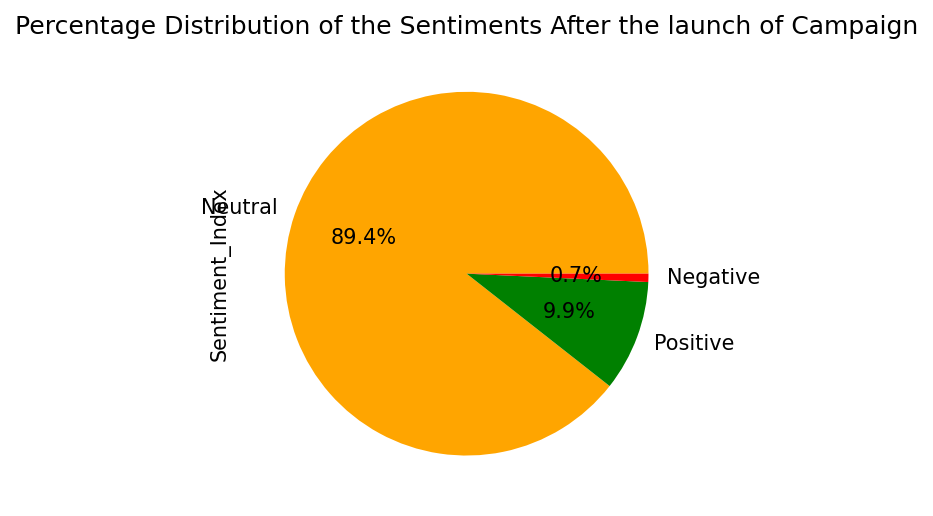

In [39]:
#Plotting the percentage distribution of sentioments after the launch of the campaign
plotGraph(pumaTask1DataFinalAfter['Sentiment_Index'], 'Percentage Distribution of the Sentiments After the launch of Campaign')

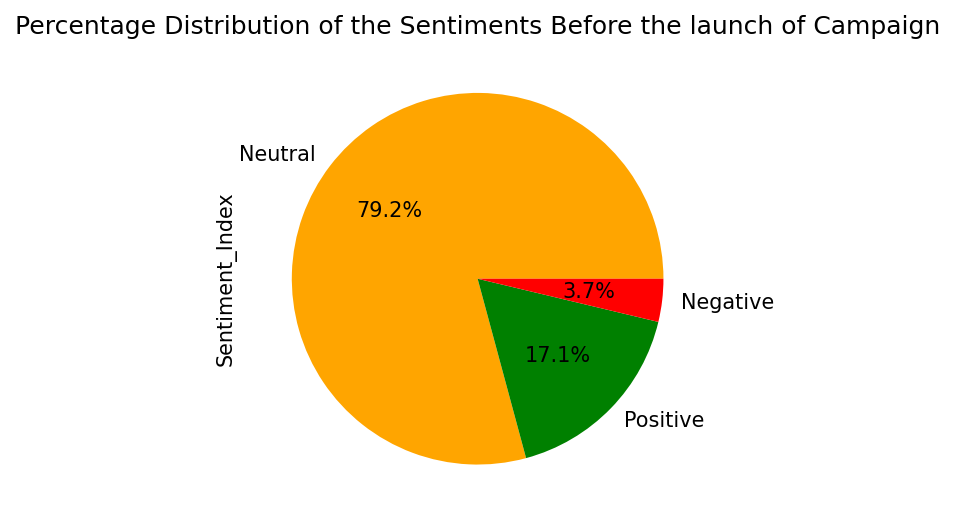

In [40]:
#Plotting the percentage distribution of sentioments before the launch of the campaign
plotGraph(pumaTask1DataFinalBefore['Sentiment_Index'], 'Percentage Distribution of the Sentiments Before the launch of Campaign')

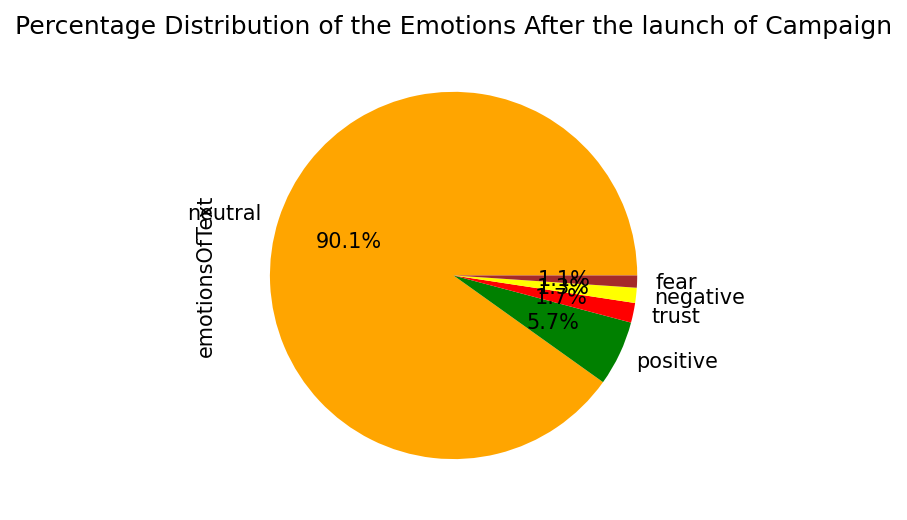

In [41]:
#Plotting the percentage distribution of emotions after the launch of the campaign
plotGraph(pumaTask1DataFinalAfter['emotionsOfText'], 'Percentage Distribution of the Emotions After the launch of Campaign')

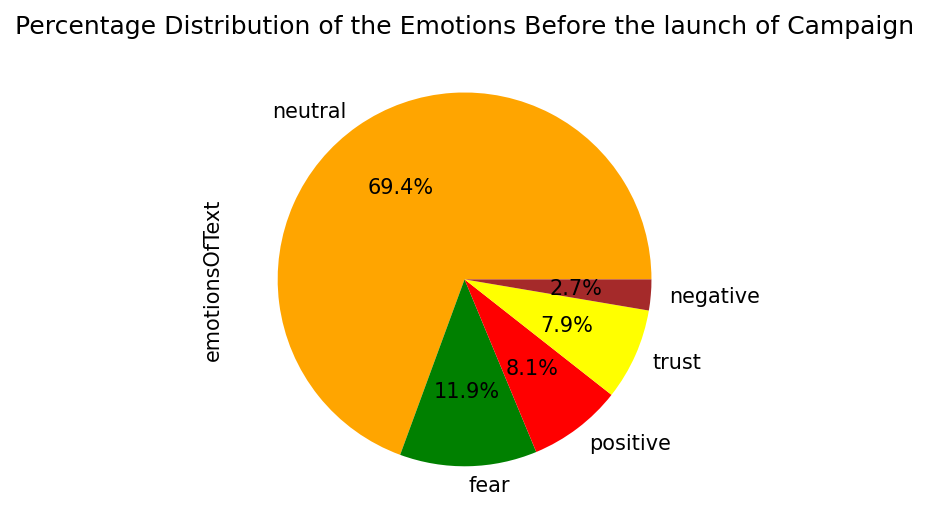

In [42]:
#Plotting the percentage distribution of emotions before the launch of the campaign
plotGraph(pumaTask1DataFinalBefore['emotionsOfText'], 'Percentage Distribution of the Emotions Before the launch of Campaign')

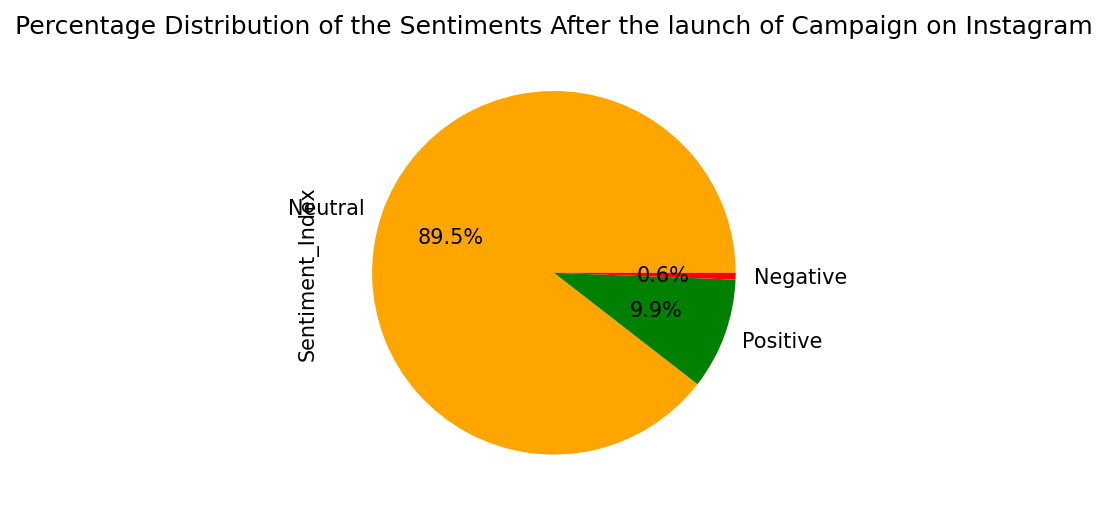

In [43]:
#Plotting the percentage distribution of sentioments after the launch of the campaign on Instagram
plotGraph(pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Instagram']['Sentiment_Index'], 'Percentage Distribution of the Sentiments After the launch of Campaign on Instagram')

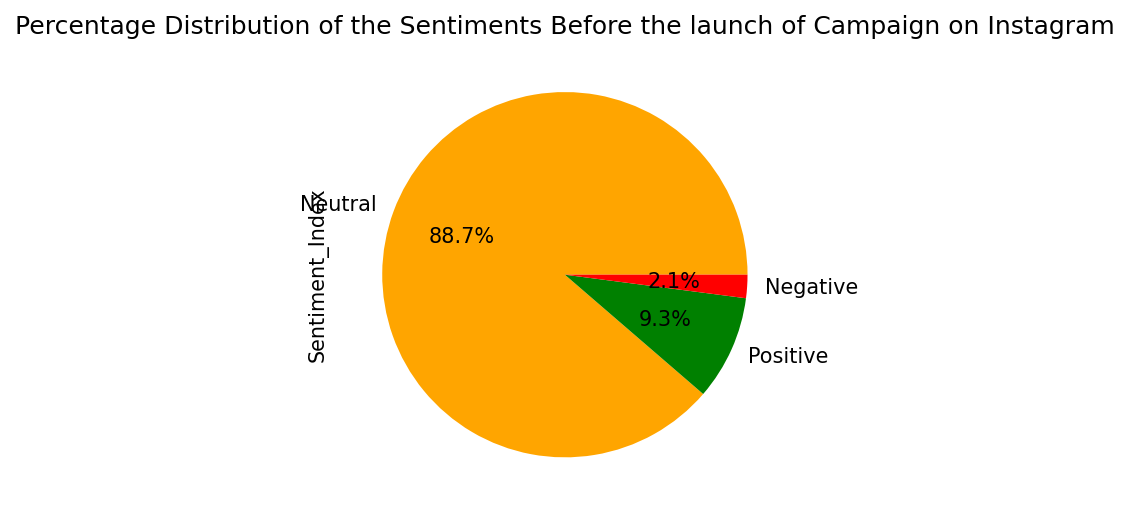

In [44]:
#Plotting the percentage distribution of sentioments before the launch of the campaign on Instagram
plotGraph(pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Instagram']['Sentiment_Index'], 'Percentage Distribution of the Sentiments Before the launch of Campaign on Instagram')

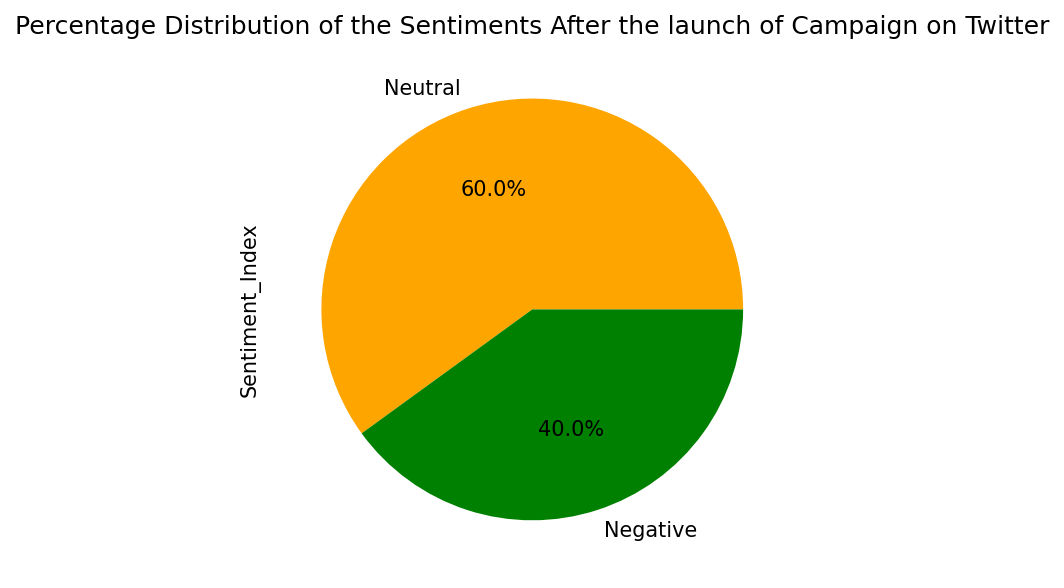

In [45]:
#Plotting the percentage distribution of sentioments after the launch of the campaign on Twitter
plotGraph(pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Twitter']['Sentiment_Index'], 'Percentage Distribution of the Sentiments After the launch of Campaign on Twitter')

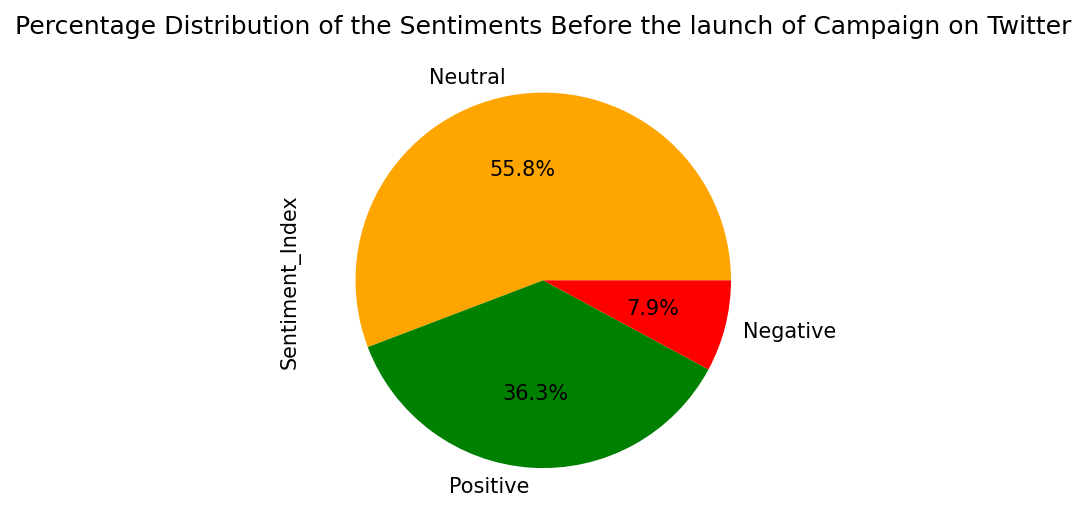

In [46]:
#Plotting the percentage distribution of sentioments before the launch of the campaign on Twitter
plotGraph(pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Twitter']['Sentiment_Index'], 'Percentage Distribution of the Sentiments Before the launch of Campaign on Twitter')

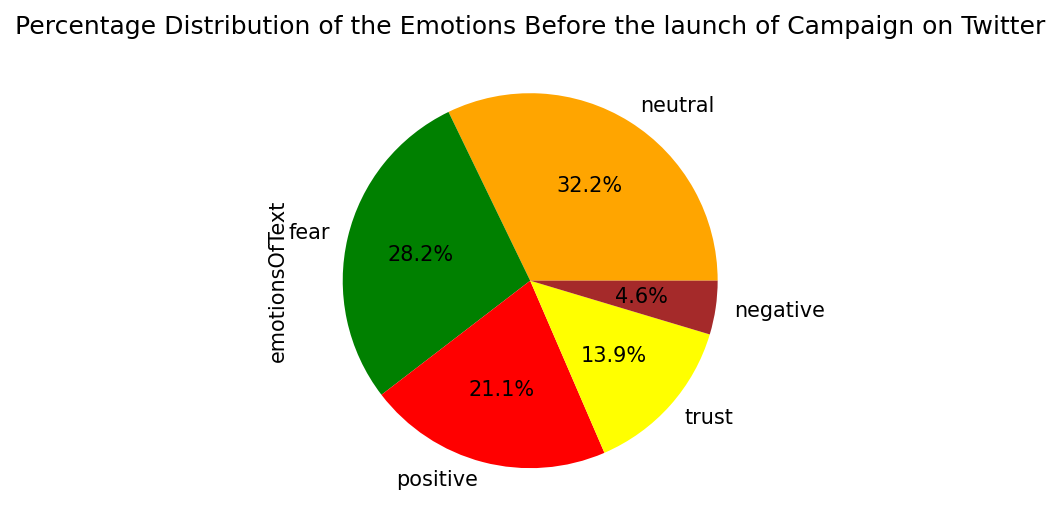

In [47]:
#Plotting the percentage distribution of emotions before the launch of the campaign on Twitter
plotGraph(pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Twitter']['emotionsOfText'], 'Percentage Distribution of the Emotions Before the launch of Campaign on Twitter')

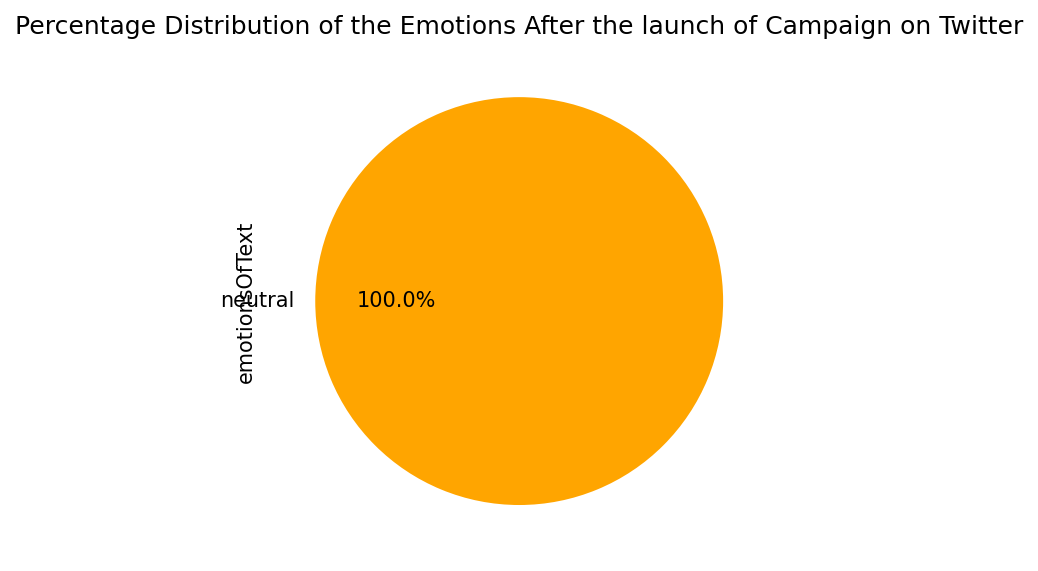

In [48]:
#Plotting the percentage distribution of emotions after the launch of the campaign on Twitter
plotGraph(pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Twitter']['emotionsOfText'], 'Percentage Distribution of the Emotions After the launch of Campaign on Twitter')

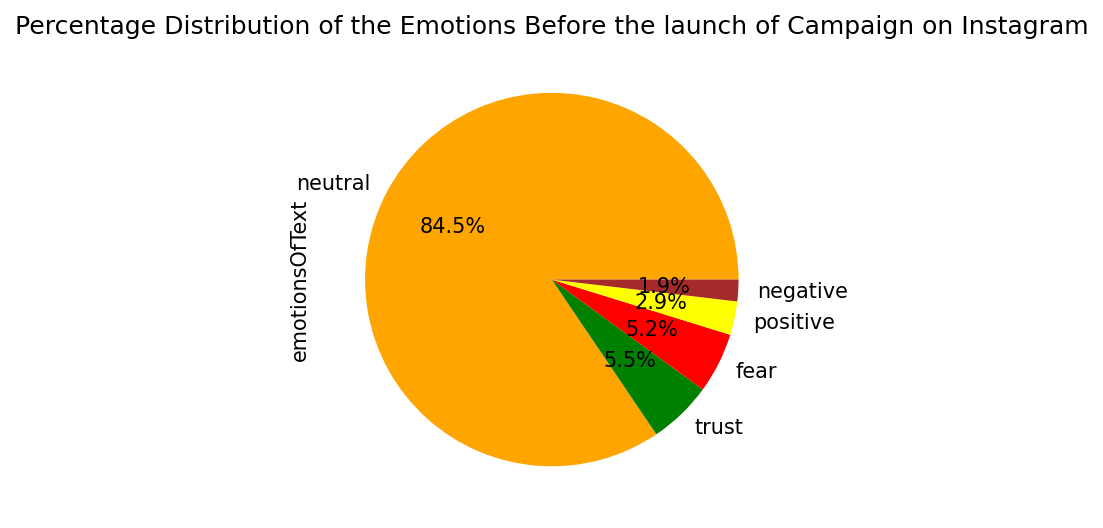

In [49]:
#Plotting the percentage distribution of emotions before the launch of the campaign on Instagram
plotGraph(pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Instagram']['emotionsOfText'], 'Percentage Distribution of the Emotions Before the launch of Campaign on Instagram')

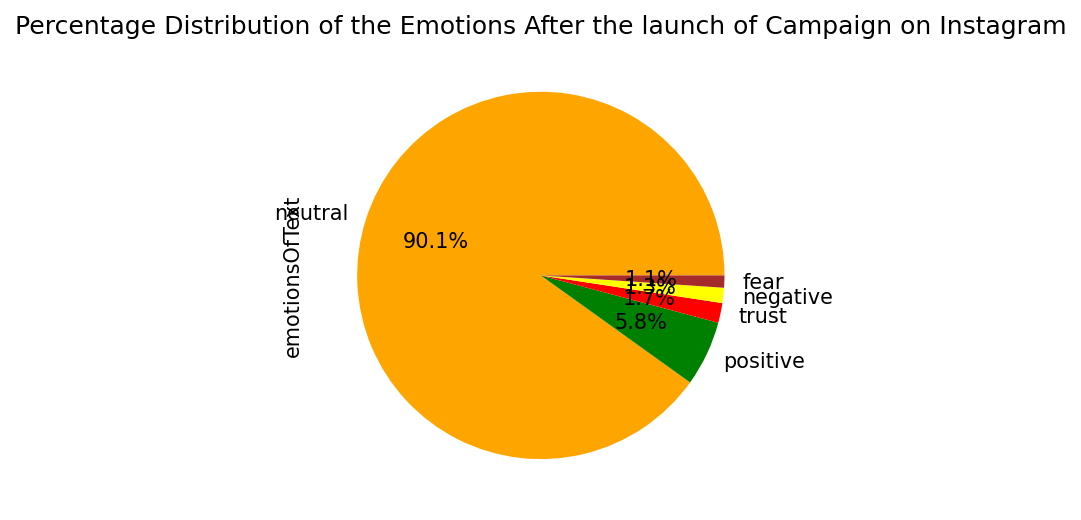

In [50]:
#Plotting the percentage distribution of emotions after the launch of the campaign on Instagram
plotGraph(pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Instagram']['emotionsOfText'], 'Percentage Distribution of the Emotions After the launch of Campaign on Instagram')

Text(0.5, 0.98, 'Top 20 Hashtags used before the launch of the campaign')

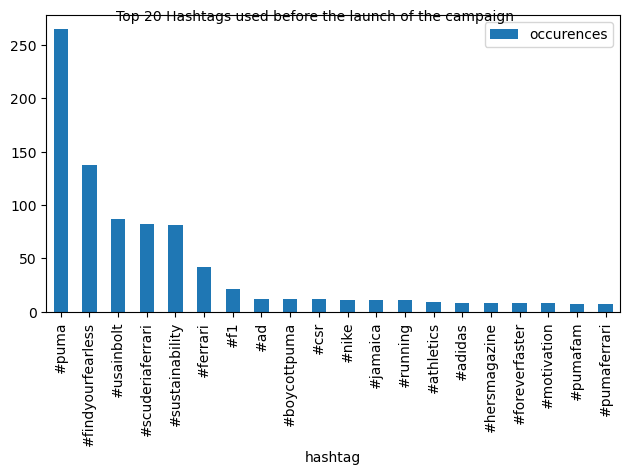

In [51]:
#Plotting the top 20 hashtags before the launch of the campaign

hashtagsBefore = pumaTask1DataFinalBefore['Text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() ))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
hashtagsBefore.columns = ['hashtag','occurences']

hashtagsBefore[:20].plot(kind='bar',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 20 Hashtags used before the launch of the campaign', fontsize=10)

Text(0.5, 0.98, 'Top 20 Hashtags used After the launch of the campaign')

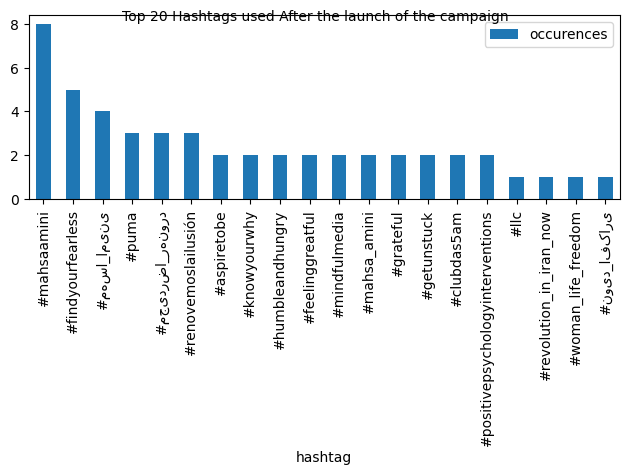

In [52]:
#Plotting the top 20 hashtags after the launch of the campaign

hashtagsAfter = pumaTask1DataFinalAfter['Text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() ))).sum(axis=0).to_frame().reset_index().sort_values(by=0,ascending=False)
hashtagsAfter.columns = ['hashtag','occurences']

hashtagsAfter[:20].plot(kind='bar',y='occurences',x='hashtag')
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 20 Hashtags used After the launch of the campaign', fontsize=10)

<Axes: >

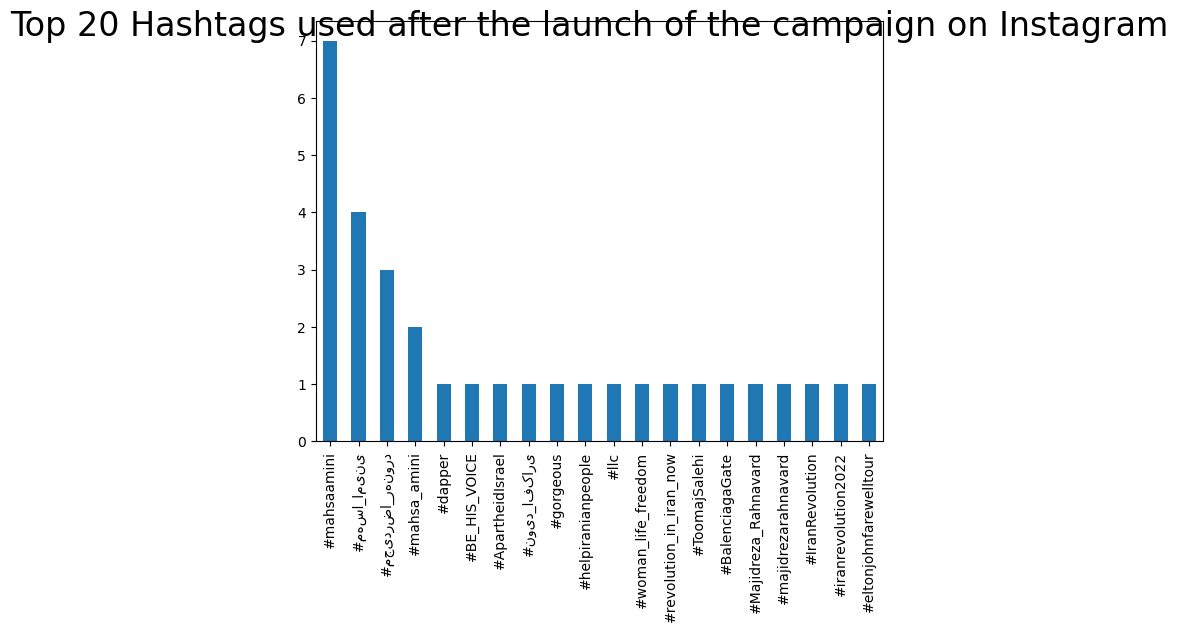

In [53]:
#Plotting the top 20 hashtags after the launch of the campaign on Instagram

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 Hashtags used after the launch of the campaign on Instagram', fontsize=24)
pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Instagram']['Text'].str.findall('(#\w+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

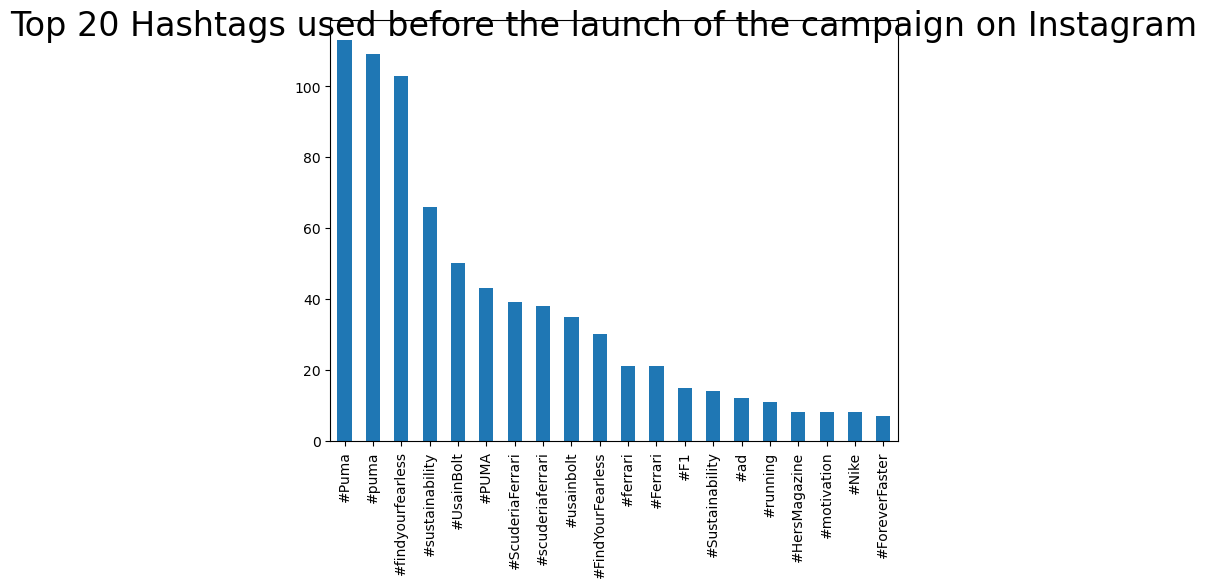

In [184]:
#Plotting the top 20 hashtags before the launch of the campaign on Instagram

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 Hashtags used before the launch of the campaign on Instagram', fontsize=24)
pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Twitter']['Text'].str.findall('(#\w+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

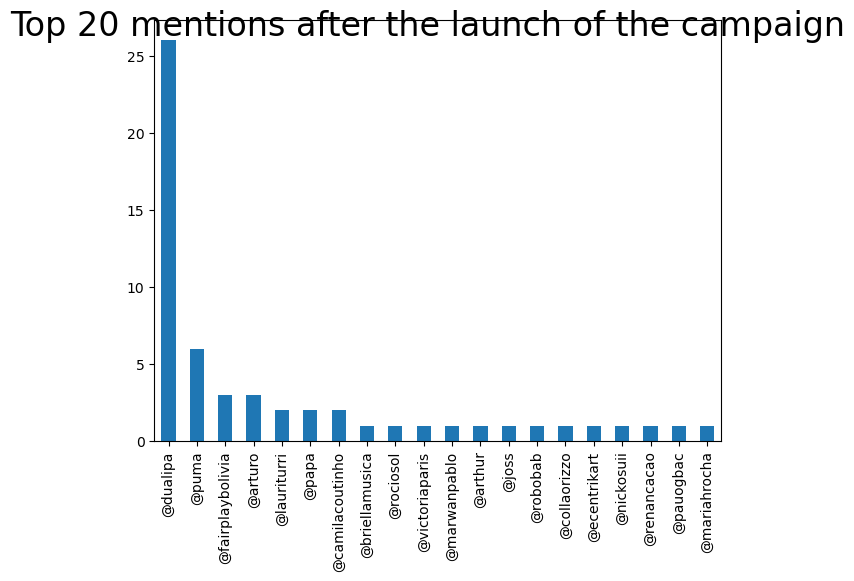

In [55]:
#Plotting the top 20 mentions after the launch of the campaign

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions after the launch of the campaign', fontsize=24)
pumaTask1DataFinalAfter['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

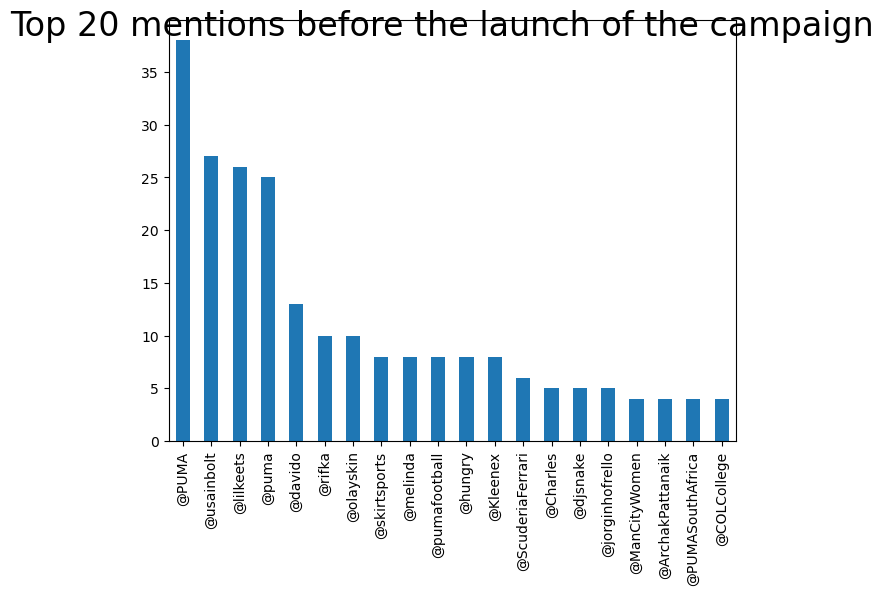

In [56]:
#Plotting the top 20 mentions before the launch of the campaign

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions before the launch of the campaign', fontsize=24)
pumaTask1DataFinalBefore['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

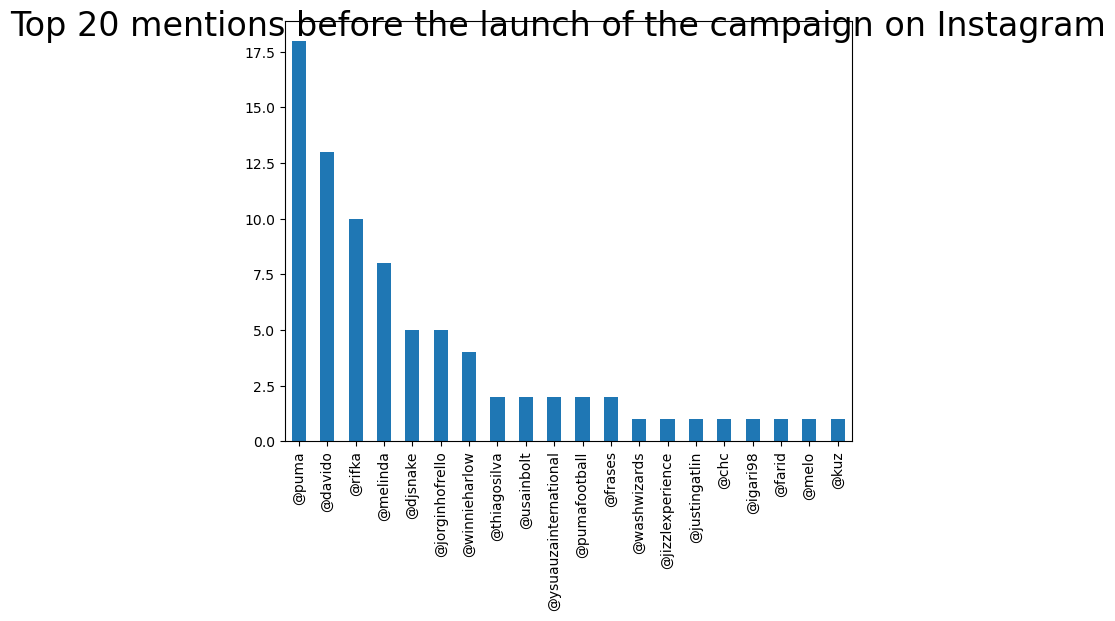

In [57]:
#Plotting the top 20 mentions before the launch of the campaign on Instagram

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions before the launch of the campaign on Instagram', fontsize=24)
pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Instagram']['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

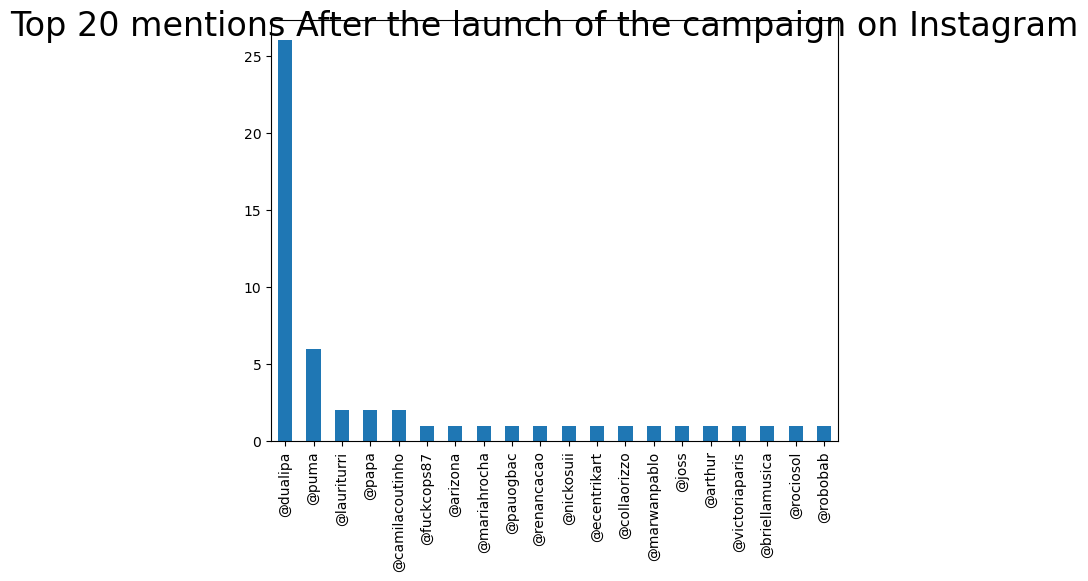

In [58]:
#Plotting the top 20 mentions after the launch of the campaign on Instagram

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions After the launch of the campaign on Instagram', fontsize=24)
pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Instagram']['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

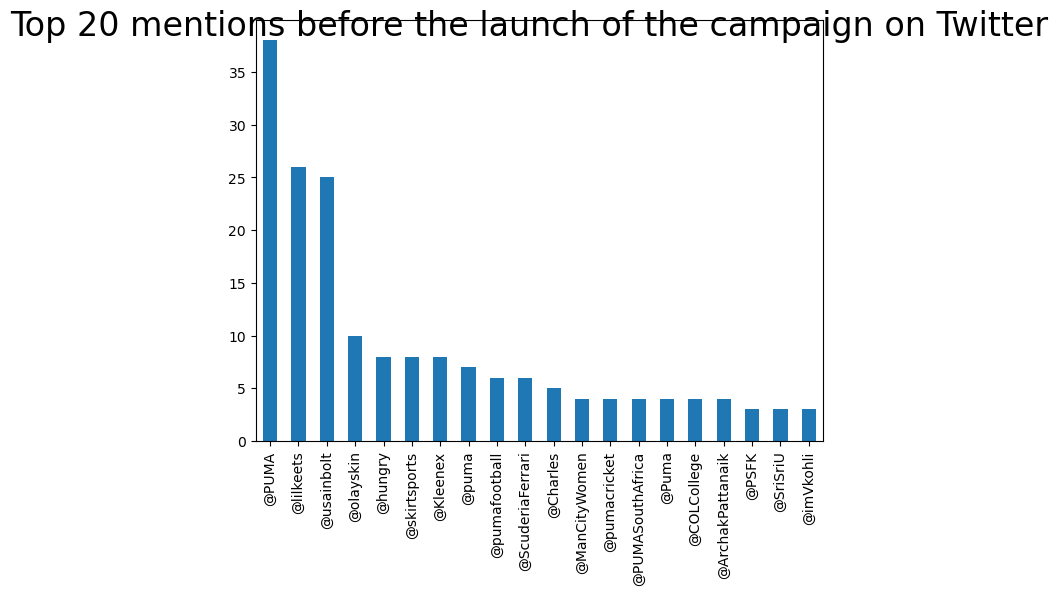

In [59]:
#Plotting the top 20 mentions before the launch of the campaign on Twitter

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions before the launch of the campaign on Twitter', fontsize=24)
pumaTask1DataFinalBefore[pumaTask1DataFinalBefore['Source'] == 'Twitter']['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

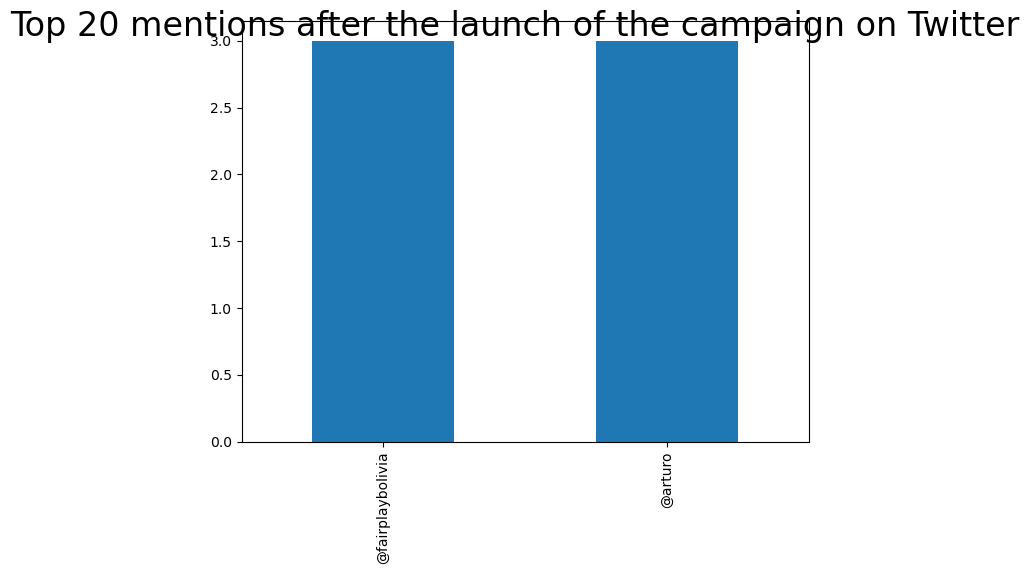

In [60]:
#Plotting the top 20 mentions after the launch of the campaign on Twitter

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions after the launch of the campaign on Twitter', fontsize=24)
pumaTask1DataFinalAfter[pumaTask1DataFinalAfter['Source'] == 'Twitter']['Text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

In [61]:
#Importing the libraries for Topic Modelling

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF

In [62]:
pumaTask1DataFinalBefore

Text  \
3336   #Puma shoe company tackles #sustainability wit...   
3345   RT @CeresNews: #Puma shoe company tackles #sus...   
3312   #Puma changes the shoebox game with a commitme...   
3359   RT @PrintersLounge: RT @packagingworld: #Puma ...   
3311   I think I need me some #Puma RT @GOOD Thinking...   
...                                                  ...   
42503                                       We love puma   
42502                                                  😍   
42501                                               ❤️❤️   
42500                                            Obo 🔥🔥🔥   
42499                                   ❤️❤️❤️ love puma   

                       postDate  likes  replies     Source  \
3336  2010-04-13 15:09:30+00:00    NaN      NaN    Twitter   
3345  2010-04-13 15:10:50+00:00    NaN      NaN    Twitter   
3312  2010-05-11 16:56:11+00:00    NaN      NaN    Twitter   
3359  2010-05-11 17:06:06+00:00    NaN      NaN    Twitter   
3311  2010-07-20 13:24:18+00:00    NaN      NaN    Twitter   
...                         ...    ...      ...        ...   
42503 2022-01-18 16:13:13+00:00    0.0      0.0  Instagram   
42502 2022-01-18 16:13:43+00:00    0.0      0.0  Instagram   
42501 2022-01-18 16:14:09+00:00    0.0      0.0  Instagram   
42500 2022-01-18 16:14:14+00:00    0.0      0.0  Instagram   
42499 2022-01-18 16:16:08+00:00    0.0      0.0  Instagram   

                                           cleaned_tweet Sentiment_Index  \
3336   puma shoe compani tackl sustain innov packag r...         Neutral   
3345   rt ceresnew puma shoe compani tackl sustain w ...         Neutral   
3312   puma chang shoebox game commit true sustain ht...        Negative   
3359   rt printersloung rt packagingworld puma chang ...        Negative   
3311   think need puma rt good think outsid shoebox p...        Positive   
...                                                  ...             ...   
42503                                          love puma        Positive   
42502                                                            Neutral   
42501                                                            Neutral   
42500                                                obo         Neutral   
42499                                          love puma        Positive   

      emotionsOfText  
3336         neutral  
3345         neutral  
3312           trust  
3359           trust  
3311        positive  
...              ...  
42503           fear  
42502        neutral  
42501        neutral  
42500        neutral  
42499           fear  

[1500 rows x 8 columns]

In [63]:
#Importing NMF and LDA for Identifying the trending topics

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

  
#Function to display top topics
def display_topics(model, feature_names, no_top_words):
    print(model)
    for topic_idx, topic in enumerate(model.components_):
        print ("Topic %d :" % (topic_idx+1))
        print (" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
        
#Function to display top topics
def plot_topic_keywords(model, feature_names, no_top_words=10):
    plt.figure(figsize=(10, 6))
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-no_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        plt.barh(range(no_top_words), topic[top_words_idx], align='center')
        plt.yticks(range(no_top_words), top_words)
        plt.xlabel('Word Importance')
        plt.title(f'Topic {topic_idx + 1}')
        plt.gca().invert_yaxis()
        plt.show()


#Function to perform vectorization and identifying the key words
def tfidVect(lst):
    
    no_features = 1000

    # NMF is able to use tf-idf
    tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
    tfidf = tfidf_vectorizer.fit_transform(lst)
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

    # LDA can only use raw term counts for LDA because it is a probabilistic graphical model
    tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
    tf = tf_vectorizer.fit_transform(lst)
    tf_feature_names = tf_vectorizer.get_feature_names_out()
    
    no_topics = 10

    # Run NMF
    nmf = NMF(n_components=no_topics, random_state=1,  l1_ratio=.5, init='nndsvd').fit(tfidf)

    # Run LDA
    lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

    
    no_top_words = 10

    plot_topic_keywords(lda, tf_feature_names, no_top_words)
    plot_topic_keywords(nmf, tf_feature_names, no_top_words)


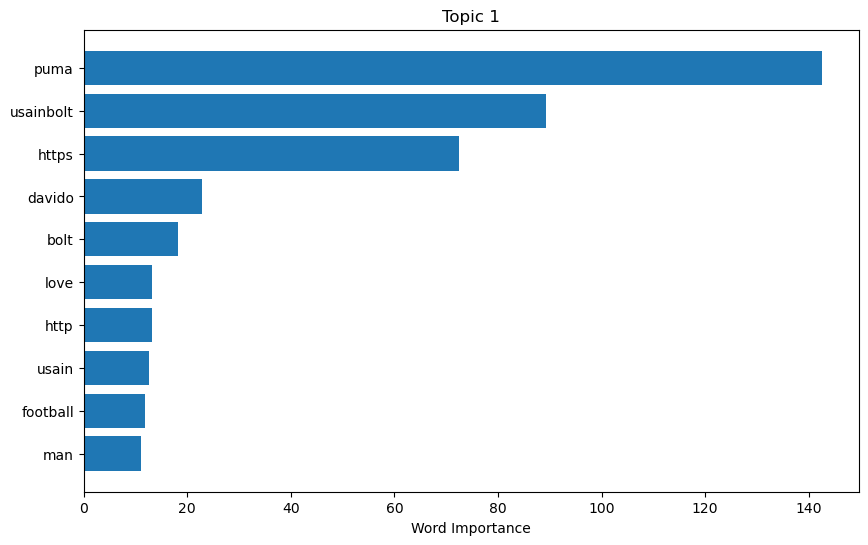

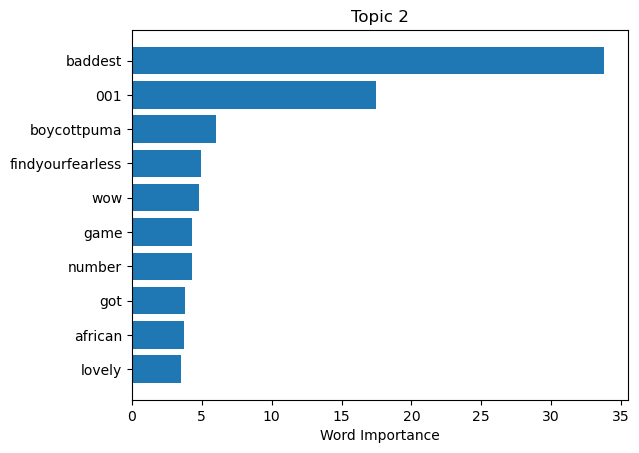

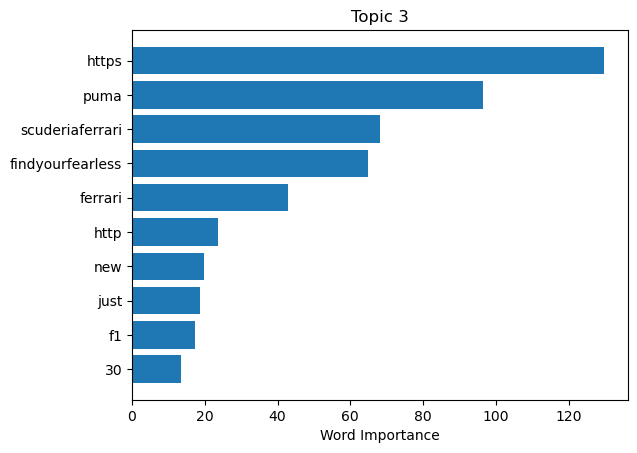

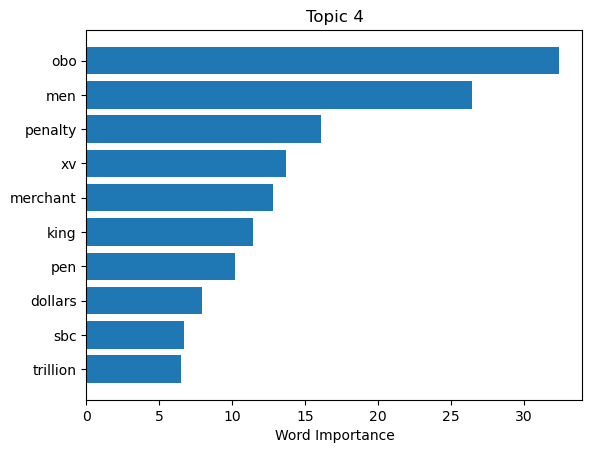

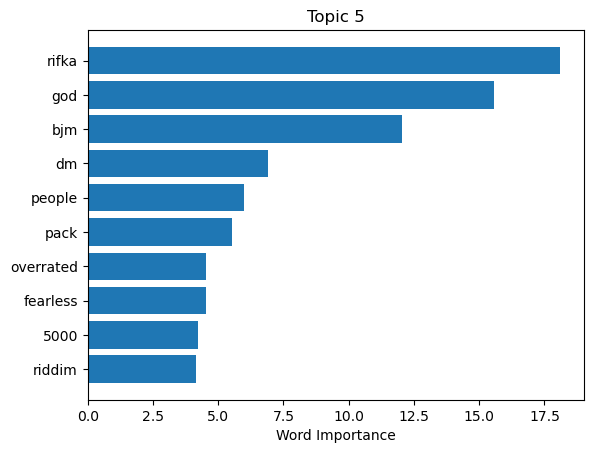

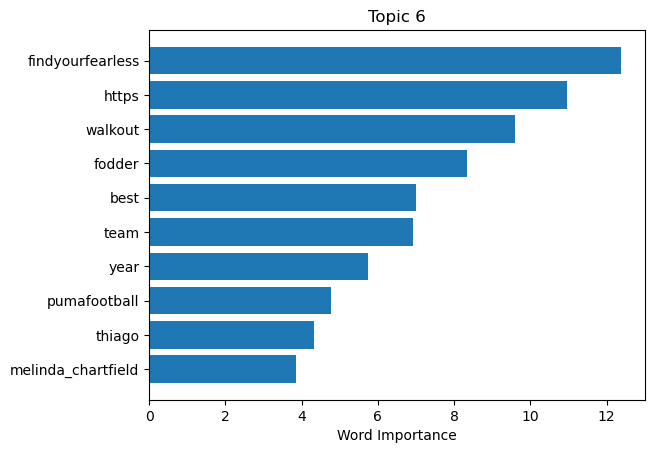

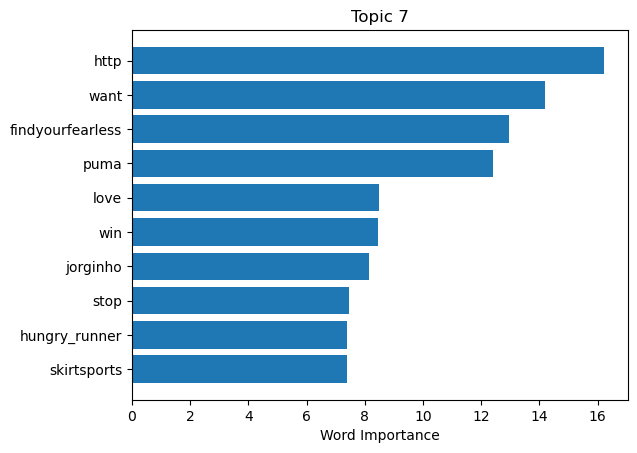

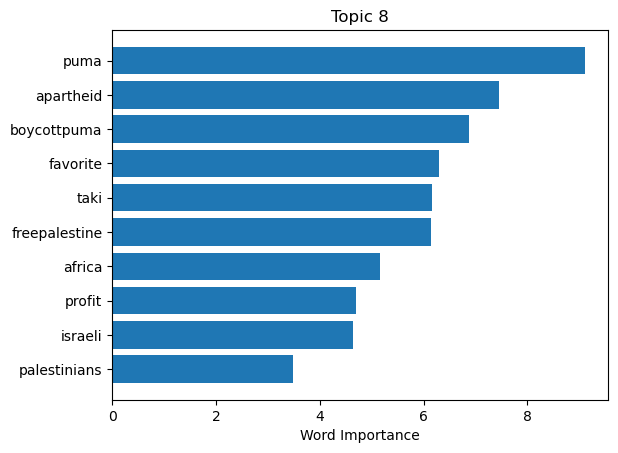

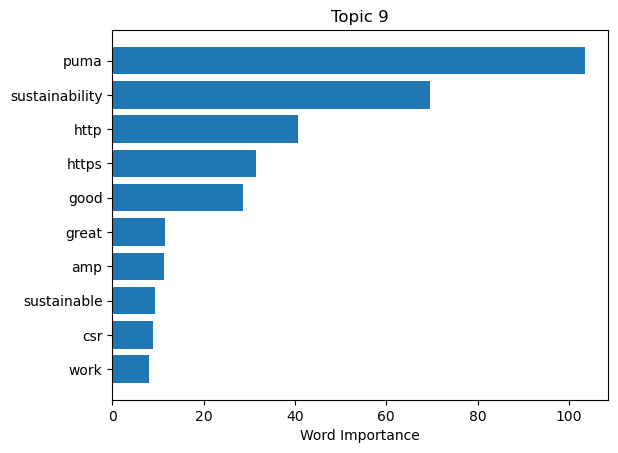

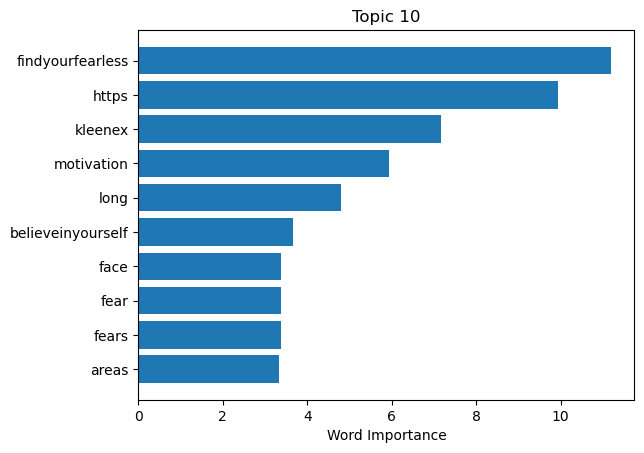

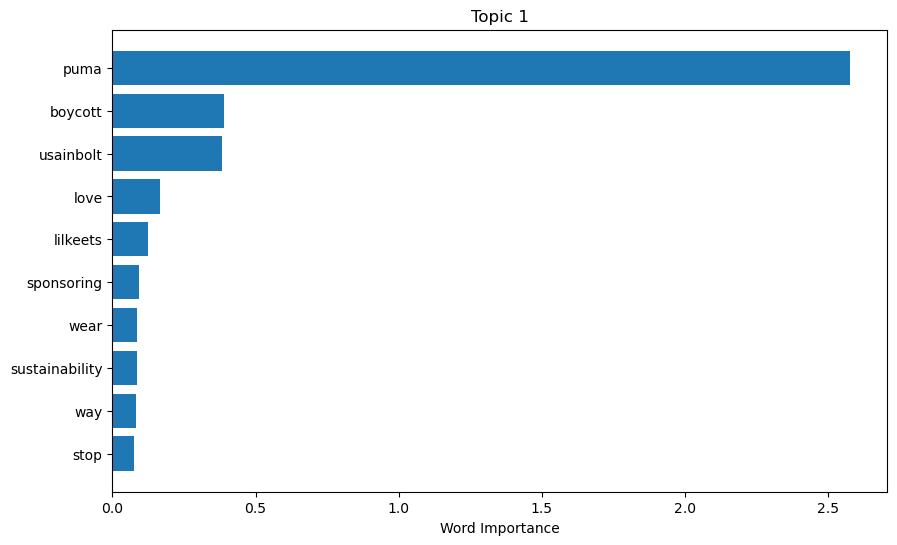

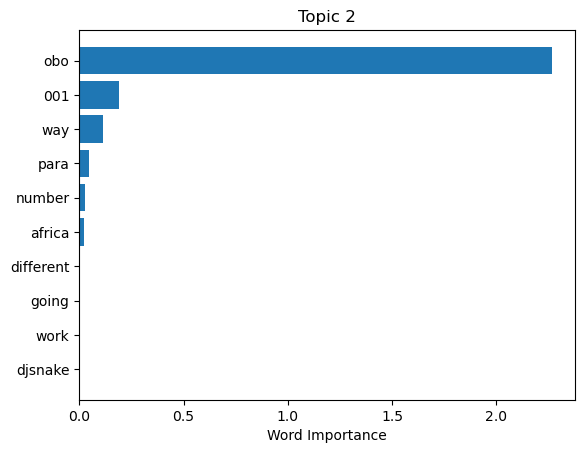

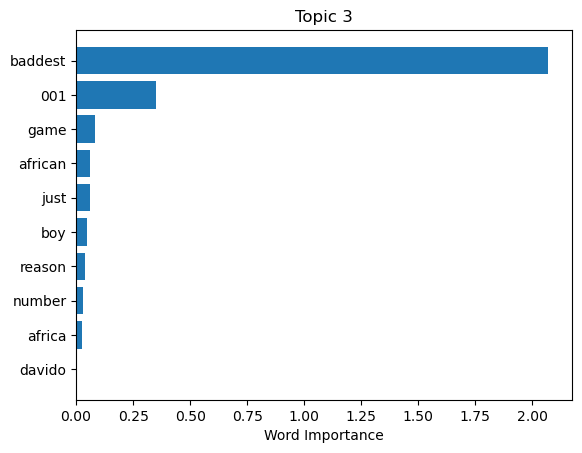

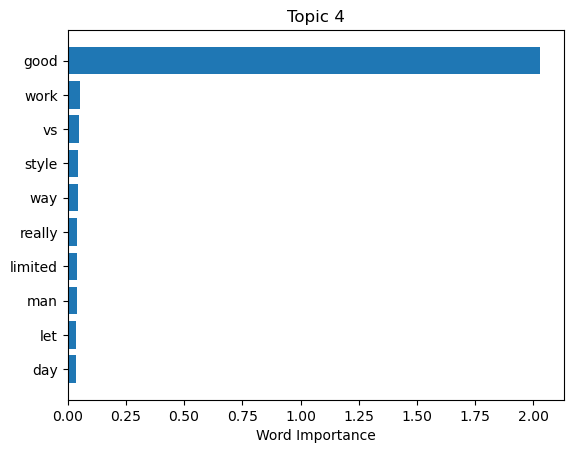

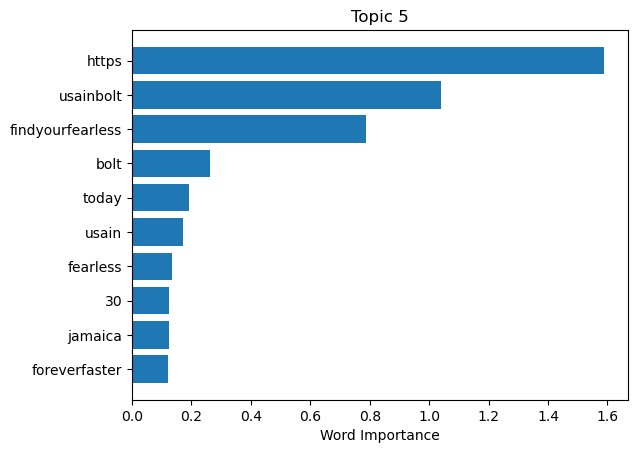

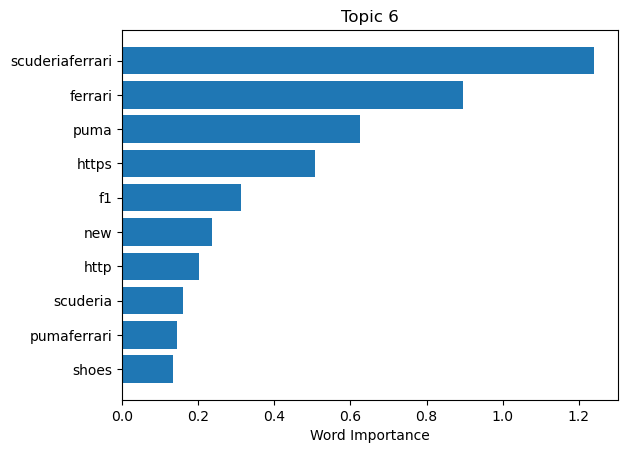

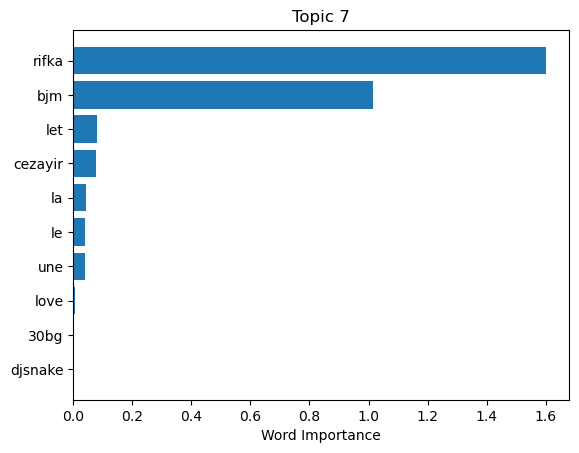

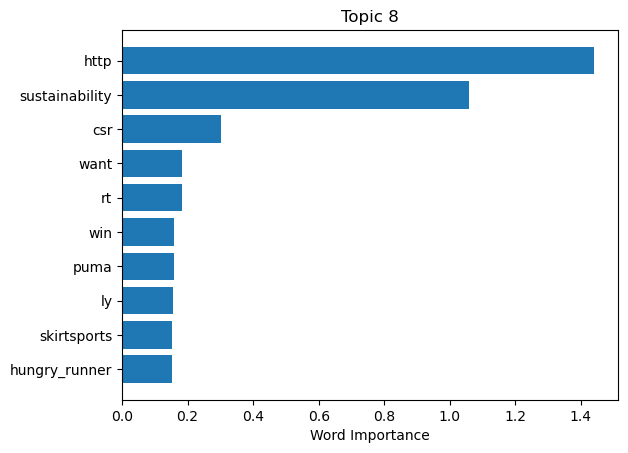

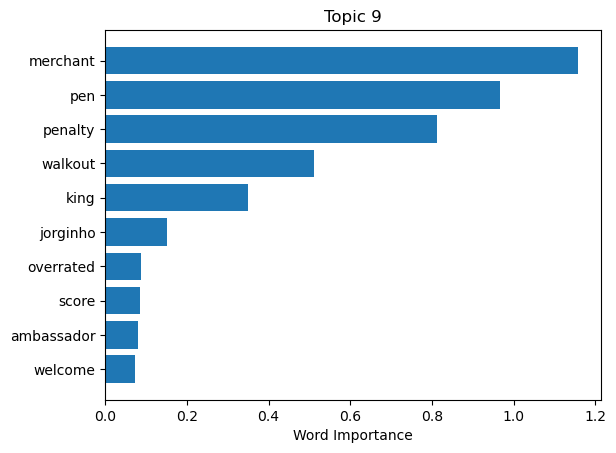

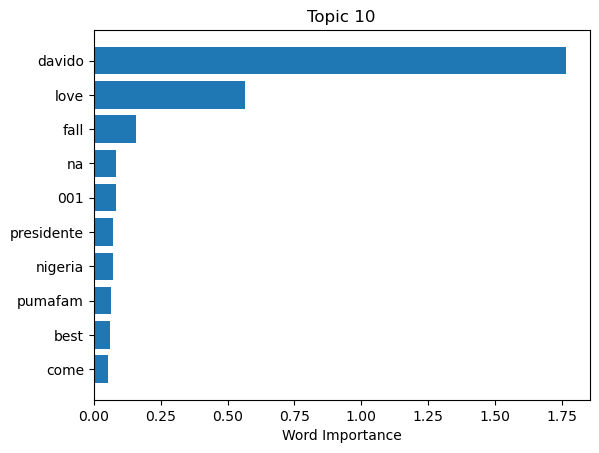

In [64]:
tfidVect(pumaTask1DataFinalBefore.Text)

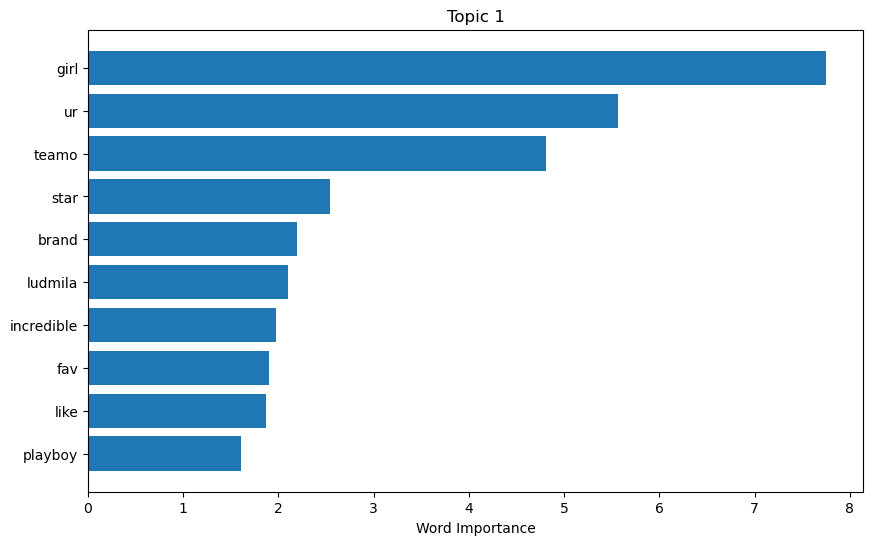

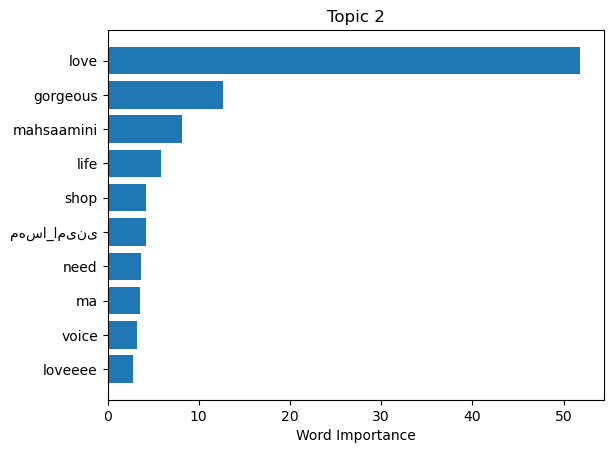

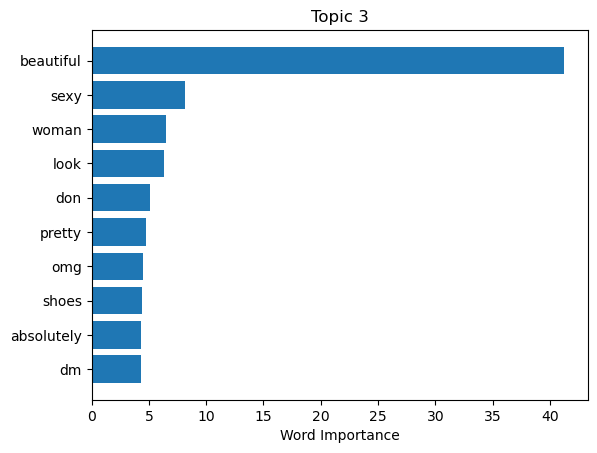

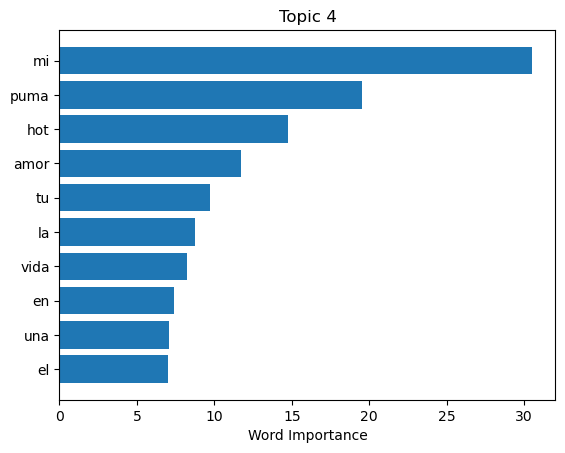

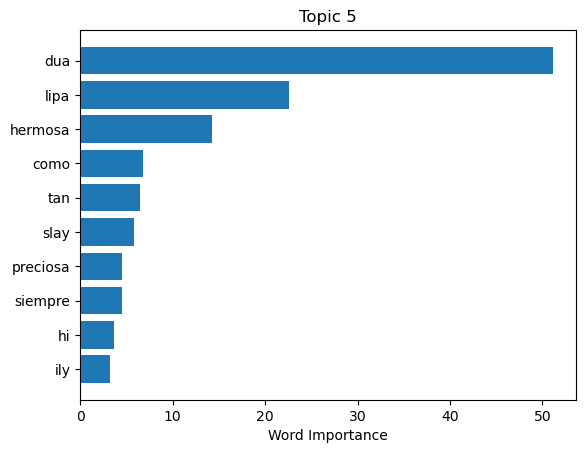

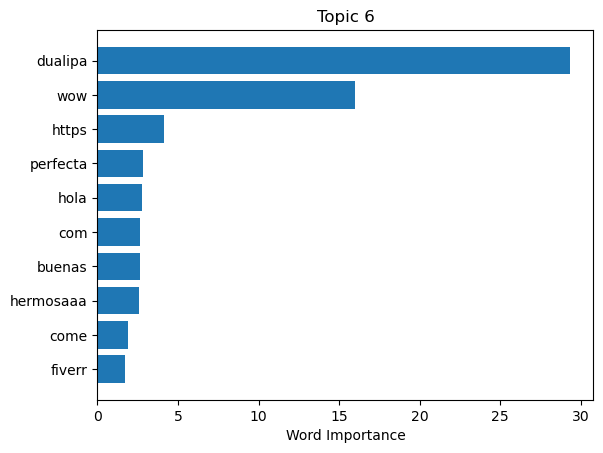

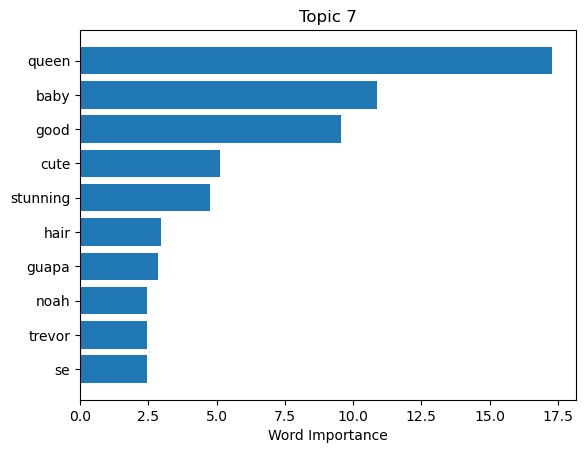

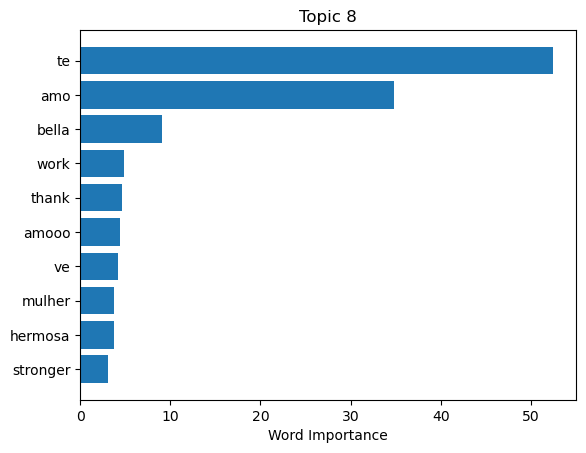

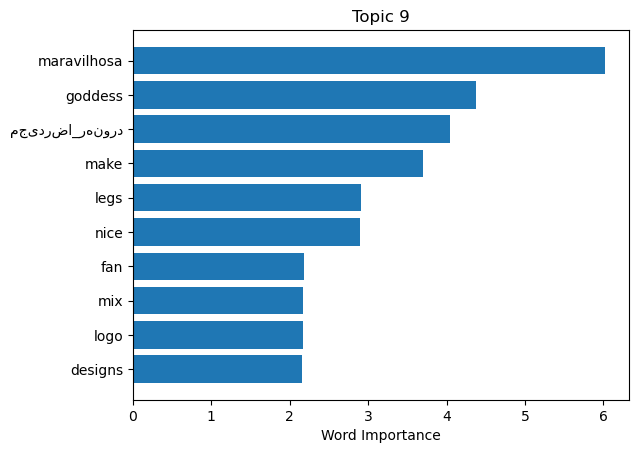

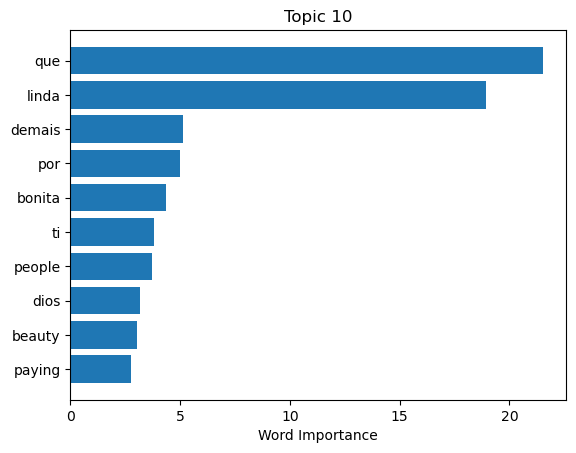

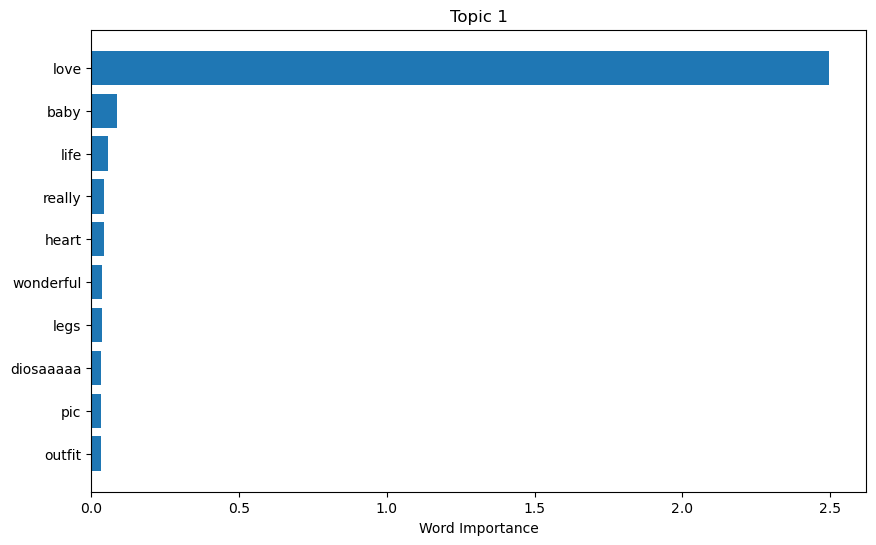

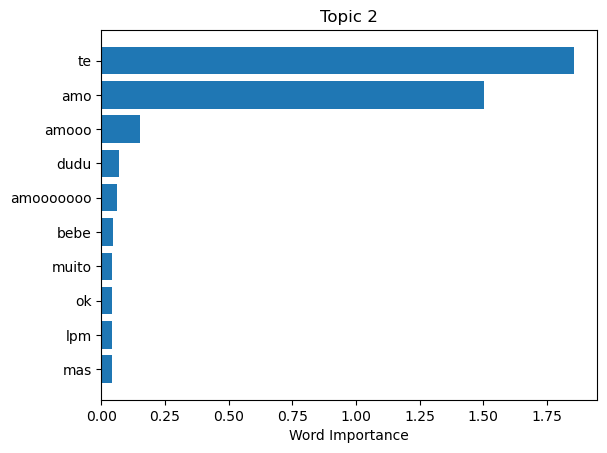

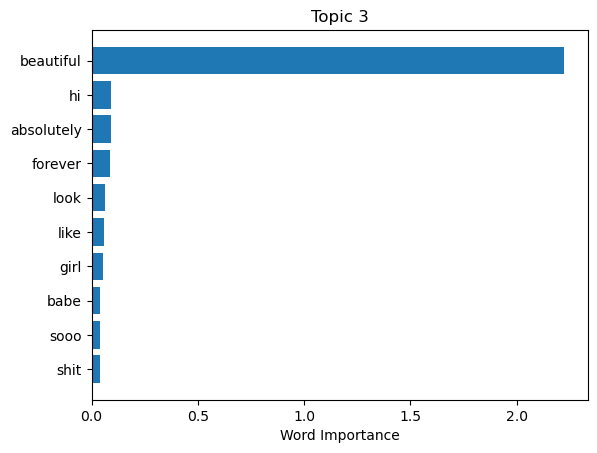

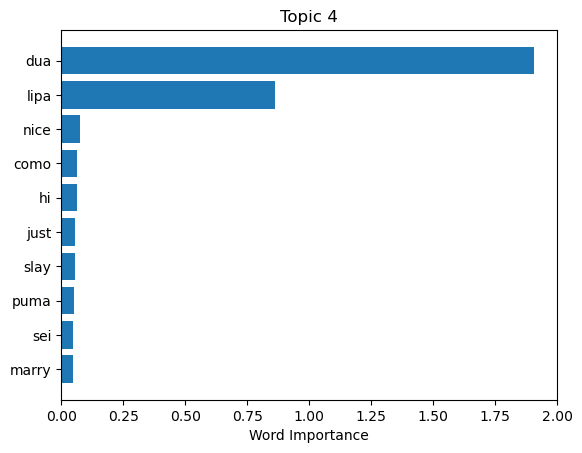

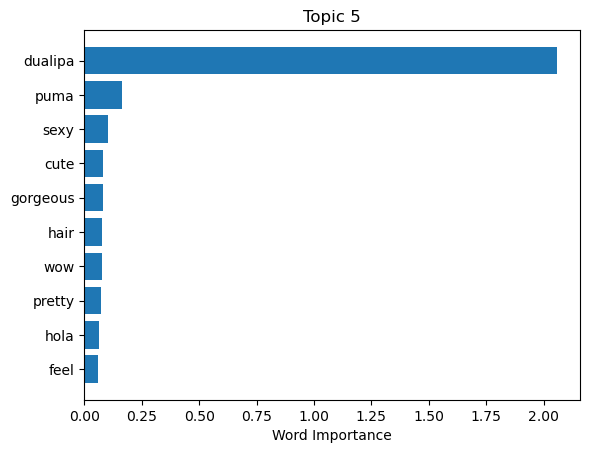

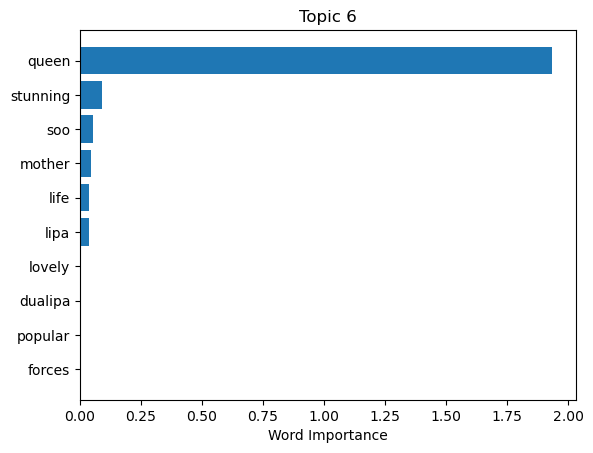

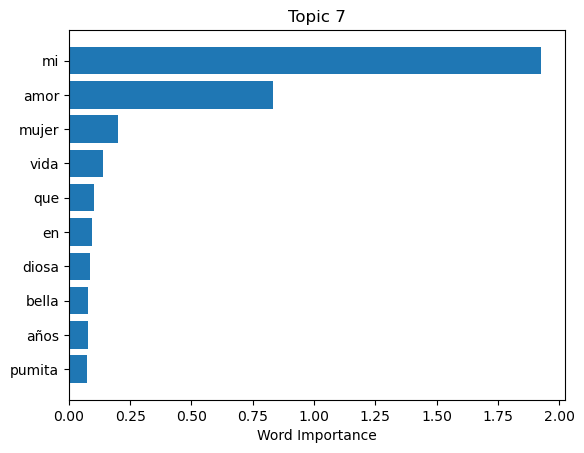

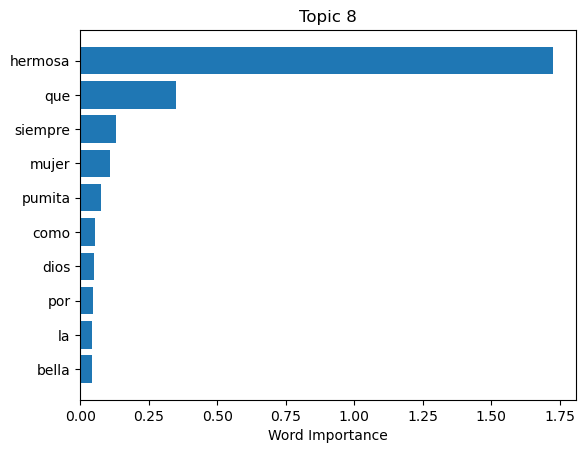

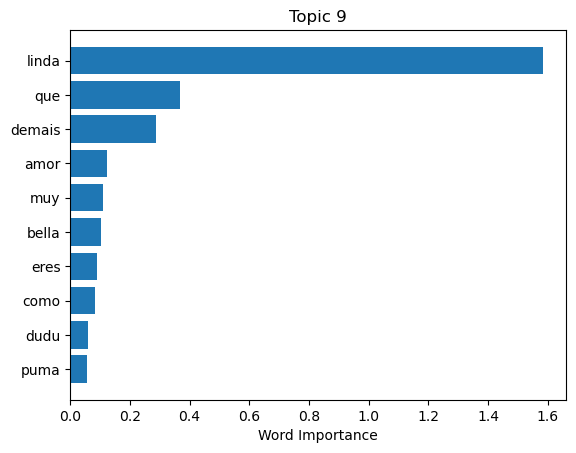

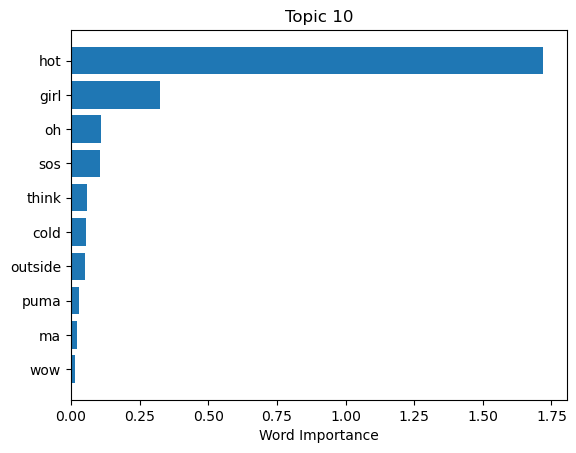

In [65]:
tfidVect(pumaTask1DataFinalAfter.Text)

In [66]:
#TASK 1 ENDS

In [67]:
#TASK 2 STARTS

In [68]:
#Importing the Instagram DataSet for task 2

pumaInstaTask2 = pumaInsta
pumaInstaTask2

profilePictureUrl            username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...             puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...     _imyourgreentea   
2      https://scontent.cdninstagram.com/v/t51.2885-1...      robbie.omahony   
3      https://scontent.cdninstagram.com/v/t51.2885-1...         nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...           huijeongs   
...                                                  ...                 ...   
60886  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60887  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60888  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60889  https://scontent-cdg4-3.cdninstagram.com/v/t51...          yoyo222884   
60890  https://scontent-cdg4-2.cdninstagram.com/v/t51...  clippersoffpodcast   

                                         profileUrl  \
0                 https://www.instagram.com/puma.uk   
1         https://www.instagram.com/_imyourgreentea   
2          https://www.instagram.com/robbie.omahony   
3             https://www.instagram.com/nicogchehab   
4               https://www.instagram.com/huijeongs   
...                                             ...   
60886       https://www.instagram.com/h.a.m.i.d____   
60887       https://www.instagram.com/h.a.m.i.d____   
60888       https://www.instagram.com/h.a.m.i.d____   
60889          https://www.instagram.com/yoyo222884   
60890  https://www.instagram.com/clippersoffpodcast   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
2                                                    NaN          5   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
...                                                  ...        ...   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻          1   
60887                                             👏🔥👏🔥👏🔥          1   
60888                                           👏🏻👏🏻👏🏻👏🏻          0   
60889                                My favorite brand 🤩          0   
60890                                                  🔥          0   

       replyCount               commentDate     commentId      ownerId  \
0               1  2023-05-19T09:39:44.000Z  1.810000e+16  52254607088   
1               0  2023-05-19T08:07:54.000Z  1.800000e+16  26554098971   
2               0  2023-05-19T10:15:09.000Z  1.800000e+16  11297028939   
3               0  2023-05-19T12:36:20.000Z  1.800000e+16   2867998756   
4               0  2023-05-19T08:05:33.000Z  1.800000e+16    842764645   
...           ...                       ...           ...          ...   
60886           0  2022-09-10T19:20:02.000Z  1.790000e+16   3432165999   
60887           0  2022-09-10T19:19:59.000Z  1.800000e+16   3432165999   
60888           0  2022-09-10T19:19:59.000Z  1.790000e+16   3432165999   
60889           0  2022-09-10T19:19:24.000Z  1.800000e+16  50210814297   
60890           0  2022-09-10T19:18:44.000Z  1.790000e+16  50105501252   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
2      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60886  2023-07-17T10:26:02.349Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60887  2023-07-17T10:26:02.349Z  https://www.instagram.com/

In [69]:
#Converting the comments from the dataset from String to Date

pumaInstaTask2['commentDate'] = pd.to_datetime(pumaInstaTask2['commentDate'])

In [70]:
#Selecting the recent data after the launch of the campaign on 20th Novermber 2022.

pumaInstaTask2 = pumaInstaTask2[pumaInstaTask2['commentDate'] > '2022-11-20']

In [71]:
#Removing all the duplicate comments from the dataset

pumaInstaTask2 = pumaInstaTask2.drop_duplicates('comment')
pumaInstaTask2

profilePictureUrl            username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...             puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...     _imyourgreentea   
2      https://scontent.cdninstagram.com/v/t51.2885-1...      robbie.omahony   
3      https://scontent.cdninstagram.com/v/t51.2885-1...         nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...           huijeongs   
...                                                  ...                 ...   
60085  https://scontent.cdninstagram.com/v/t51.2885-1...  abdullah_abualsill   
60242  https://scontent-lhr8-1.cdninstagram.com/v/t51...          moriposa_l   
60403  https://scontent-cdg4-1.cdninstagram.com/v/t51...         j.fathiu001   
60404  https://scontent.cdninstagram.com/v/t51.2885-1...       beautyjenny23   
60671  https://scontent.cdninstagram.com/v/t51.2885-1...          1234ramone   

                                         profileUrl  \
0                 https://www.instagram.com/puma.uk   
1         https://www.instagram.com/_imyourgreentea   
2          https://www.instagram.com/robbie.omahony   
3             https://www.instagram.com/nicogchehab   
4               https://www.instagram.com/huijeongs   
...                                             ...   
60085  https://www.instagram.com/abdullah_abualsill   
60242          https://www.instagram.com/moriposa_l   
60403         https://www.instagram.com/j.fathiu001   
60404       https://www.instagram.com/beautyjenny23   
60671          https://www.instagram.com/1234ramone   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
2                                                    NaN          5   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
...                                                  ...        ...   
60085                          🤢🤢🤮🤮 متى سينتهي هذا القرف          0   
60242  hey @puma how about using real athletes for yo...          0   
60403                                            Davido🖤          0   
60404                            🔥🔥🔥🔥🔥🔥🔥❤️❤️❤️❤️❤️❤️❤️❤️          0   
60671                                               💜®️.          0   

       replyCount               commentDate     commentId      ownerId  \
0               1 2023-05-19 09:39:44+00:00  1.810000e+16  52254607088   
1               0 2023-05-19 08:07:54+00:00  1.800000e+16  26554098971   
2               0 2023-05-19 10:15:09+00:00  1.800000e+16  11297028939   
3               0 2023-05-19 12:36:20+00:00  1.800000e+16   2867998756   
4               0 2023-05-19 08:05:33+00:00  1.800000e+16    842764645   
...           ...                       ...           ...          ...   
60085           0 2022-12-21 00:03:57+00:00  1.800000e+16  18866104138   
60242           0 2023-03-25 20:18:51+00:00  1.800000e+16  45559072852   
60403           0 2023-01-03 10:44:07+00:00  1.790000e+16  55207540924   
60404           0 2022-12-06 00:45:47+00:00  1.800000e+16   3111984436   
60671           0 2023-01-26 17:13:07+00:00  1.830000e+16  52625300392   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
2      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60085  2023-07-17T10:22:48.172Z  https://www.instagram.com/p/CiitZAuBX3m/   
60242  2023-07-17T10:23:19.101Z  https://www.instagram.com/

In [72]:
#Sorting the data to get the most recent datapoints 
#Selecting top 1700 comments from the Instagram

pumaInstaTask2 = pumaInstaTask2.sort_values(by=['commentDate'],ascending=False)
pumaInstaTask2 = pumaInstaTask2.head(1700)

In [73]:
#Renaming the columns from the dataset to maintain uniformity

pumaInstaTask2 = pumaInstaTask2.rename(columns = {'comment' : 'text', 'likeCount' : 'likes', 'replyCount': 'replies'})

In [74]:
#Selecting the required columns from the datasets for the further analysis
#Selecting text, number of likes, number of replies, and the source

pumaInstaTask2 = pumaInstaTask2[['text', 'likes', 'replies', 'Source']]

In [75]:
pumaInstaTask2

text  likes  replies  \
29162    Nice beautiful healthy aspects ❤️I love them ❤️      0        0   
54173                                      Cuánto cuesta      0        1   
42394  My bookie butt butt 👸🏽👸🏽💍🤤🤤🤤🤴🏽🥰🥰🥰🥰🥰🍯🍯♾♾💗💗👳🏽‍♂️...      0        0   
9609                                     @morales_dmflor      0        0   
5985                                 Where you but this?      0        2   
...                                                  ...    ...      ...   
2762                                                ✅❤️✅      0        0   
2761                                    🔥🔥🔥🔥🔥Is a banger      0        0   
2760   Davido my big boss how I wish he could sign me...      0        0   
1649   pls i need this cloth in canada can’t find it ...      0        1   
4684               Hermosa mi amor ❤️❤️❤️❤️🙌🙌🙌🔥🔥🔥🔥👏👏👏😍😍😍      0        0   

          Source  
29162  Instagram  
54173  Instagram  
42394  Instagram  
9609   Instagram  
5985   Instagram  
...          ...  
2762   Instagram  
2761   Instagram  
2760   Instagram  
1649   Instagram  
4684   Instagram  

[1700 rows x 4 columns]

In [76]:
#Importing the Puma DataSet for task 2

pumaTwitterTask2 = pumaTwitter
pumaTwitterTask2

tweetDate  \
0     Sun Jul 16 10:44:33 +0000 2023   
1     Sun Jul 09 23:01:41 +0000 2023   
2     Fri Jul 14 13:41:00 +0000 2023   
3     Sun Jul 16 23:23:33 +0000 2023   
4     Sat Jul 15 18:58:00 +0000 2023   
...                              ...   
4254  Thu Jul 20 10:35:21 +0000 2023   
4255  Tue Jul 18 04:32:05 +0000 2023   
4256  Fri Jul 14 05:20:08 +0000 2023   
4257  Sat Jul 15 10:05:57 +0000 2023   
4258  Mon Jul 17 11:06:01 +0000 2023   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[4259 rows x 10 columns]

In [77]:
#Converting the datatype of tweetdate from String to Date

pumaTwitterTask2['tweetDate'] = pd.to_datetime(pumaTwitterTask2['tweetDate'])

In [78]:
#Selecting the most recent tweets after the launch of the campaign on 20th November 2022

pumaTwitterTask2 = pumaTwitterTask2[pumaTwitterTask2['tweetDate'] > '2022-11-20']
pumaTwitterTask2

tweetDate  \
0    2023-07-16 10:44:33+00:00   
1    2023-07-09 23:01:41+00:00   
2    2023-07-14 13:41:00+00:00   
3    2023-07-16 23:23:33+00:00   
4    2023-07-15 18:58:00+00:00   
...                        ...   
4254 2023-07-20 10:35:21+00:00   
4255 2023-07-18 04:32:05+00:00   
4256 2023-07-14 05:20:08+00:00   
4257 2023-07-15 10:05:57+00:00   
4258 2023-07-17 11:06:01+00:00   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[3763 rows x 10 columns]

In [79]:
#Dropping the duplicate tweets from the dataset

pumaTwitterTask2 = pumaTwitterTask2.drop_duplicates('tweetUrl')

In [80]:
#Sorting the dataset to get the most recent tweets
#Selecting the most recent 1700 tweets from the available dataset

pumaTwitterTask2 = pumaTwitterTask2.sort_values(by=['tweetDate'],ascending=False)
pumaTwitterTask2 = pumaTwitterTask2.head(1700)
pumaTwitterTask2

tweetDate  \
3899 2023-07-21 05:08:04+00:00   
3720 2023-07-21 03:52:18+00:00   
3815 2023-07-21 03:00:03+00:00   
3623 2023-07-21 02:39:08+00:00   
3529 2023-07-21 02:28:53+00:00   
...                        ...   
2996 2023-06-08 05:11:48+00:00   
3036 2023-06-07 21:33:04+00:00   
3062 2023-06-07 17:22:02+00:00   
3051 2023-06-07 15:30:53+00:00   
3507 2023-06-05 16:03:09+00:00   

                                                content  \
3899  la de los golden music cuándo presentaron puma...   
3720  Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...   
3815  ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   
3623  PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...   
3529  @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...   
...                                                 ...   
2996  MB.02 BE YOU\n\nこれまで発売したモデルから要素を取り入れた鮮やかなマルチカラ...   
3036  #Puma Plots #NFTSneakerDrop With #NBA LaMelo B...   
3062  NBA sensation LaMelo Ball, global sportswear b...   
3051  🚨 LaMelo Ball's Puma MB.03: The Fusion of Bask...   
3507  @GURU66777 @ManCity @imVkohli @AnushkaSharma P...   

                           twitterProfile  \
3899       https://twitter.com/kaickityyy   
3720       https://twitter.com/PumaCDMX13   
3815    https://twitter.com/ZOZOSHOES2020   
3623      https://twitter.com/kamitora125   
3529   https://twitter.com/FOREVER_VK_FAN   
...                                   ...   
2996         https://twitter.com/PUMA_JPN   
3036   https://twitter.com/HappyScribbler   
3062       https://twitter.com/nftd0tnews   
3051  https://twitter.com/CoinFinance_biz   
3507    https://twitter.com/AadmiKhilonaH   

                                               tweetUrl  \
3899  https://twitter.com/kaickityyy/status/16822561...   
3720  https://twitter.com/PumaCDMX13/status/16822370...   
3815  https://twitter.com/ZOZOSHOES2020/status/16822...   
3623  https://twitter.com/kamitora125/status/1682218...   
3529  https://twitter.com/FOREVER_VK_FAN/status/1682...   
...                                                 ...   
2996  https://twitter.com/PUMA_JPN/status/1666674366...   
3036  https://twitter.com/HappyScribbler/status/1666...   
3062  https://twitter.com/nftd0tnews/status/16664957...   
3051  https://twitter.com/CoinFinance_biz/status/166...   
3507  https://twitter.com/AadmiKhilonaH/status/16657...   

                     timestamp               query   Post  Retweet  Likes  \
3899  2023-07-21T05:26:59.444Z           puma 2021   Text      0.0    1.0   
3720  2023-07-21T05:18:27.750Z           puma 2019  Video      0.0    0.0   
3815  2023-07-21T05:24:24.761Z           puma 2020  Image      4.0   58.0   
3623  2023-07-21T05:13:29.159Z  ForeverFaster puma    NaN      NaN    NaN   
3529  2023-07-21T05:09:36.988Z  AnushkaSharma puma    NaN      NaN    NaN   
...                        ...                 ...    ...      ...    ...   
2996  2023-07-20T17:19:42.677Z          #nba #puma  Image      4.0   28.0   
3036  2023-07-20T17:19:47.132Z          #nba #puma   Text      1.0    1.0   
3062  2023-07-20T17:19:49.394Z          #nba #puma    NaN      NaN    NaN   
3051  2023-07-20T17:19:49.394Z          #nba #puma   Text      1.0    2.0   
3507  2023-07-21T05:09:34.044Z  AnushkaSharma puma   Text      0.0    2.0   

       Source  
3899  Twitter  
3720  Twitter  
3815  Twitter  
3623  Twitter  
3529  Twitter  
...       ...  
2996  Twitter  
3036  Twitter  
3062  Twitter  
3051  Twitter  
3507  Twitter  

[1700 rows x 10 columns]

In [81]:
#Checking the dataset for the null values

np.sum(pumaTwitterTask2.isna())

tweetDate           0
content             0
twitterProfile      0
tweetUrl            0
timestamp           0
query               1
Post              352
Retweet           352
Likes             352
Source              0
dtype: int64

In [82]:
#Renaming the column names to maintain uniformity

pumaTwitterTask2 = pumaTwitterTask2.rename(columns = {'content' : 'text', 'Retweet' : 'replies', 'Likes' : 'likes'})

In [83]:
#Selecting the columns required for the analysis from the dataset
#Selecting text, number of likes, number of replies and the source

pumaTwitterTask2 = pumaTwitterTask2[['text', 'likes' , 'replies', 'Source']]
pumaTwitterTask2

text  likes  replies  \
3899  la de los golden music cuándo presentaron puma...    1.0      0.0   
3720  Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
3815  ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3623  PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    NaN      NaN   
3529  @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    NaN      NaN   
...                                                 ...    ...      ...   
2996  MB.02 BE YOU\n\nこれまで発売したモデルから要素を取り入れた鮮やかなマルチカラ...   28.0      4.0   
3036  #Puma Plots #NFTSneakerDrop With #NBA LaMelo B...    1.0      1.0   
3062  NBA sensation LaMelo Ball, global sportswear b...    NaN      NaN   
3051  🚨 LaMelo Ball's Puma MB.03: The Fusion of Bask...    2.0      1.0   
3507  @GURU66777 @ManCity @imVkohli @AnushkaSharma P...    2.0      0.0   

       Source  
3899  Twitter  
3720  Twitter  
3815  Twitter  
3623  Twitter  
3529  Twitter  
...       ...  
2996  Twitter  
3036  Twitter  
3062  Twitter  
3051  Twitter  
3507  Twitter  

[1700 rows x 4 columns]

In [84]:
#Appending Twitter and Instagram datasets to get the final dataset for the analysis

pumaTask2 = pumaTwitterTask2.append(pumaInstaTask2, ignore_index = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2557339339.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pumaTask2 = pumaTwitterTask2.append(pumaInstaTask2, ignore_index = True)


In [85]:
#Converting the datatype of text to String

pumaTask2['text'] = pumaTask2['text'].astype(str)
pumaTask2

text  likes  replies  \
0     la de los golden music cuándo presentaron puma...    1.0      0.0   
1     Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
2     ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3     PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    NaN      NaN   
4     @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    NaN      NaN   
...                                                 ...    ...      ...   
3395                                               ✅❤️✅    0.0      0.0   
3396                                   🔥🔥🔥🔥🔥Is a banger    0.0      0.0   
3397  Davido my big boss how I wish he could sign me...    0.0      0.0   
3398  pls i need this cloth in canada can’t find it ...    0.0      1.0   
3399              Hermosa mi amor ❤️❤️❤️❤️🙌🙌🙌🔥🔥🔥🔥👏👏👏😍😍😍    0.0      0.0   

         Source  
0       Twitter  
1       Twitter  
2       Twitter  
3       Twitter  
4       Twitter  
...         ...  
3395  Instagram  
3396  Instagram  
3397  Instagram  
3398  Instagram  
3399  Instagram  

[3400 rows x 4 columns]

In [86]:
#Replacing the na/null values with the mode
#Using mode to fill the missing values with most used values.

pumaTask2['likes'].fillna((pumaTask2['likes'].mode()[0]), inplace=True)
pumaTask2['replies'].fillna((pumaTask2['replies'].mode()[0]), inplace=True)
pumaTask2

text  likes  replies  \
0     la de los golden music cuándo presentaron puma...    1.0      0.0   
1     Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
2     ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3     PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    0.0      0.0   
4     @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    0.0      0.0   
...                                                 ...    ...      ...   
3395                                               ✅❤️✅    0.0      0.0   
3396                                   🔥🔥🔥🔥🔥Is a banger    0.0      0.0   
3397  Davido my big boss how I wish he could sign me...    0.0      0.0   
3398  pls i need this cloth in canada can’t find it ...    0.0      1.0   
3399              Hermosa mi amor ❤️❤️❤️❤️🙌🙌🙌🔥🔥🔥🔥👏👏👏😍😍😍    0.0      0.0   

         Source  
0       Twitter  
1       Twitter  
2       Twitter  
3       Twitter  
4       Twitter  
...         ...  
3395  Instagram  
3396  Instagram  
3397  Instagram  
3398  Instagram  
3399  Instagram  

[3400 rows x 4 columns]

In [87]:
#Getting the emotions of the text for the analysis

pumaTask2['emotionsOfText'] = calculateEmotions(pumaTask2['text'])

In [88]:
#Getting sentiment count of the text for the analysis

pumaTask2['cleaned_tweet'] = cleanText(pumaTask2['text'])
pumaTask2['Sentiment_Index'] = sentiment_index(pumaTask2['cleaned_tweet'])

In [89]:
#Classifying the sentiments to Postive, Negative and Neutral

pumaTask2['Sentiments'] = sentimentScore(pumaTask2['Sentiment_Index'])


In [90]:
pumaTask2

text  likes  replies  \
0     la de los golden music cuándo presentaron puma...    1.0      0.0   
1     Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
2     ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3     PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    0.0      0.0   
4     @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    0.0      0.0   
...                                                 ...    ...      ...   
3395                                               ✅❤️✅    0.0      0.0   
3396                                   🔥🔥🔥🔥🔥Is a banger    0.0      0.0   
3397  Davido my big boss how I wish he could sign me...    0.0      0.0   
3398  pls i need this cloth in canada can’t find it ...    0.0      1.0   
3399              Hermosa mi amor ❤️❤️❤️❤️🙌🙌🙌🔥🔥🔥🔥👏👏👏😍😍😍    0.0      0.0   

         Source emotionsOfText  \
0       Twitter           fear   
1       Twitter        neutral   
2       Twitter        neutral   
3       Twitter        neutral   
4       Twitter        neutral   
...         ...            ...   
3395  Instagram        neutral   
3396  Instagram           fear   
3397  Instagram        neutral   
3398  Instagram           fear   
3399  Instagram        neutral   

                                          cleaned_tweet  Sentiment_Index  \
0     la de lo golden music cu ndo presentaron puma ...             0.30   
1      boca junior vs godoy cruz feb http co zow darmga             0.00   
2                    adida puma suicok http co umrz aac             0.00   
3     puma clyde number mij clydenumb mij magforlia ...             0.00   
4          itz puma imvkohli anushkasharma abus husband             0.00   
...                                                 ...              ...   
3395                                                                0.00   
3396                                             banger             0.00   
3397  davido big boss wish could sign know one day love             0.25   
3398                     pl need cloth canada find puma             0.00   
3399                                    hermosa mi amor             0.00   

     Sentiments  
0      Positive  
1       Neutral  
2       Neutral  
3       Neutral  
4       Neutral  
...         ...  
3395    Neutral  
3396    Neutral  
3397   Positive  
3398    Neutral  
3399    Neutral  

[3400 rows x 8 columns]

In [91]:
#Calculating the character count to evaluate engagement

pumaTask2['character_count'] = (pumaTask2['text'].str.len())

In [92]:
#Function to calculate hashtag count

def hashCount(lst):
    hashtaglst = []
    for i in lst:
        hash_count = len(re.findall(r"#(\w+)", str(i)))
        hashtaglst.append(hash_count)
    return hashtaglst

pumaTask2['hashtag_count'] = hashCount(pumaTask2.text)

In [93]:
#Function to calculate mentions count

def mentionsCount(lst):
    mentionslst = []
    for i in lst:
        mention_count = len(re.findall("(^|[^@\w])@(\w{1,25})", str(i)))
        mentionslst.append(mention_count)
    return mentionslst

pumaTask2['mentions_count'] = mentionsCount(pumaTask2.text)


In [94]:
pumaTask2

text  likes  replies  \
0     la de los golden music cuándo presentaron puma...    1.0      0.0   
1     Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
2     ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3     PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    0.0      0.0   
4     @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    0.0      0.0   
...                                                 ...    ...      ...   
3395                                               ✅❤️✅    0.0      0.0   
3396                                   🔥🔥🔥🔥🔥Is a banger    0.0      0.0   
3397  Davido my big boss how I wish he could sign me...    0.0      0.0   
3398  pls i need this cloth in canada can’t find it ...    0.0      1.0   
3399              Hermosa mi amor ❤️❤️❤️❤️🙌🙌🙌🔥🔥🔥🔥👏👏👏😍😍😍    0.0      0.0   

         Source emotionsOfText  \
0       Twitter           fear   
1       Twitter        neutral   
2       Twitter        neutral   
3       Twitter        neutral   
4       Twitter        neutral   
...         ...            ...   
3395  Instagram        neutral   
3396  Instagram           fear   
3397  Instagram        neutral   
3398  Instagram           fear   
3399  Instagram        neutral   

                                          cleaned_tweet  Sentiment_Index  \
0     la de lo golden music cu ndo presentaron puma ...             0.30   
1      boca junior vs godoy cruz feb http co zow darmga             0.00   
2                    adida puma suicok http co umrz aac             0.00   
3     puma clyde number mij clydenumb mij magforlia ...             0.00   
4          itz puma imvkohli anushkasharma abus husband             0.00   
...                                                 ...              ...   
3395                                                                0.00   
3396                                             banger             0.00   
3397  davido big boss wish could sign know one day love             0.25   
3398                     pl need cloth canada find puma             0.00   
3399                                    hermosa mi amor             0.00   

     Sentiments  character_count  hashtag_count  mentions_count  
0      Positive              124              0               0  
1       Neutral               65              0               0  
2       Neutral              126              0               0  
3       Neutral              242             16               0  
4       Neutral               65              0               3  
...         ...              ...            ...             ...  
3395    Neutral                4              0               0  
3396    Neutral               16              0               0  
3397   Positive               81              0               0  
3398    Neutral               51              0               1  
3399    Neutral               37              0               0  

[3400 rows x 11 columns]

In [95]:
#Replacing the emotions with the common emotions

pumaTask2['emotionsOfText'] = replaceEmotions(pumaTask2['emotionsOfText'])

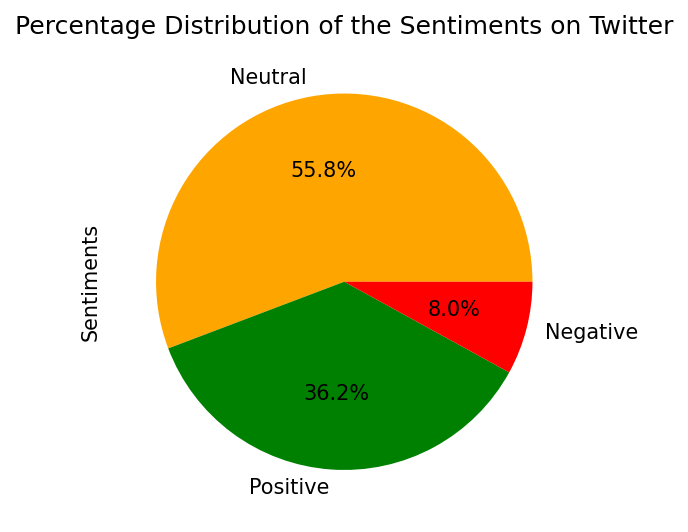

In [96]:
#Plotting the percentage distribution of the sentiments on Twitter

plotGraph(pumaTask2[pumaTask2['Source'] == 'Twitter']['Sentiments'], 'Percentage Distribution of the Sentiments on Twitter')

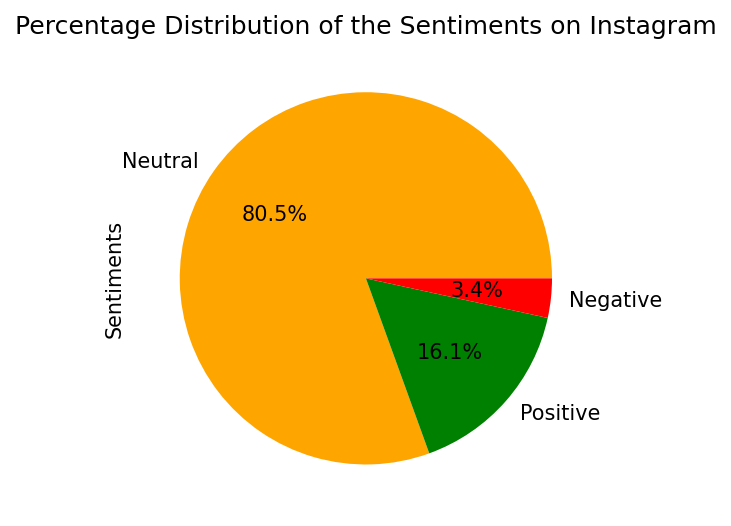

In [97]:
#Plotting the percentage distribution of the sentiments on Instagram

plotGraph(pumaTask2[pumaTask2['Source'] == 'Instagram']['Sentiments'], 'Percentage Distribution of the Sentiments on Instagram')

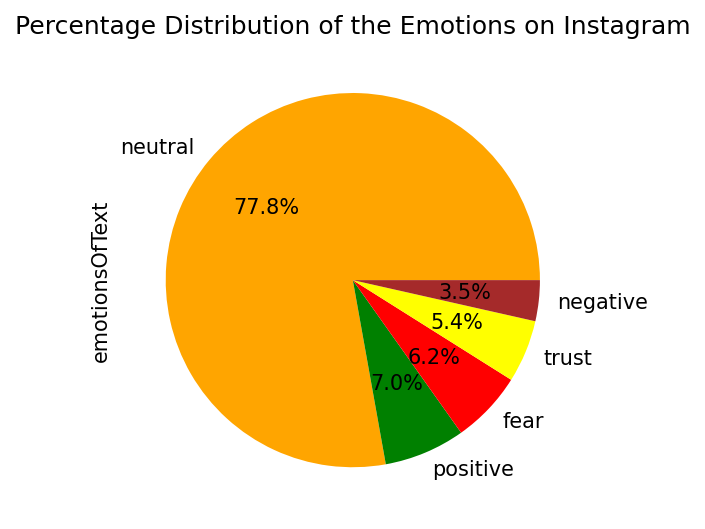

In [98]:
#Plotting the percentage distribution of the emotions on Instagram

plotGraph(pumaTask2[pumaTask2['Source'] == 'Instagram']['emotionsOfText'], 'Percentage Distribution of the Emotions on Instagram')

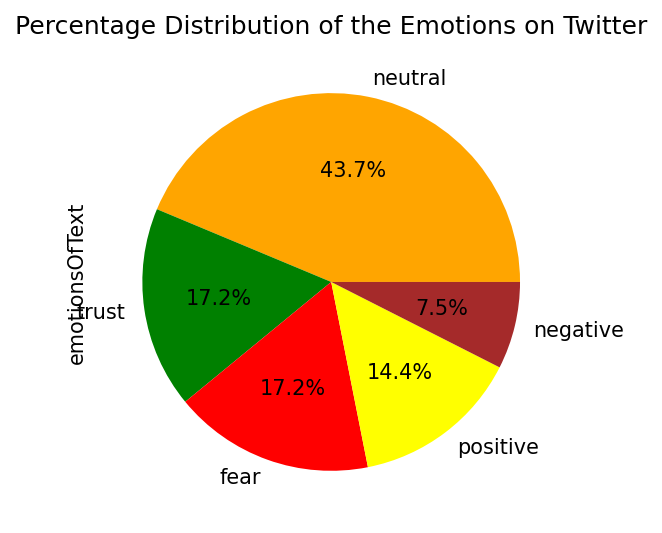

In [99]:
#Plotting the percentage distribution of the emotions on Twitter

plotGraph(pumaTask2[pumaTask2['Source'] == 'Twitter']['emotionsOfText'], 'Percentage Distribution of the Emotions on Twitter')

In [100]:
#Calculating the average sentiments for the evaluation of the platform

print("average sentiments on Instagram: " + str(pumaTask2[pumaTask2['Source'] == 'Instagram']['Sentiment_Index'].mean()))
print("average sentiments on Twitter: " + str(pumaTask2[pumaTask2['Source'] == 'Twitter']['Sentiment_Index'].mean()))

average sentiments on Instagram: 0.05642988551481199
average sentiments on Twitter: 0.10072158933658933


In [101]:
#Calculating the average hashtag count for the evaluation of the platform

print("average hashtags on Instagram: " + str(pumaTask2[pumaTask2['Source'] == 'Instagram']['hashtag_count'].mean()))
print("average hashtags on Twitter: " + str(pumaTask2[pumaTask2['Source'] == 'Twitter']['hashtag_count'].mean()))

average hashtags on Instagram: 0.047058823529411764
average hashtags on Twitter: 2.2094117647058824


In [102]:
#Calculating the average mentipns for the evaluation of the platform

print("average mentions on Instagram: " + str(pumaTask2[pumaTask2['Source'] == 'Instagram']['mentions_count'].mean()))
print("average mentions on Twitter: " + str(pumaTask2[pumaTask2['Source'] == 'Twitter']['mentions_count'].mean()))

average mentions on Instagram: 0.17882352941176471
average mentions on Twitter: 1.131764705882353


In [103]:
#Calculating the average emotions for the evaluation of the platform

print("average emotions on Twitter: " + str(pumaTask2[pumaTask2['Source'] == 'Twitter']['emotionsOfText'].mode()))
print("average emotions on Instagram: " + str(pumaTask2[pumaTask2['Source'] == 'Instagram']['emotionsOfText'].mode()))

average emotions on Twitter: 0    neutral
Name: emotionsOfText, dtype: object
average emotions on Instagram: 0    neutral
Name: emotionsOfText, dtype: object


In [104]:
#Calculating the average character count for the evaluation of the platform

print("average character count on Instagram: " + str(pumaTask2[pumaTask2['Source'] == 'Instagram']['character_count'].mean()))
print("average character count on Twitter: " + str(pumaTask2[pumaTask2['Source'] == 'Twitter']['character_count'].mean()))

average character count on Instagram: 35.45647058823529
average character count on Twitter: 167.00882352941176


In [105]:
#Creating the two separate database by dividing the data from Twitter and Instagram 

pumaTask2DataTwitter = pumaTask2[pumaTask2['Source'] == 'Twitter']
pumaTask2DataInsta = pumaTask2[pumaTask2['Source'] == 'Instagram']

In [106]:
pumaTask2DataTwitter

text  likes  replies  \
0     la de los golden music cuándo presentaron puma...    1.0      0.0   
1     Boca Juniors vs Godoy Cruz\n\n(04 feb 2019) ht...    0.0      0.0   
2     ／\n靴がお得な今だからこそ🔥\n高オフ率のシューズだけ大集合～～！📢\n＼\n\nadid...   58.0      4.0   
3     PUMA Clyde NUMBER 11 MIJ\n\n素晴らしい👍\n\n今年23足目\n...    0.0      0.0   
4     @itz_PumA_58 @imVkohli @AnushkaSharma he's abu...    0.0      0.0   
...                                                 ...    ...      ...   
1695  MB.02 BE YOU\n\nこれまで発売したモデルから要素を取り入れた鮮やかなマルチカラ...   28.0      4.0   
1696  #Puma Plots #NFTSneakerDrop With #NBA LaMelo B...    1.0      1.0   
1697  NBA sensation LaMelo Ball, global sportswear b...    0.0      0.0   
1698  🚨 LaMelo Ball's Puma MB.03: The Fusion of Bask...    2.0      1.0   
1699  @GURU66777 @ManCity @imVkohli @AnushkaSharma P...    2.0      0.0   

       Source emotionsOfText  \
0     Twitter           fear   
1     Twitter        neutral   
2     Twitter        neutral   
3     Twitter        neutral   
4     Twitter        neutral   
...       ...            ...   
1695  Twitter        neutral   
1696  Twitter        neutral   
1697  Twitter          trust   
1698  Twitter        neutral   
1699  Twitter          trust   

                                          cleaned_tweet  Sentiment_Index  \
0     la de lo golden music cu ndo presentaron puma ...              0.3   
1      boca junior vs godoy cruz feb http co zow darmga              0.0   
2                    adida puma suicok http co umrz aac              0.0   
3     puma clyde number mij clydenumb mij magforlia ...              0.0   
4          itz puma imvkohli anushkasharma abus husband              0.0   
...                                                 ...              ...   
1695  mb http co uxyynvpwxi puma mb nba http co u q jbq              0.0   
1696  puma plot nftsneakerdrop nba lamelo ball gutte...              0.0   
1697  nba sensat lamelo ball global sportswear brand...              0.0   
1698  lamelo ball puma mb fusion basketbal fashion c...              0.0   
1699  guru manciti imvkohli anushkasharma puma se ha...              0.0   

     Sentiments  character_count  hashtag_count  mentions_count  
0      Positive              124              0               0  
1       Neutral               65              0               0  
2       Neutral              126              0               0  
3       Neutral              242             16               0  
4       Neutral               65              0               3  
...         ...              ...            ...             ...  
1695    Neutral              206              5               0  
1696    Neutral              127              6               0  
1697    Neutral              251              5               0  
1698    Neutral              161              7               0  
1699    Neutral               98              0               4  

[1700 rows x 11 columns]

<Axes: >

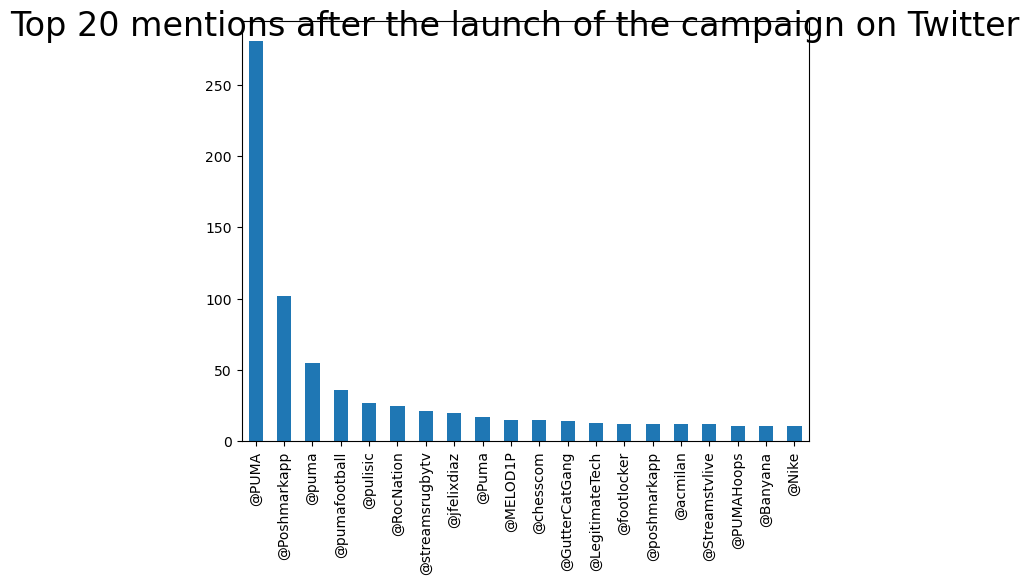

In [185]:
#Plotting top 20 mentions after the launch of the campaign on twitter

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions after the launch of the campaign on Twitter', fontsize=24)
pumaTask2DataTwitter['text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

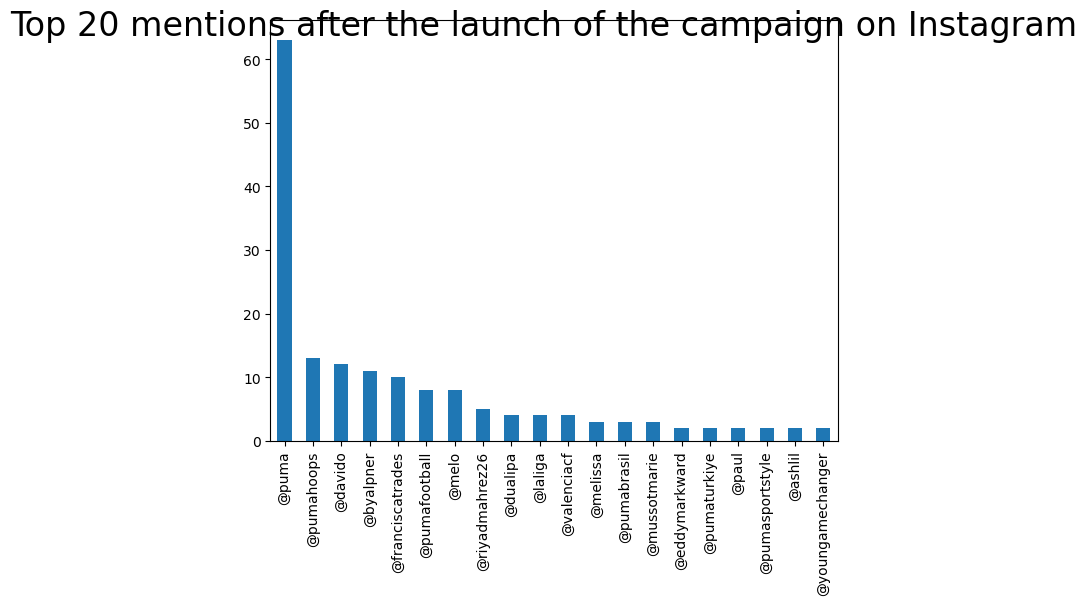

In [186]:
#Plotting top 20 mentions after the launch of the campaign on Instagram

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions after the launch of the campaign on Instagram', fontsize=24)
pumaTask2DataInsta['text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12500 (\N{KATAKANA LETTER PI}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12517 (\N{KATAKANA LETTER SMALL YU}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 31070 (\N{CJK UNIFIED IDEOGRAPH-795E}) missing from current font.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 25144 (\N{CJK UNIFIED IDEOGRAPH-6238}) missing from current font.
  func(*args, **kwargs)
D:\Anacond

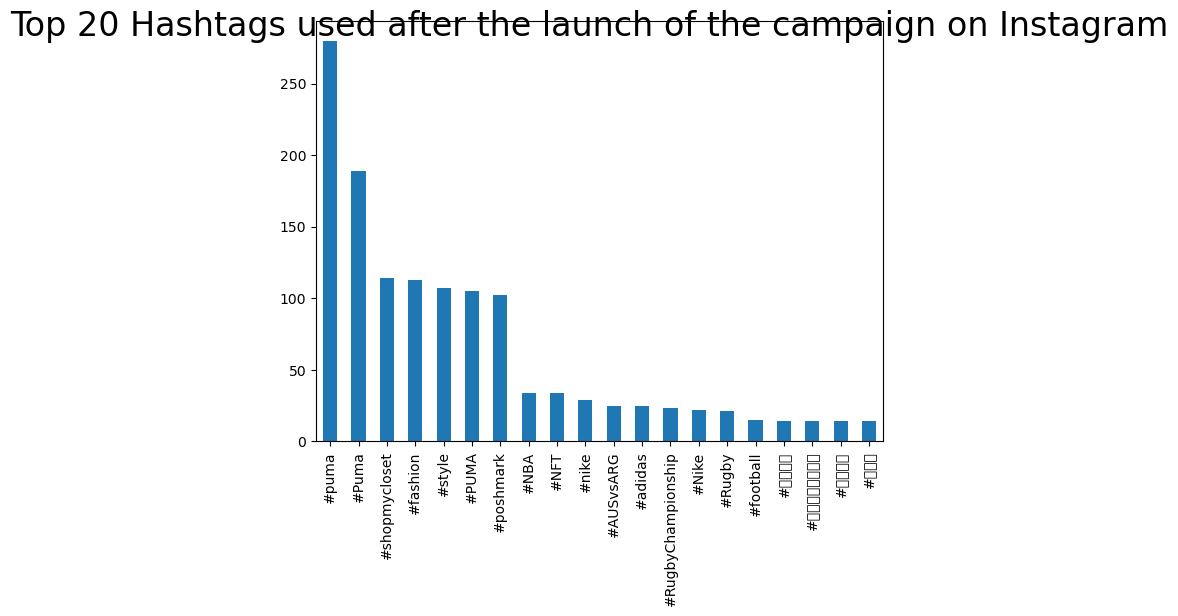

In [109]:
#Plotting top 20 hashtags 

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 Hashtags used after the launch of the campaign on Instagram', fontsize=24)
pumaTask2['text'].str.findall('(#\w+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

<Axes: >

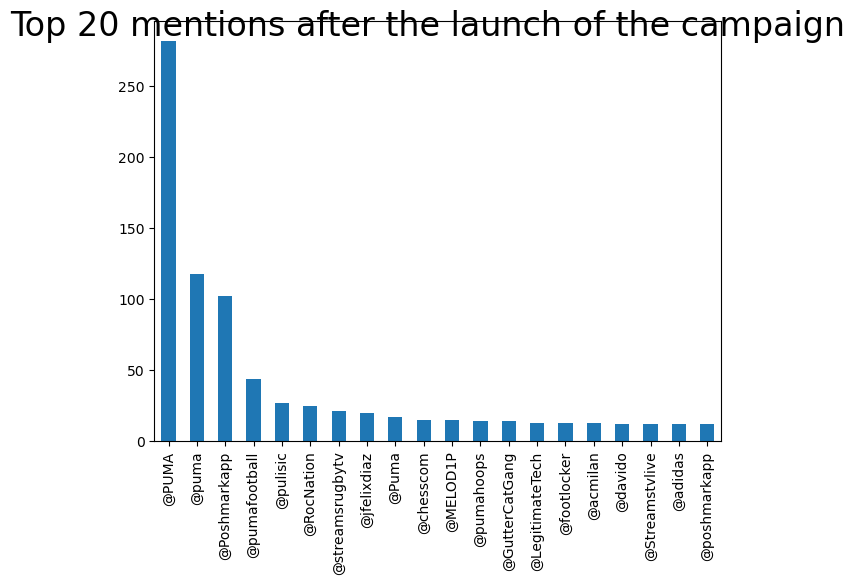

In [110]:
#Plotting top 20 mentions

plt.grid(False)
plt.tight_layout()
plt.suptitle('Top 20 mentions after the launch of the campaign', fontsize=24)
pumaTask2['text'].str.findall('(@[A-Za-z0-9]+)').apply(lambda x: pd.value_counts(x)).sum(axis=0).sort_values(ascending=False)[:20].plot(kind='bar')

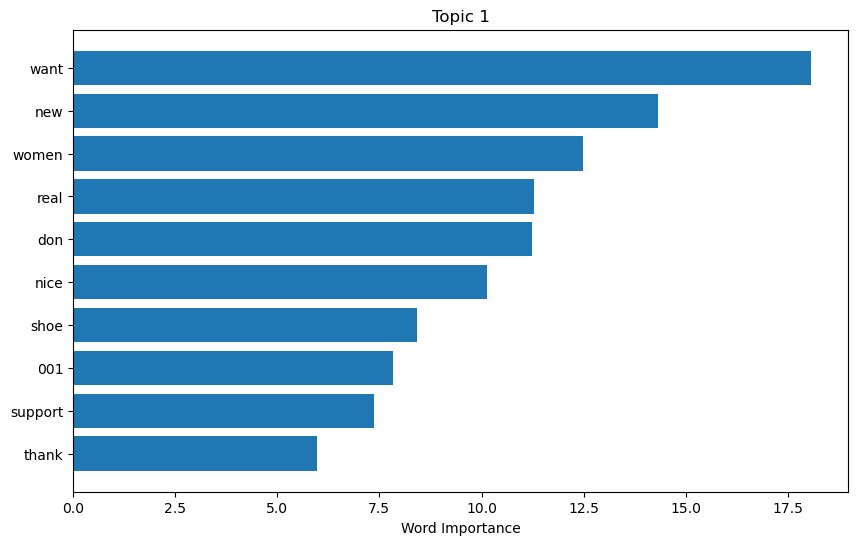

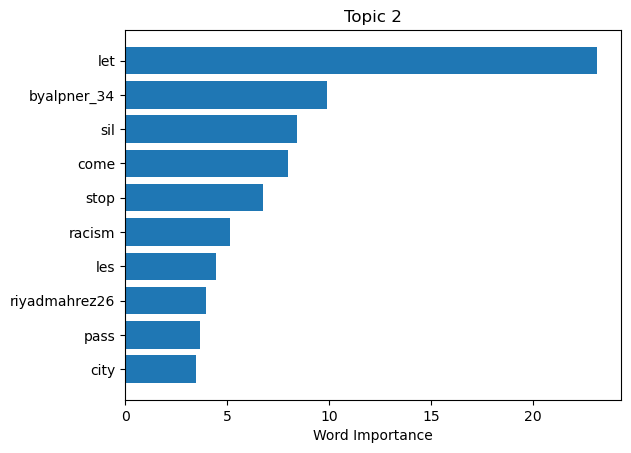

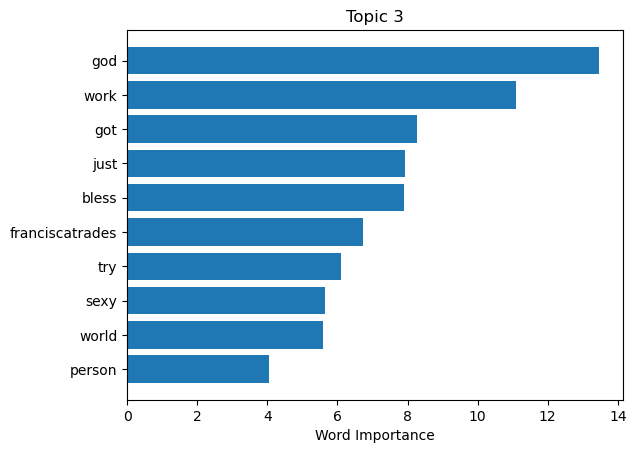

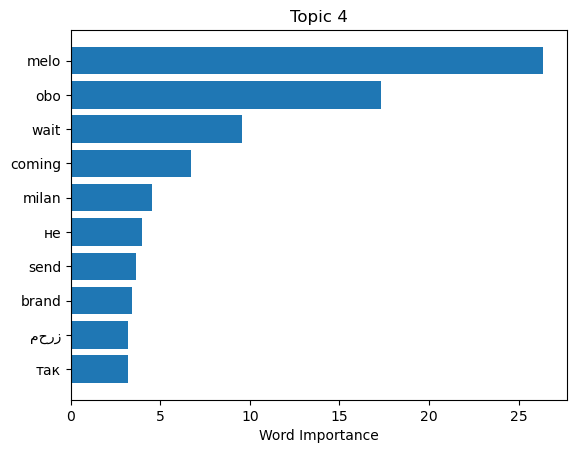

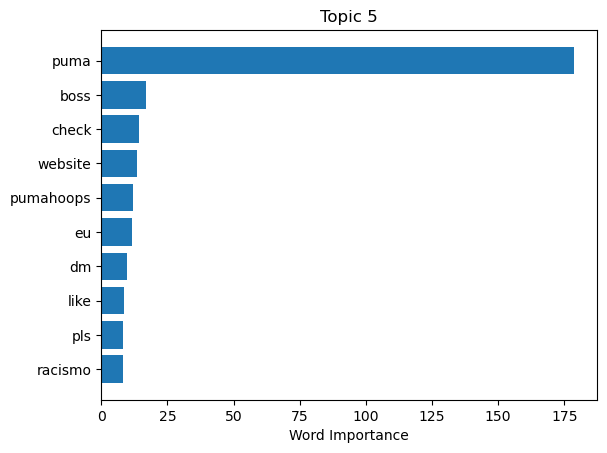

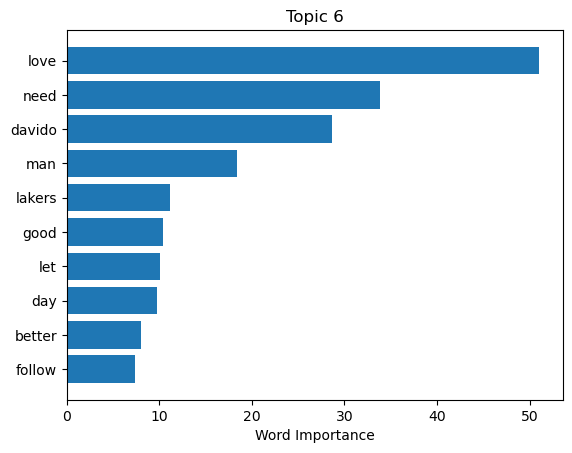

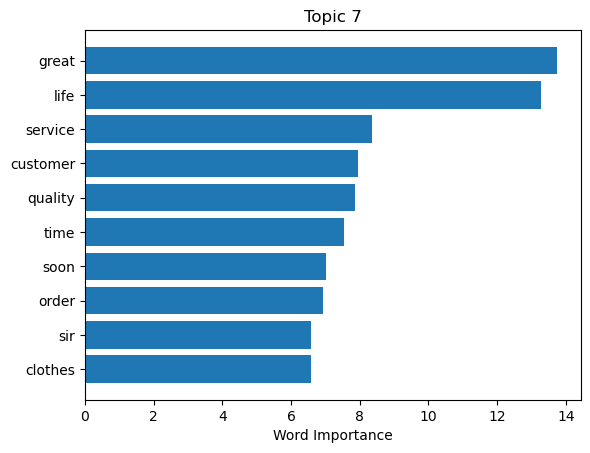

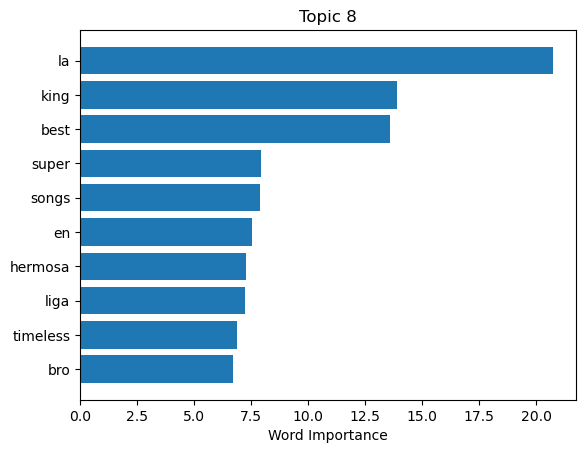

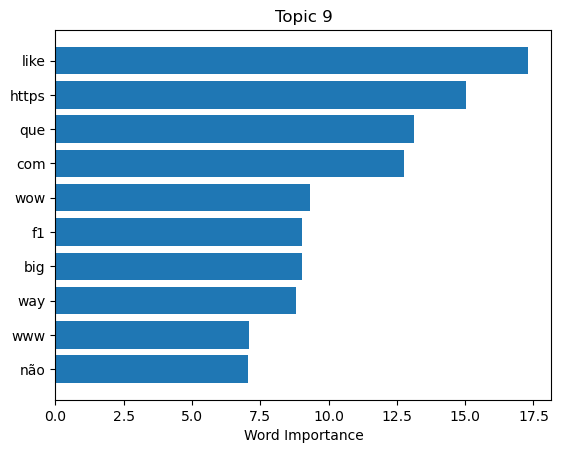

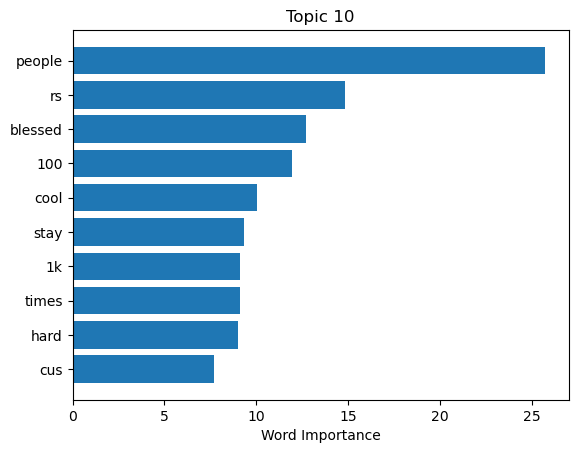

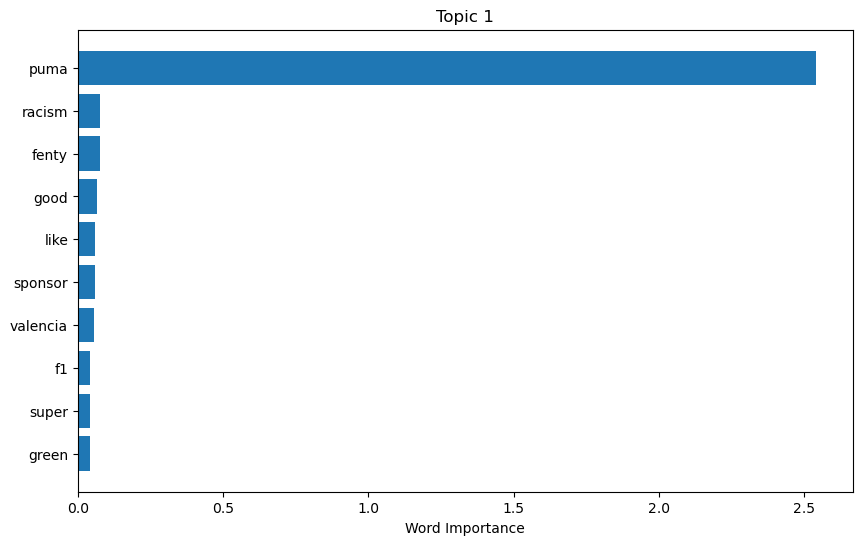

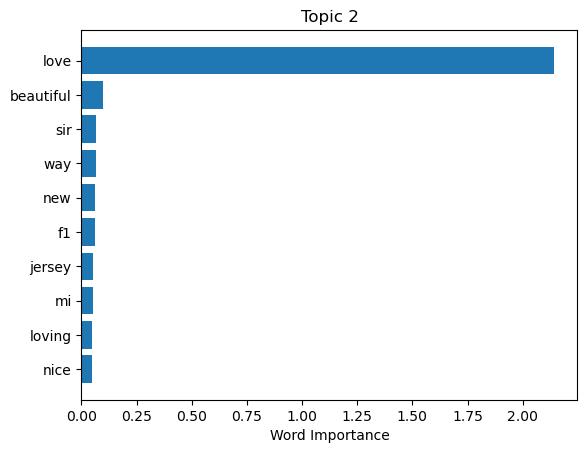

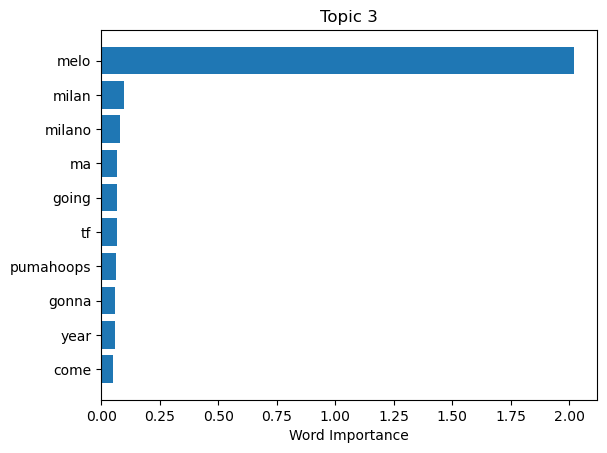

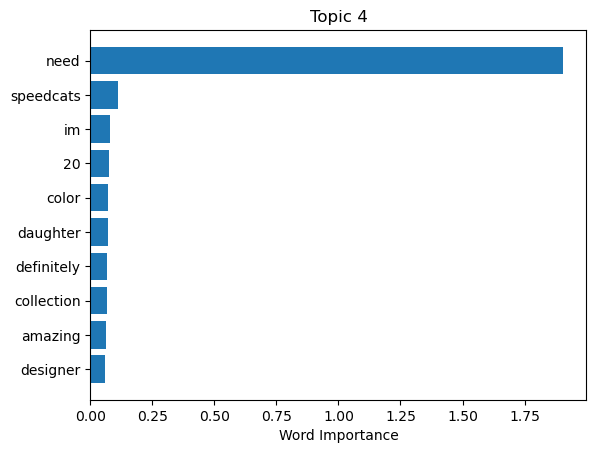

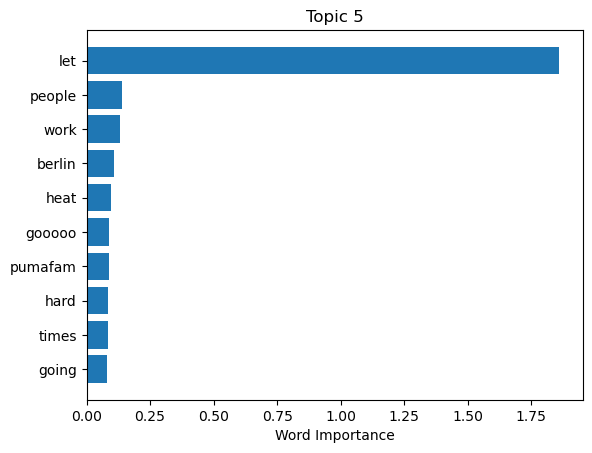

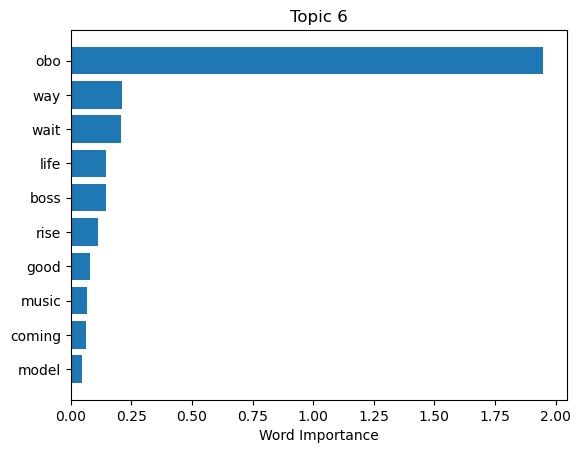

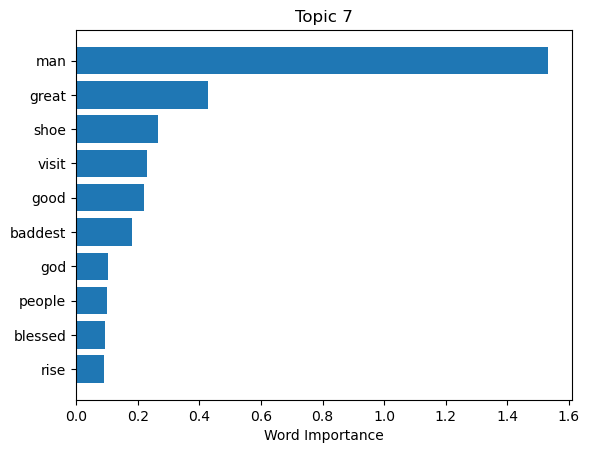

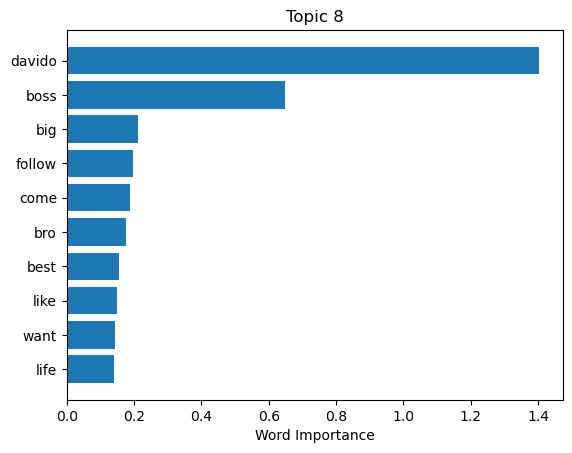

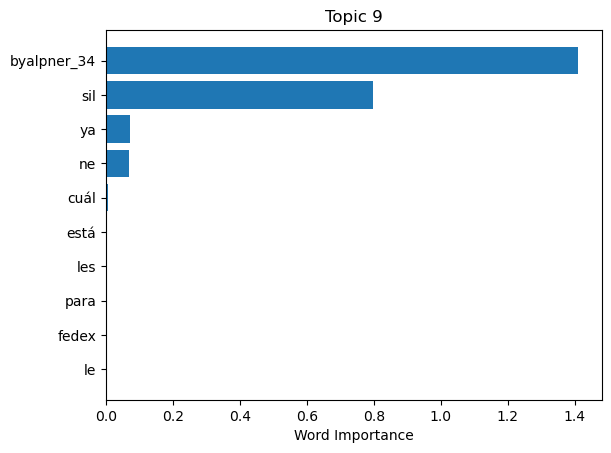

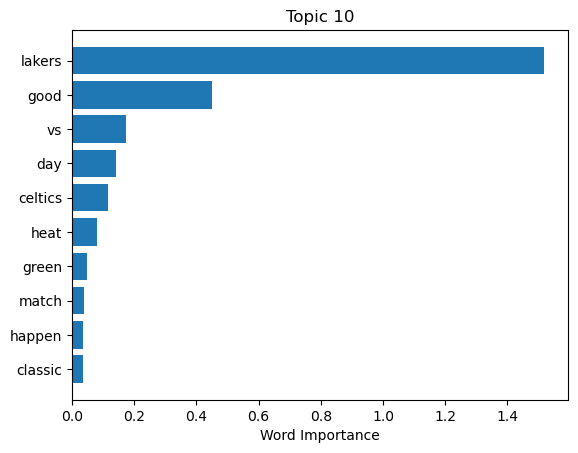

In [111]:
tfidVect(pumaTask2[pumaTask2['Source'] == 'Instagram']['text'])

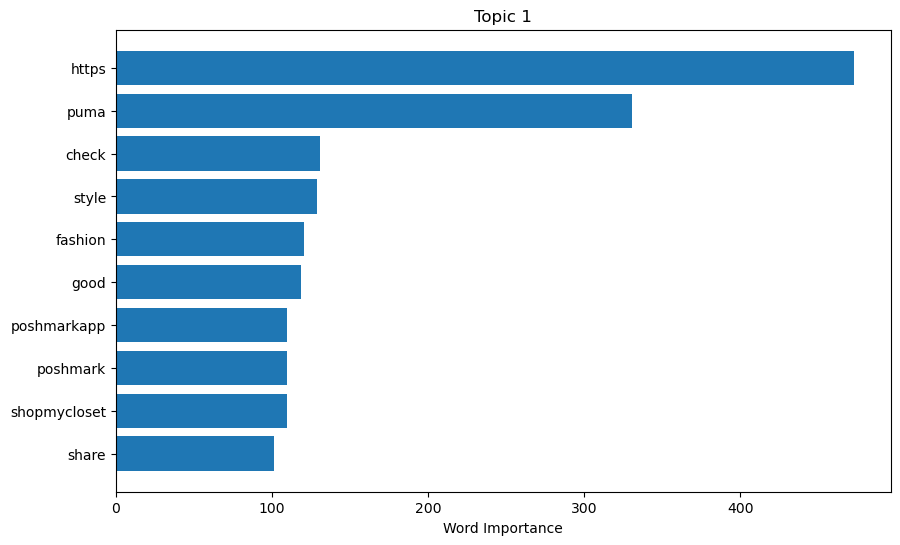

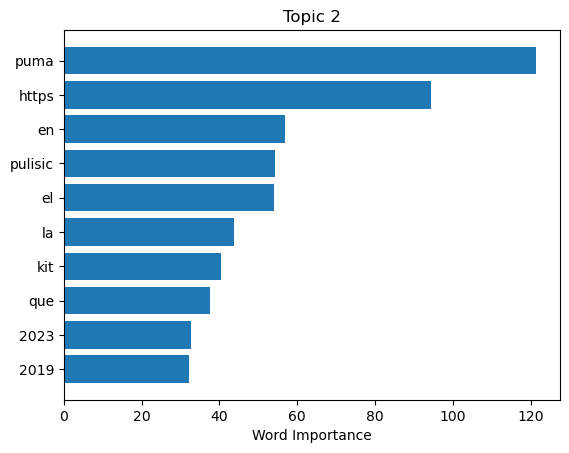

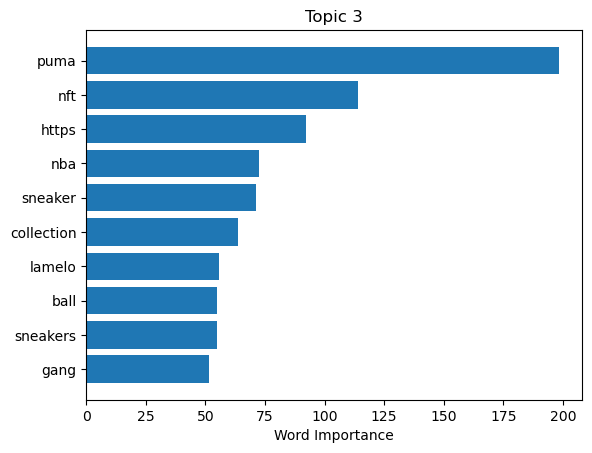

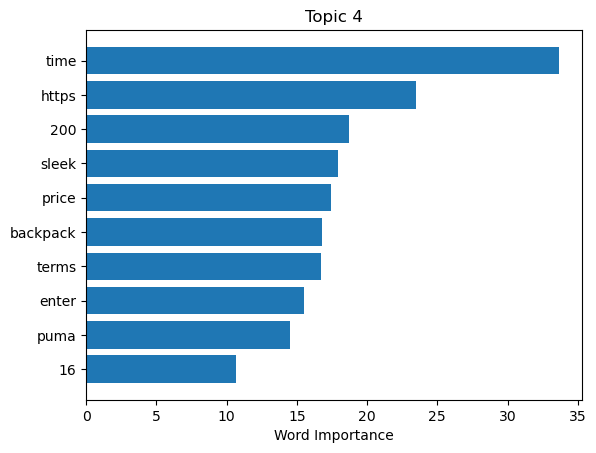

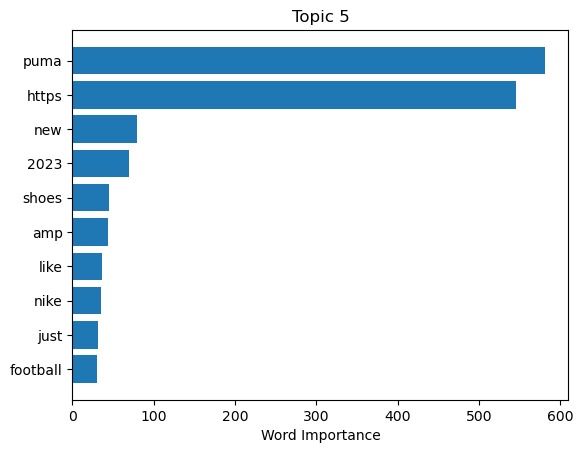

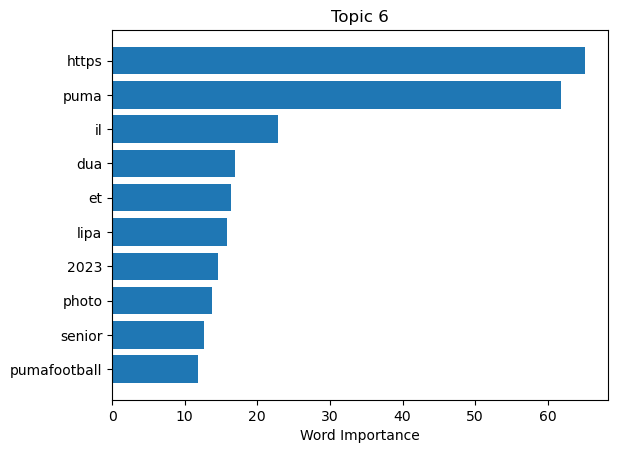

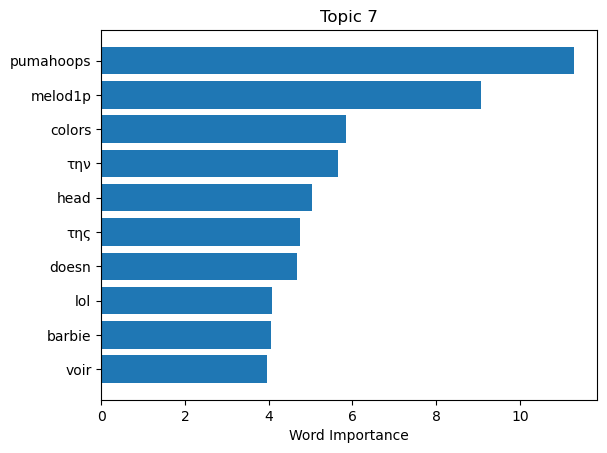

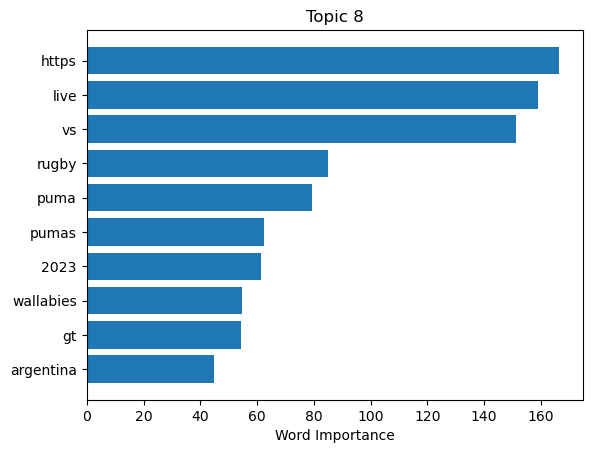

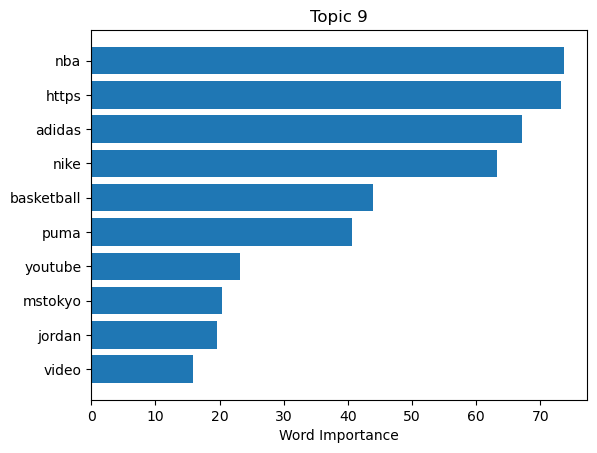

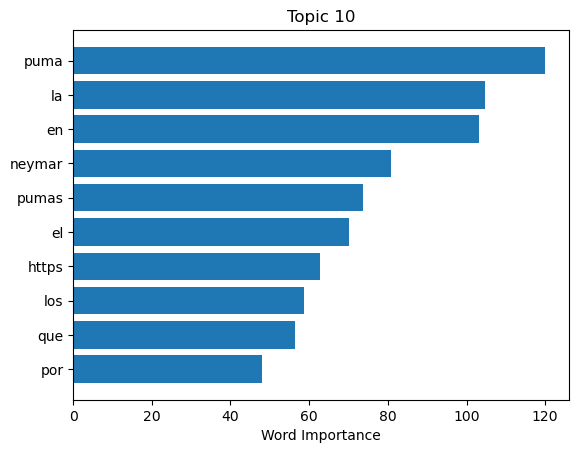

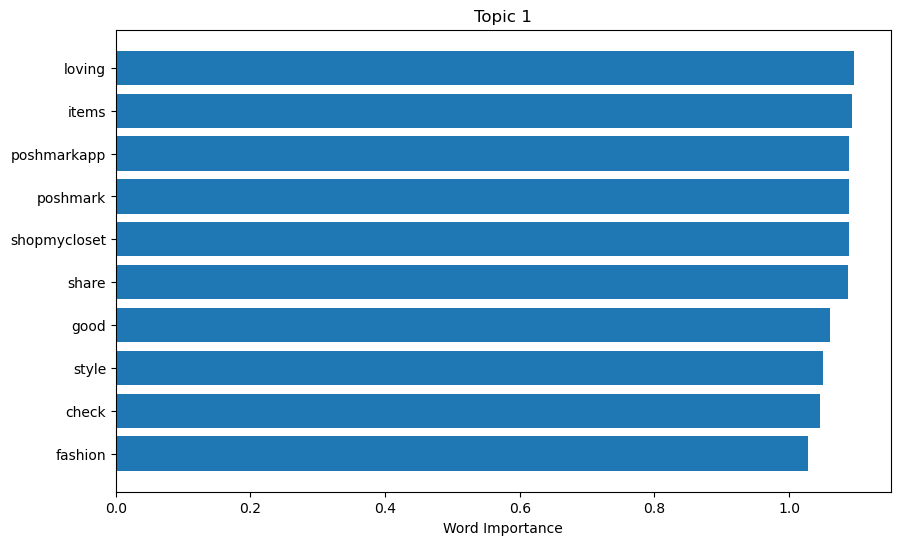

D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12503 (\N{KATAKANA LETTER PU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12510 (\N{KATAKANA LETTER MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


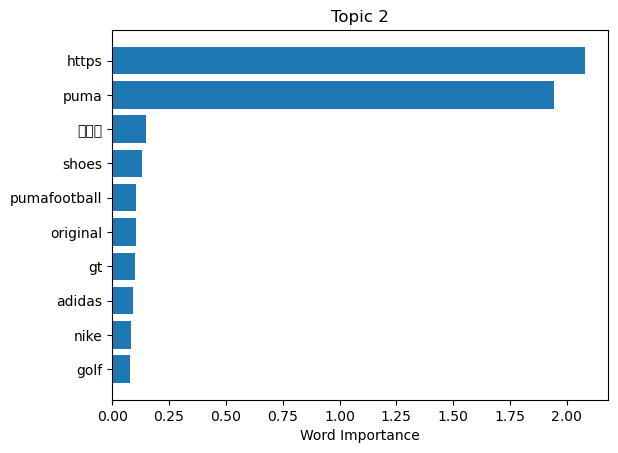

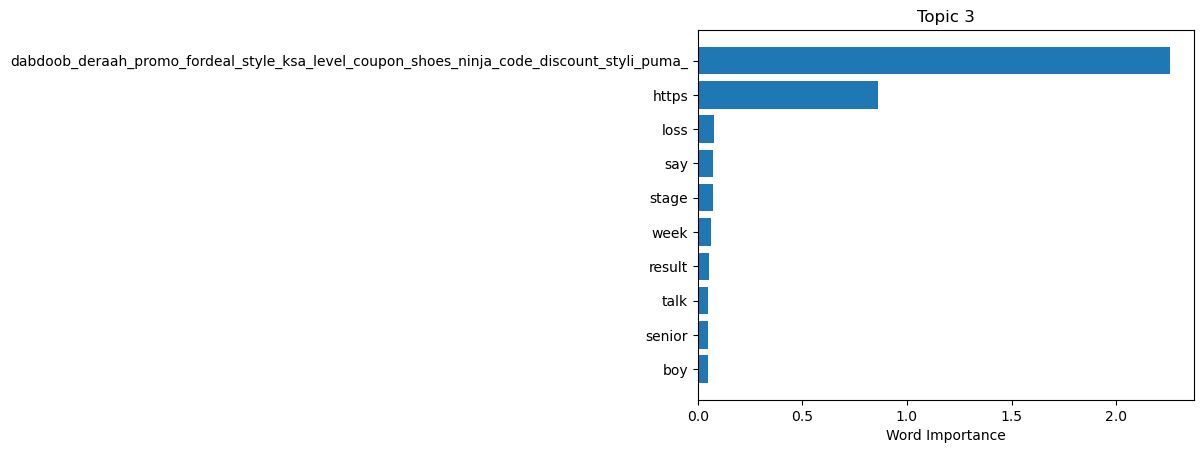

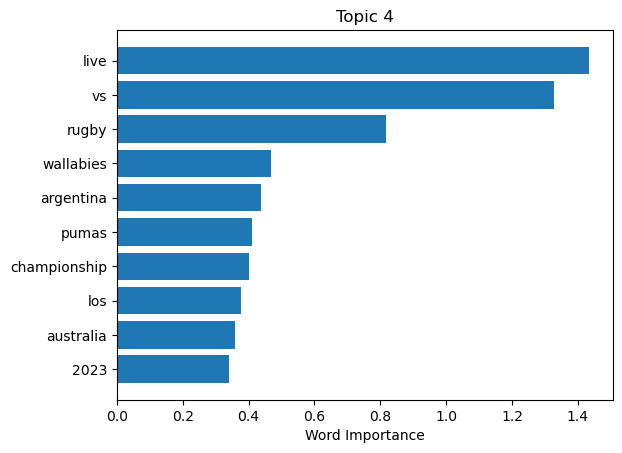

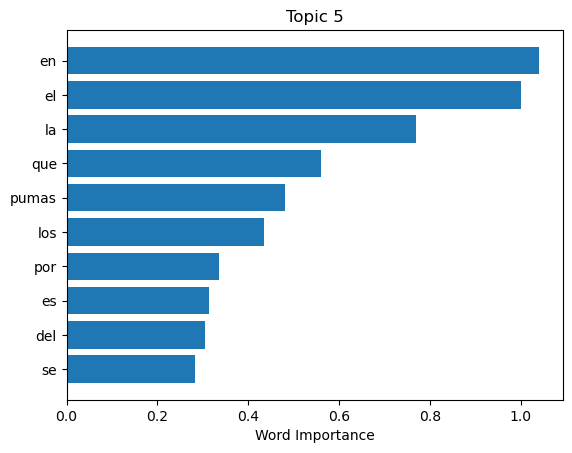

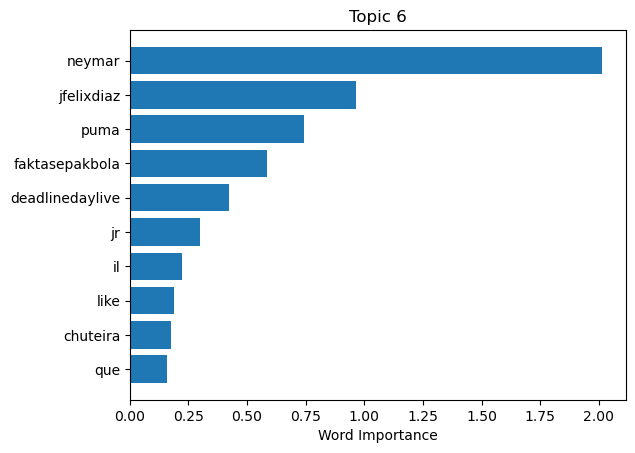

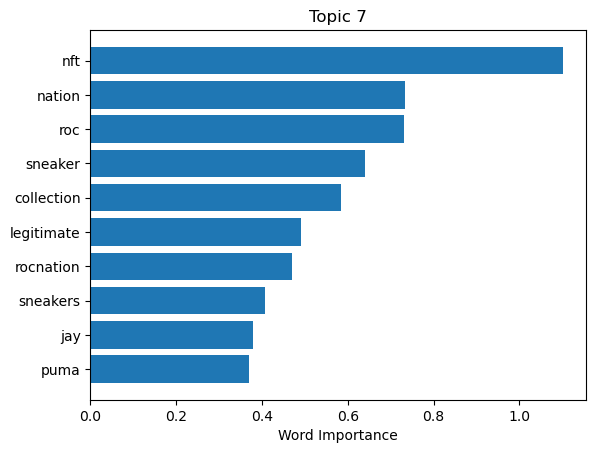

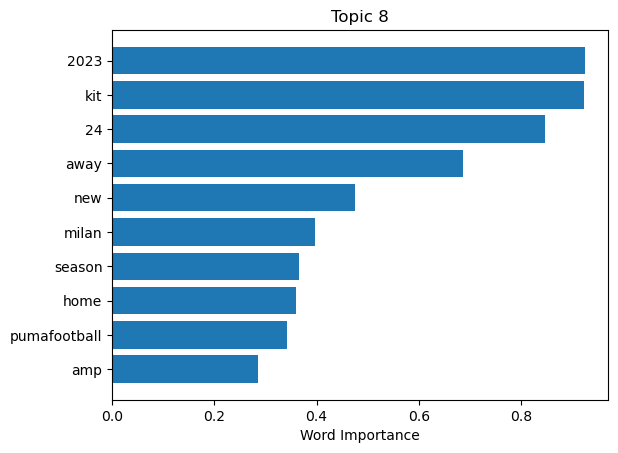

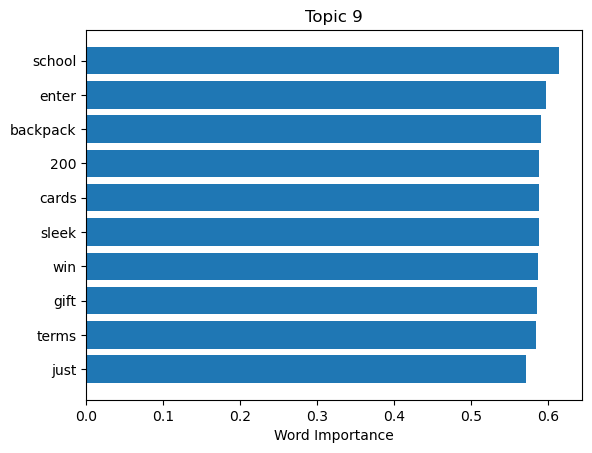

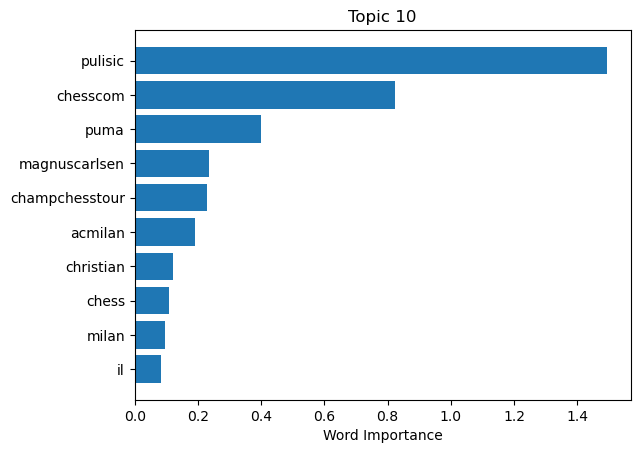

In [112]:
tfidVect(pumaTask2[pumaTask2['Source'] == 'Twitter']['text'])

In [113]:
#TAsK 3

In [114]:
#Instagram data for task 3

instaComments = pumaInsta
instaComments

profilePictureUrl            username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...             puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...     _imyourgreentea   
2      https://scontent.cdninstagram.com/v/t51.2885-1...      robbie.omahony   
3      https://scontent.cdninstagram.com/v/t51.2885-1...         nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...           huijeongs   
...                                                  ...                 ...   
60886  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60887  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60888  https://scontent-cdg4-1.cdninstagram.com/v/t51...       h.a.m.i.d____   
60889  https://scontent-cdg4-3.cdninstagram.com/v/t51...          yoyo222884   
60890  https://scontent-cdg4-2.cdninstagram.com/v/t51...  clippersoffpodcast   

                                         profileUrl  \
0                 https://www.instagram.com/puma.uk   
1         https://www.instagram.com/_imyourgreentea   
2          https://www.instagram.com/robbie.omahony   
3             https://www.instagram.com/nicogchehab   
4               https://www.instagram.com/huijeongs   
...                                             ...   
60886       https://www.instagram.com/h.a.m.i.d____   
60887       https://www.instagram.com/h.a.m.i.d____   
60888       https://www.instagram.com/h.a.m.i.d____   
60889          https://www.instagram.com/yoyo222884   
60890  https://www.instagram.com/clippersoffpodcast   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
2                                                    NaN          5   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
...                                                  ...        ...   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻          1   
60887                                             👏🔥👏🔥👏🔥          1   
60888                                           👏🏻👏🏻👏🏻👏🏻          0   
60889                                My favorite brand 🤩          0   
60890                                                  🔥          0   

       replyCount               commentDate     commentId      ownerId  \
0               1 2023-05-19 09:39:44+00:00  1.810000e+16  52254607088   
1               0 2023-05-19 08:07:54+00:00  1.800000e+16  26554098971   
2               0 2023-05-19 10:15:09+00:00  1.800000e+16  11297028939   
3               0 2023-05-19 12:36:20+00:00  1.800000e+16   2867998756   
4               0 2023-05-19 08:05:33+00:00  1.800000e+16    842764645   
...           ...                       ...           ...          ...   
60886           0 2022-09-10 19:20:02+00:00  1.790000e+16   3432165999   
60887           0 2022-09-10 19:19:59+00:00  1.800000e+16   3432165999   
60888           0 2022-09-10 19:19:59+00:00  1.790000e+16   3432165999   
60889           0 2022-09-10 19:19:24+00:00  1.800000e+16  50210814297   
60890           0 2022-09-10 19:18:44+00:00  1.790000e+16  50105501252   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
2      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60886  2023-07-17T10:26:02.349Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60887  2023-07-17T10:26:02.349Z  https://www.instagram.com/

In [115]:
#Removing duplicate comments from the Instagram dataset

instaComments = instaComments.drop_duplicates('comment')
instaComments

profilePictureUrl           username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...            puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...    _imyourgreentea   
2      https://scontent.cdninstagram.com/v/t51.2885-1...     robbie.omahony   
3      https://scontent.cdninstagram.com/v/t51.2885-1...        nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...          huijeongs   
...                                                  ...                ...   
60878  https://scontent-cdg4-3.cdninstagram.com/v/t51...       donnieewestt   
60879  https://scontent-cdg4-2.cdninstagram.com/v/t51...    iamcoraldolphin   
60881  https://scontent-cdg4-1.cdninstagram.com/v/t51...  davidgiovanne_f16   
60886  https://scontent-cdg4-1.cdninstagram.com/v/t51...      h.a.m.i.d____   
60889  https://scontent-cdg4-3.cdninstagram.com/v/t51...         yoyo222884   

                                        profileUrl  \
0                https://www.instagram.com/puma.uk   
1        https://www.instagram.com/_imyourgreentea   
2         https://www.instagram.com/robbie.omahony   
3            https://www.instagram.com/nicogchehab   
4              https://www.instagram.com/huijeongs   
...                                            ...   
60878       https://www.instagram.com/donnieewestt   
60879    https://www.instagram.com/iamcoraldolphin   
60881  https://www.instagram.com/davidgiovanne_f16   
60886      https://www.instagram.com/h.a.m.i.d____   
60889         https://www.instagram.com/yoyo222884   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
2                                                    NaN          5   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
...                                                  ...        ...   
60878         I lowkey thought that was jeffery star lol          0   
60879                       They are not ready!!!! 🔥🔥⚡️💥          1   
60881                                             🙌🔥🔥🔥🔥🙌          0   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻          1   
60889                                My favorite brand 🤩          0   

       replyCount               commentDate     commentId      ownerId  \
0               1 2023-05-19 09:39:44+00:00  1.810000e+16  52254607088   
1               0 2023-05-19 08:07:54+00:00  1.800000e+16  26554098971   
2               0 2023-05-19 10:15:09+00:00  1.800000e+16  11297028939   
3               0 2023-05-19 12:36:20+00:00  1.800000e+16   2867998756   
4               0 2023-05-19 08:05:33+00:00  1.800000e+16    842764645   
...           ...                       ...           ...          ...   
60878           0 2022-09-10 20:21:47+00:00  1.790000e+16   8204523235   
60879           0 2022-09-10 20:18:59+00:00  1.800000e+16     44368524   
60881           0 2022-09-10 19:40:57+00:00  1.830000e+16  32967269683   
60886           0 2022-09-10 19:20:02+00:00  1.790000e+16   3432165999   
60889           0 2022-09-10 19:19:24+00:00  1.800000e+16  50210814297   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
2      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60878  2023-07-17T10:26:01.762Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60879  2023-07-17T10:26:01.762Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60881 

In [116]:
#Converting the datatype of comments date from String to Date

instaComments['commentDate'] = pd.to_datetime(instaComments['commentDate']) 

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2955948457.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instaComments['commentDate'] = pd.to_datetime(instaComments['commentDate'])


In [117]:
#Checking the null values from the dataset

np.sum(instaComments.isna())

profilePictureUrl       0
username                0
profileUrl              0
comment                 1
likeCount               0
replyCount              0
commentDate             0
commentId               0
ownerId                 0
timestamp               0
query                   0
Post                 5406
Source                  0
dtype: int64

In [118]:
instaComments = instaComments.drop_duplicates('comment')

In [119]:
#Dropping the na/null values from the dataset

instaComments = instaComments.dropna()
instaComments

profilePictureUrl           username  \
0      https://scontent.cdninstagram.com/v/t51.2885-1...            puma.uk   
1      https://scontent.cdninstagram.com/v/t51.2885-1...    _imyourgreentea   
3      https://scontent.cdninstagram.com/v/t51.2885-1...        nicogchehab   
4      https://scontent.cdninstagram.com/v/t51.2885-1...          huijeongs   
5      https://scontent.cdninstagram.com/v/t51.2885-1...            t4lecki   
...                                                  ...                ...   
60878  https://scontent-cdg4-3.cdninstagram.com/v/t51...       donnieewestt   
60879  https://scontent-cdg4-2.cdninstagram.com/v/t51...    iamcoraldolphin   
60881  https://scontent-cdg4-1.cdninstagram.com/v/t51...  davidgiovanne_f16   
60886  https://scontent-cdg4-1.cdninstagram.com/v/t51...      h.a.m.i.d____   
60889  https://scontent-cdg4-3.cdninstagram.com/v/t51...         yoyo222884   

                                        profileUrl  \
0                https://www.instagram.com/puma.uk   
1        https://www.instagram.com/_imyourgreentea   
3            https://www.instagram.com/nicogchehab   
4              https://www.instagram.com/huijeongs   
5                https://www.instagram.com/t4lecki   
...                                            ...   
60878       https://www.instagram.com/donnieewestt   
60879    https://www.instagram.com/iamcoraldolphin   
60881  https://www.instagram.com/davidgiovanne_f16   
60886      https://www.instagram.com/h.a.m.i.d____   
60889         https://www.instagram.com/yoyo222884   

                                                 comment  likeCount  \
0                                    Sky blue forever 🙌💙         58   
1                                 The green is so good!!         11   
3      The shirt that commemorates the 115 charges th...          1   
4      puma so perfect design 👏I like color and this ...          7   
5                                    The GK ones tho 🤩🤩🤩          1   
...                                                  ...        ...   
60878         I lowkey thought that was jeffery star lol          0   
60879                       They are not ready!!!! 🔥🔥⚡️💥          1   
60881                                             🙌🔥🔥🔥🔥🙌          0   
60886                                         🙌🏻💪🏻🙌🏻💪🏻🙌🏻          1   
60889                                My favorite brand 🤩          0   

       replyCount               commentDate     commentId      ownerId  \
0               1 2023-05-19 09:39:44+00:00  1.810000e+16  52254607088   
1               0 2023-05-19 08:07:54+00:00  1.800000e+16  26554098971   
3               0 2023-05-19 12:36:20+00:00  1.800000e+16   2867998756   
4               0 2023-05-19 08:05:33+00:00  1.800000e+16    842764645   
5               0 2023-05-19 12:04:58+00:00  1.800000e+16  31365126695   
...           ...                       ...           ...          ...   
60878           0 2022-09-10 20:21:47+00:00  1.790000e+16   8204523235   
60879           0 2022-09-10 20:18:59+00:00  1.800000e+16     44368524   
60881           0 2022-09-10 19:40:57+00:00  1.830000e+16  32967269683   
60886           0 2022-09-10 19:20:02+00:00  1.790000e+16   3432165999   
60889           0 2022-09-10 19:19:24+00:00  1.800000e+16  50210814297   

                      timestamp                                     query  \
0      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
5      2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                         ...                                       ...   
60878  2023-07-17T10:26:01.762Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60879  2023-07-17T10:26:01.762Z  https://www.instagram.com/p/CiVmPlmgrTf/   
60881 

In [120]:
#Selecting 1500 datapoints from Instagram for the analysis

pumaTask3InstaData = instaComments.head(1500)

In [121]:
#Checking the dataset for the null values

np.sum(pumaTask3InstaData.isna())

profilePictureUrl    0
username             0
profileUrl           0
comment              0
likeCount            0
replyCount           0
commentDate          0
commentId            0
ownerId              0
timestamp            0
query                0
Post                 0
Source               0
dtype: int64

In [122]:
pumaTask3InstaData

profilePictureUrl  \
0     https://scontent.cdninstagram.com/v/t51.2885-1...   
1     https://scontent.cdninstagram.com/v/t51.2885-1...   
3     https://scontent.cdninstagram.com/v/t51.2885-1...   
4     https://scontent.cdninstagram.com/v/t51.2885-1...   
5     https://scontent.cdninstagram.com/v/t51.2885-1...   
...                                                 ...   
2020  https://scontent-lhr8-1.cdninstagram.com/v/t51...   
2023  https://scontent-lhr8-1.cdninstagram.com/v/t51...   
2027  https://scontent-lhr8-1.cdninstagram.com/v/t51...   
2028  https://scontent-lhr8-1.cdninstagram.com/v/t51...   
2029  https://scontent-lhr8-1.cdninstagram.com/v/t51...   

                      username  \
0                      puma.uk   
1              _imyourgreentea   
3                  nicogchehab   
4                    huijeongs   
5                      t4lecki   
...                        ...   
2020                  _iyimide   
2023                   donper0   
2027                    _kenn7   
2028                    _aare_   
2029  ivy_the_serbian_princess   

                                             profileUrl  \
0                     https://www.instagram.com/puma.uk   
1             https://www.instagram.com/_imyourgreentea   
3                 https://www.instagram.com/nicogchehab   
4                   https://www.instagram.com/huijeongs   
5                     https://www.instagram.com/t4lecki   
...                                                 ...   
2020                 https://www.instagram.com/_iyimide   
2023                  https://www.instagram.com/donper0   
2027                   https://www.instagram.com/_kenn7   
2028                   https://www.instagram.com/_aare_   
2029  https://www.instagram.com/ivy_the_serbian_prin...   

                                                comment  likeCount  \
0                                   Sky blue forever 🙌💙         58   
1                                The green is so good!!         11   
3     The shirt that commemorates the 115 charges th...          1   
4     puma so perfect design 👏I like color and this ...          7   
5                                   The GK ones tho 🤩🤩🤩          1   
...                                                 ...        ...   
2020                                          Love it 😍          0   
2023                                             001🔥🔥🔥          0   
2027                                            Idan!!!          0   
2028                                  00000000000001🔥🔥🔥          0   
2029  @puma will you be stock the white “we rise by ...          0   

      replyCount               commentDate     commentId      ownerId  \
0              1 2023-05-19 09:39:44+00:00  1.810000e+16  52254607088   
1              0 2023-05-19 08:07:54+00:00  1.800000e+16  26554098971   
3              0 2023-05-19 12:36:20+00:00  1.800000e+16   2867998756   
4              0 2023-05-19 08:05:33+00:00  1.800000e+16    842764645   
5              0 2023-05-19 12:04:58+00:00  1.800000e+16  31365126695   
...          ...                       ...           ...          ...   
2020           0 2023-04-08 08:08:45+00:00  1.800000e+16   1455720262   
2023           0 2023-04-08 08:53:05+00:00  1.790000e+16   4039815760   
2027           0 2023-04-08 11:23:11+00:00  1.800000e+16  36168772793   
2028           0 2023-04-08 11:40:14+00:00  1.800000e+16   2263883334   
2029           0 2023-04-08 11:59:31+00:00  1.800000e+16   1922419295   

                     timestamp                                     query  \
0     2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
1     2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
3     2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
4     2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
5     2023-07-14T12:42:20.340Z  https://www.instagram.com/p/CsatF-Iqxov/   
...                        ...       

In [123]:
#Selecting the columns suitable for the analysis
#The columns include comments, number of likes, number of replies, type of post and the source

pumaTask3InstaData = pumaTask3InstaData[['comment', 'likeCount', 'replyCount', 'Post', 'Source']]

In [124]:
#Renaming the columns to maintain unifomity

pumaTask3InstaData = pumaTask3InstaData.rename(columns = {'comment' : 'text', 'likeCount' : 'like', 'replyCount' : 'replyCount', 'Post': 'TypeOfContent'})
pumaTask3InstaData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙    58           1   
1                                The green is so good!!    11           0   
3     The shirt that commemorates the 115 charges th...     1           0   
4     puma so perfect design 👏I like color and this ...     7           0   
5                                   The GK ones tho 🤩🤩🤩     1           0   
...                                                 ...   ...         ...   
2020                                          Love it 😍     0           0   
2023                                             001🔥🔥🔥     0           0   
2027                                            Idan!!!     0           0   
2028                                  00000000000001🔥🔥🔥     0           0   
2029  @puma will you be stock the white “we rise by ...     0           0   

     TypeOfContent     Source  
0            Image  Instagram  
1            Image  Instagram  
3            Image  Instagram  
4            Image  Instagram  
5            Image  Instagram  
...            ...        ...  
2020         Image  Instagram  
2023         Image  Instagram  
2027         Image  Instagram  
2028         Image  Instagram  
2029         Image  Instagram  

[1500 rows x 5 columns]

In [125]:
#Importing Twitter data for task 3

twitterText = pumaTwitter
twitterText

tweetDate  \
0    2023-07-16 10:44:33+00:00   
1    2023-07-09 23:01:41+00:00   
2    2023-07-14 13:41:00+00:00   
3    2023-07-16 23:23:33+00:00   
4    2023-07-15 18:58:00+00:00   
...                        ...   
4254 2023-07-20 10:35:21+00:00   
4255 2023-07-18 04:32:05+00:00   
4256 2023-07-14 05:20:08+00:00   
4257 2023-07-15 10:05:57+00:00   
4258 2023-07-17 11:06:01+00:00   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[4259 rows x 10 columns]

In [126]:
#Converting the datatype of tweets date from String to Date

twitterText['tweetDate'] = pd.to_datetime(twitterText['tweetDate']) 
twitterText

tweetDate  \
0    2023-07-16 10:44:33+00:00   
1    2023-07-09 23:01:41+00:00   
2    2023-07-14 13:41:00+00:00   
3    2023-07-16 23:23:33+00:00   
4    2023-07-15 18:58:00+00:00   
...                        ...   
4254 2023-07-20 10:35:21+00:00   
4255 2023-07-18 04:32:05+00:00   
4256 2023-07-14 05:20:08+00:00   
4257 2023-07-15 10:05:57+00:00   
4258 2023-07-17 11:06:01+00:00   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[4259 rows x 10 columns]

In [127]:
#Checking the dataset for na/null values

np.sum(twitterText.isna())

tweetDate            1
content              1
twitterProfile       1
tweetUrl             1
timestamp            0
query                1
Post              1648
Retweet           1646
Likes             1646
Source               0
dtype: int64

In [128]:
#Dropping the duplicate tweets from the dataset

twitterText = twitterText.drop_duplicates('tweetUrl')

In [129]:
twitterText

tweetDate  \
0    2023-07-16 10:44:33+00:00   
1    2023-07-09 23:01:41+00:00   
2    2023-07-14 13:41:00+00:00   
3    2023-07-16 23:23:33+00:00   
4    2023-07-15 18:58:00+00:00   
...                        ...   
4254 2023-07-20 10:35:21+00:00   
4255 2023-07-18 04:32:05+00:00   
4256 2023-07-14 05:20:08+00:00   
4257 2023-07-15 10:05:57+00:00   
4258 2023-07-17 11:06:01+00:00   

                                                content  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   
1     Painting some old #puma keep going with artsy ...   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   
3     #puma #mountainlion #peten #guatemala #bwild h...   
4     Here we go!!!\n\nOne sleep way from 25th Asian...   
...                                                 ...   
4254  Usain Bolt about records, future, and 20 years...   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...   
4257  Ramadhan Saifullah of JDT spotted switching fr...   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...   

                           twitterProfile  \
0     https://twitter.com/EyesoFashionNFT   
1          https://twitter.com/BillHetler   
2       https://twitter.com/CoingraphNews   
3        https://twitter.com/thebwildsite   
4          https://twitter.com/ejobienapv   
...                                   ...   
4254       https://twitter.com/Estlupitha   
4255        https://twitter.com/lisa_fbri   
4256        https://twitter.com/lisa_fbri   
4257      https://twitter.com/juanbudiman   
4258    https://twitter.com/DominikA37817   

                                               tweetUrl  \
0     https://twitter.com/EyesoFashionNFT/status/168...   
1     https://twitter.com/BillHetler/status/16781776...   
2     https://twitter.com/CoingraphNews/status/16798...   
3     https://twitter.com/thebwildsite/status/168071...   
4     https://twitter.com/ejobienapv/status/16802906...   
...                                                 ...   
4254  https://twitter.com/Estlupitha/status/16819760...   
4255  https://twitter.com/lisa_fbri/status/168115988...   
4256  https://twitter.com/lisa_fbri/status/167972242...   
4257  https://twitter.com/juanbudiman/status/1680156...   
4258  https://twitter.com/DominikA37817/status/16808...   

                     timestamp        query   Post  Retweet  Likes   Source  
0     2023-07-17T11:09:57.352Z        #puma  Image      2.0   10.0  Twitter  
1     2023-07-17T11:09:57.352Z        #puma  Image      2.0   41.0  Twitter  
2     2023-07-17T11:09:57.352Z        #puma   Text      5.0   24.0  Twitter  
3     2023-07-17T11:09:57.352Z        #puma  Video      1.0   10.0  Twitter  
4     2023-07-17T11:09:57.352Z        #puma  Image     29.0  519.0  Twitter  
...                        ...          ...    ...      ...    ...      ...  
4254  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  
4255  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4256  2023-07-21T07:59:26.670Z  puma FUTURE    NaN      NaN    NaN  Twitter  
4257  2023-07-21T07:59:26.670Z  puma FUTURE  Image     11.0   46.0  Twitter  
4258  2023-07-21T07:59:26.670Z  puma FUTURE  Image      0.0    0.0  Twitter  

[2453 rows x 10 columns]

In [130]:
#Selecting the data from the available dataset suitable for the analysis

pumaTask3TwitterData = twitterText[['content' , 'Likes', 'Retweet','Post' ,'Source']]
pumaTask3TwitterData

content  Likes  Retweet  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   10.0      2.0   
1     Painting some old #puma keep going with artsy ...   41.0      2.0   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   24.0      5.0   
3     #puma #mountainlion #peten #guatemala #bwild h...   10.0      1.0   
4     Here we go!!!\n\nOne sleep way from 25th Asian...  519.0     29.0   
...                                                 ...    ...      ...   
4254  Usain Bolt about records, future, and 20 years...    0.0      0.0   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...    NaN      NaN   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...    NaN      NaN   
4257  Ramadhan Saifullah of JDT spotted switching fr...   46.0     11.0   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...    0.0      0.0   

       Post   Source  
0     Image  Twitter  
1     Image  Twitter  
2      Text  Twitter  
3     Video  Twitter  
4     Image  Twitter  
...     ...      ...  
4254  Image  Twitter  
4255    NaN  Twitter  
4256    NaN  Twitter  
4257  Image  Twitter  
4258  Image  Twitter  

[2453 rows x 5 columns]

In [131]:
#Renaming the columns to maintain uniformity

pumaTask3TwitterData = pumaTask3TwitterData.rename(columns = {'content' : 'text', 'Likes' : 'like', 'Retweet' : 'replyCount', 'Post': 'TypeOfContent'})
pumaTask3TwitterData

text   like  replyCount  \
0     👟@Puma and Roc Nation's Phygital Sneaker Drop👟...   10.0         2.0   
1     Painting some old #puma keep going with artsy ...   41.0         2.0   
2     JUST IN: Legitimate, #PUMA, and Roc Nation joi...   24.0         5.0   
3     #puma #mountainlion #peten #guatemala #bwild h...   10.0         1.0   
4     Here we go!!!\n\nOne sleep way from 25th Asian...  519.0        29.0   
...                                                 ...    ...         ...   
4254  Usain Bolt about records, future, and 20 years...    0.0         0.0   
4255  PUMA Sepatu Pacer Future Street Sneakers Chalk...    NaN         NaN   
4256  PUMA Sepatu Pacer Future Street Sneakers Black...    NaN         NaN   
4257  Ramadhan Saifullah of JDT spotted switching fr...   46.0        11.0   
4258  Future they adult media.\nDABDOOB_DERAAH_PROMO...    0.0         0.0   

     TypeOfContent   Source  
0            Image  Twitter  
1            Image  Twitter  
2             Text  Twitter  
3            Video  Twitter  
4            Image  Twitter  
...            ...      ...  
4254         Image  Twitter  
4255           NaN  Twitter  
4256           NaN  Twitter  
4257         Image  Twitter  
4258         Image  Twitter  

[2453 rows x 5 columns]

In [132]:
#Checking the dataset for na/null values

np.sum(pumaTask3TwitterData.isna())

text               1
like             889
replyCount       889
TypeOfContent    890
Source             0
dtype: int64

In [133]:
#Dropping na/null values from the dataset

pumaTask3TwitterData = pumaTask3TwitterData.dropna()

In [134]:
#Selecting 1500 twitter datapoints from the dataset 

pumaTask3TwitterData = pumaTask3TwitterData.head(1500)

In [135]:
#Combining the Twitter and Instagram data for the analysis

pumaTask3FinalData = pumaTask3InstaData.append(pumaTask3TwitterData, ignore_index=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\336589292.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pumaTask3FinalData = pumaTask3InstaData.append(pumaTask3TwitterData, ignore_index=True)


In [136]:
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  
0            Image  Instagram  
1            Image  Instagram  
2            Image  Instagram  
3            Image  Instagram  
4            Image  Instagram  
...            ...        ...  
2995         Image    Twitter  
2996         Image    Twitter  
2997         Image    Twitter  
2998          Text    Twitter  
2999         Image    Twitter  

[3000 rows x 5 columns]

In [137]:
import re


#Creating new feature
#Calculating the emoji count for the analysis

cleaned_data=[]
datalist = []

for i in pumaTask3FinalData.text:
    em_count = len(re.findall(r'[^\w\s,.]', str(i)))
    datalist.append(em_count)
    
    
pumaTask3FinalData['emoji_count'] = datalist

pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  emoji_count  
0            Image  Instagram            2  
1            Image  Instagram            2  
2            Image  Instagram            2  
3            Image  Instagram            9  
4            Image  Instagram            3  
...            ...        ...          ...  
2995         Image    Twitter           14  
2996         Image    Twitter           12  
2997         Image    Twitter           12  
2998          Text    Twitter            7  
2999         Image    Twitter            5  

[3000 rows x 6 columns]

In [138]:
#Creating new feature
#Calculating the hashtag count for the analysis
#Calculating the mentions count for the analysis

pumaTask3FinalData['hashtag_count'] = hashCount(pumaTask3FinalData.text)
pumaTask3FinalData['mentions_count'] = mentionsCount(pumaTask3FinalData.text)

In [139]:
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  emoji_count  hashtag_count  mentions_count  
0            Image  Instagram            2              0               0  
1            Image  Instagram            2              0               0  
2            Image  Instagram            2              0               0  
3            Image  Instagram            9              0               0  
4            Image  Instagram            3              0               0  
...            ...        ...          ...            ...             ...  
2995         Image    Twitter           14              0               0  
2996         Image    Twitter           12              0               2  
2997         Image    Twitter           12              1               2  
2998          Text    Twitter            7              1               1  
2999         Image    Twitter            5              1               0  

[3000 rows x 8 columns]

In [140]:
#Creating new feature
#Calculating the sentiment Index for the analysis

pumaTask3FinalData['cleaned_tweet'] = cleanText(pumaTask3FinalData['text'])
pumaTask3FinalData['Sentiment_Index'] = sentiment_index(pumaTask3FinalData['cleaned_tweet'])

In [141]:
#Creating new feature
#Calculating the emotions for the analysis

pumaTask3FinalData['emotionsOfText'] = calculateEmotions(pumaTask3FinalData['text'])
pumaTask3FinalData['emotionsOfText'] = replaceEmotions(pumaTask3FinalData['emotionsOfText'])

In [142]:
#Rounding the sentiment index to 2 decimal points

pumaTask3FinalData['Sentiment_Index'] = pumaTask3FinalData['Sentiment_Index'].round(decimals = 2)
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  emoji_count  hashtag_count  mentions_count  \
0            Image  Instagram            2              0               0   
1            Image  Instagram            2              0               0   
2            Image  Instagram            2              0               0   
3            Image  Instagram            9              0               0   
4            Image  Instagram            3              0               0   
...            ...        ...          ...            ...             ...   
2995         Image    Twitter           14              0               0   
2996         Image    Twitter           12              0               2   
2997         Image    Twitter           12              1               2   
2998          Text    Twitter            7              1               1   
2999         Image    Twitter            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  
0          negative  
1             trust  
2           neutral  
3              fear  
4           neutral  
...             ...  
2995          trust  
2996       positive  
2997        neutral  
2998        neutral  
2999       negative  

[3000 rows x 11 columns]

In [143]:
#Rounding the character count to 2 decimal places

pumaTask3FinalData['character_count'] = (pumaTask3FinalData['text'].str.len()).round(decimals = 2)
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  emoji_count  hashtag_count  mentions_count  \
0            Image  Instagram            2              0               0   
1            Image  Instagram            2              0               0   
2            Image  Instagram            2              0               0   
3            Image  Instagram            9              0               0   
4            Image  Instagram            3              0               0   
...            ...        ...          ...            ...             ...   
2995         Image    Twitter           14              0               0   
2996         Image    Twitter           12              0               2   
2997         Image    Twitter           12              1               2   
2998          Text    Twitter            7              1               1   
2999         Image    Twitter            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  
0          negative               19  
1             trust               22  
2           neutral               61  
3              fear               64  
4           neutral               19  
...             ...              ...  
2995          trust              306  
2996       positive              213  
2997        neutral              193  
2998        neutral               97  
2999       negative              110  

[3000 rows x 12 columns]

In [144]:
# pumaTask3FinalData['TypeOfContent'] = pumaTask3FinalData['TypeOfContent'].replace('Photo' , 'Image')
# pumaTask3FinalData['TypeOfContent'] = pumaTask3FinalData['TypeOfContent'].replace('T' , 'Text')
# pumaTask3FinalData['TypeOfContent'] = pumaTask3FinalData['TypeOfContent'].replace('0' , 'Text')
# pumaTask3FinalData['TypeOfContent'] = pumaTask3FinalData['TypeOfContent'].replace('Test' , 'Text')
# pumaTask3FinalData['TypeOfContent'] = pumaTask3FinalData['TypeOfContent'].replace('1' , 'Video')

In [145]:
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent     Source  emoji_count  hashtag_count  mentions_count  \
0            Image  Instagram            2              0               0   
1            Image  Instagram            2              0               0   
2            Image  Instagram            2              0               0   
3            Image  Instagram            9              0               0   
4            Image  Instagram            3              0               0   
...            ...        ...          ...            ...             ...   
2995         Image    Twitter           14              0               0   
2996         Image    Twitter           12              0               2   
2997         Image    Twitter           12              1               2   
2998          Text    Twitter            7              1               1   
2999         Image    Twitter            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  
0          negative               19  
1             trust               22  
2           neutral               61  
3              fear               64  
4           neutral               19  
...             ...              ...  
2995          trust              306  
2996       positive              213  
2997        neutral              193  
2998        neutral               97  
2999       negative              110  

[3000 rows x 12 columns]

In [146]:
#Performing one hot encoder to convert Source values from Strings to Numeric values

from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(pumaTask3FinalData[['Source']]).toarray())


encoder_df.columns = encoder.get_feature_names_out(['Source'])

#merge one-hot encoded columns back with original DataFrame
pumaTask3FinalData = pumaTask3FinalData.join(encoder_df)

pumaTask3FinalData.drop(['Source'] ,axis=1, inplace=True)


#view final df
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent  emoji_count  hashtag_count  mentions_count  \
0            Image            2              0               0   
1            Image            2              0               0   
2            Image            2              0               0   
3            Image            9              0               0   
4            Image            3              0               0   
...            ...          ...            ...             ...   
2995         Image           14              0               0   
2996         Image           12              0               2   
2997         Image           12              1               2   
2998          Text            7              1               1   
2999         Image            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  Source_Instagram  Source_Twitter  
0          negative               19               1.0             0.0  
1             trust               22               1.0             0.0  
2           neutral               61               1.0             0.0  
3              fear               64               1.0             0.0  
4           neutral               19               1.0             0.0  
...             ...              ...               ...             ...  
2995          trust              306               0.0             1.0  
2996       positive              213               0.0             1.0  
2997        neutral              193               0.0             1.0  
2998        neutral               97               0.0             1.0  
2999       negative              110               0.0             1.0  

[3000 rows x 13 columns]

In [147]:
#Rounding off the Souce values to remove decimal points

pumaTask3FinalData['Source_Instagram'] = pumaTask3FinalData['Source_Instagram'].round(decimals = 0)
pumaTask3FinalData['Source_Twitter'] = pumaTask3FinalData['Source_Twitter'].round(decimals = 0)
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

     TypeOfContent  emoji_count  hashtag_count  mentions_count  \
0            Image            2              0               0   
1            Image            2              0               0   
2            Image            2              0               0   
3            Image            9              0               0   
4            Image            3              0               0   
...            ...          ...            ...             ...   
2995         Image           14              0               0   
2996         Image           12              0               2   
2997         Image           12              1               2   
2998          Text            7              1               1   
2999         Image            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  Source_Instagram  Source_Twitter  
0          negative               19               1.0             0.0  
1             trust               22               1.0             0.0  
2           neutral               61               1.0             0.0  
3              fear               64               1.0             0.0  
4           neutral               19               1.0             0.0  
...             ...              ...               ...             ...  
2995          trust              306               0.0             1.0  
2996       positive              213               0.0             1.0  
2997        neutral              193               0.0             1.0  
2998        neutral               97               0.0             1.0  
2999       negative              110               0.0             1.0  

[3000 rows x 13 columns]

In [148]:

#Performing one hot encoder to convert Type of Content from Strings to Numeric values
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(pumaTask3FinalData[['TypeOfContent']]).toarray())


encoder_df.columns = encoder.get_feature_names_out(['TypeOfContent'])

#merge one-hot encoded columns back with original DataFrame
pumaTask3FinalData = pumaTask3FinalData.join(encoder_df)

pumaTask3FinalData.drop(['TypeOfContent'] ,axis=1, inplace=True)


#view final df
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

      emoji_count  hashtag_count  mentions_count  \
0               2              0               0   
1               2              0               0   
2               2              0               0   
3               9              0               0   
4               3              0               0   
...           ...            ...             ...   
2995           14              0               0   
2996           12              0               2   
2997           12              1               2   
2998            7              1               1   
2999            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  Source_Instagram  Source_Twitter  \
0          negative               19               1.0             0.0   
1             trust               22               1.0             0.0   
2           neutral               61               1.0             0.0   
3              fear               64               1.0             0.0   
4           neutral               19               1.0             0.0   
...             ...              ...               ...             ...   
2995          trust              306               0.0             1.0   
2996       positive              213               0.0             1.0   
2997        neutral              193               0.0             1.0   
2998        neutral               97               0.0             1.0   
2999       negative              110               0.0             1.0   

      TypeOfContent_Image  TypeOfContent_Text  TypeOfContent_Video  
0                     1.0                 0.0                  0.0  
1                     1.0                 0.0                  0.0  
2                     1.0                 0.0                  0.0  
3                     1.0                 0.0                  0.0  
4                     1.0                 0.0                  0.0  
...                   ...                 ...                  ...  
2995                  1.0                 0.0                  0.0  
2996                  1.0                 0.0                  0.0  
2997                  1.0                 0.0                  0.0  
2998     

In [149]:
#Performing Label Encoder to conver Emotions from String to Numeric values

from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
pumaTask3FinalData['emotionsOfText_score'] = LE.fit_transform(pumaTask3FinalData['emotionsOfText'])


In [150]:
pumaTask3FinalData.emotionsOfText.value_counts()

neutral     1836
fear         378
trust        350
positive     289
negative     147
Name: emotionsOfText, dtype: int64

In [151]:
#Plotting correlation graph to check the correlation between the features

import matplotlib.pyplot as plt
corr = pumaTask3FinalData.corr()
corr.style.background_gradient(cmap='coolwarm')

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\827273918.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = pumaTask3FinalData.corr()


In [152]:
pumaTask3FinalData

text  like  replyCount  \
0                                   Sky blue forever 🙌💙  58.0         1.0   
1                                The green is so good!!  11.0         0.0   
2     The shirt that commemorates the 115 charges th...   1.0         0.0   
3     puma so perfect design 👏I like color and this ...   7.0         0.0   
4                                   The GK ones tho 🤩🤩🤩   1.0         0.0   
...                                                 ...   ...         ...   
2995  🏴󠁧󠁢󠁥󠁮󠁧󠁿⚔️ Premier League 2023-2024 Kit Battle\...  47.0         7.0   
2996  .@PUMA proudly introduces the new @acmilan Awa...   3.0         1.0   
2997  Rugby Championship 2023 Live Streams Free\n\nG...   5.0         4.0   
2998  PUMA Releases New AC Milan Away Kit For 2023/2...   4.0         1.0   
2999  Puma se soft cotton bath large beach towel hot...   0.0         0.0   

      emoji_count  hashtag_count  mentions_count  \
0               2              0               0   
1               2              0               0   
2               2              0               0   
3               9              0               0   
4               3              0               0   
...           ...            ...             ...   
2995           14              0               0   
2996           12              0               2   
2997           12              1               2   
2998            7              1               1   
2999            5              1               0   

                                          cleaned_tweet  Sentiment_Index  \
0                                        sky blue forev             0.00   
1                                            green good             0.25   
2                             shirt commemor charg citi             0.00   
3               puma perfect design like color mode wow             0.55   
4                                            gk one tho             0.00   
...                                                 ...              ...   
2995  premier leagu kit battl interestingli umbro le...             0.00   
2996  puma proudli introduc new acmilan away kit sea...             0.19   
2997  rugbi championship live stream free go live st...             0.22   
2998  puma releas new ac milan away kit http co ieh ...             0.14   
2999  puma se soft cotton bath larg beach towel hot ...             0.18   

     emotionsOfText  character_count  Source_Instagram  Source_Twitter  \
0          negative               19               1.0             0.0   
1             trust               22               1.0             0.0   
2           neutral               61               1.0             0.0   
3              fear               64               1.0             0.0   
4           neutral               19               1.0             0.0   
...             ...              ...               ...             ...   
2995          trust              306               0.0             1.0   
2996       positive              213               0.0             1.0   
2997        neutral              193               0.0             1.0   
2998        neutral               97               0.0             1.0   
2999       negative              110               0.0             1.0   

      TypeOfContent_Image  TypeOfContent_Text  TypeOfContent_Video  \
0                     1.0                 0.0                  0.0   
1                     1.0                 0.0                  0.0   
2                     1.0                 0.0                  0.0   
3                     1.0                 0.0                  0.0   
4                     1.0                 0.0                  0.0   
...                   ...                 ...                  ...   
2995                  1.0                 0.0                  0.0   
2996                  1.0                 0.0                  0.0   
2997                  1.0                 0.0                  0.0   

In [153]:
#Dropping the duplicate columns resulting in high correlation betweet features

pumaTask3FinalData = pumaTask3FinalData.drop(columns = ['Source_Twitter', 'TypeOfContent_Image', 'text' , 'cleaned_tweet', 'emotionsOfText'])
pumaTask3FinalData

like  replyCount  emoji_count  hashtag_count  mentions_count  \
0     58.0         1.0            2              0               0   
1     11.0         0.0            2              0               0   
2      1.0         0.0            2              0               0   
3      7.0         0.0            9              0               0   
4      1.0         0.0            3              0               0   
...    ...         ...          ...            ...             ...   
2995  47.0         7.0           14              0               0   
2996   3.0         1.0           12              0               2   
2997   5.0         4.0           12              1               2   
2998   4.0         1.0            7              1               1   
2999   0.0         0.0            5              1               0   

      Sentiment_Index  character_count  Source_Instagram  TypeOfContent_Text  \
0                0.00               19               1.0                 0.0   
1                0.25               22               1.0                 0.0   
2                0.00               61               1.0                 0.0   
3                0.55               64               1.0                 0.0   
4                0.00               19               1.0                 0.0   
...               ...              ...               ...                 ...   
2995             0.00              306               0.0                 0.0   
2996             0.19              213               0.0                 0.0   
2997             0.22              193               0.0                 0.0   
2998             0.14               97               0.0                 1.0   
2999             0.18              110               0.0                 0.0   

      TypeOfContent_Video  emotionsOfText_score  
0                     0.0                     1  
1                     0.0                     4  
2                     0.0                     2  
3                     0.0                     0  
4                     0.0                     2  
...                   ...                   ...  
2995                  0.0                     4  
2996                  0.0                     3  
2997                  0.0                     2  
2998                  0.0                     2  
2999                  0.0                     1  

[3000 rows x 11 columns]

In [154]:
#Renaming the Source Column to represent generalised output feature

pumaTask3FinalData = pumaTask3FinalData.rename(columns = {'Source_Instagram' : 'Source'})
pumaTask3FinalData

like  replyCount  emoji_count  hashtag_count  mentions_count  \
0     58.0         1.0            2              0               0   
1     11.0         0.0            2              0               0   
2      1.0         0.0            2              0               0   
3      7.0         0.0            9              0               0   
4      1.0         0.0            3              0               0   
...    ...         ...          ...            ...             ...   
2995  47.0         7.0           14              0               0   
2996   3.0         1.0           12              0               2   
2997   5.0         4.0           12              1               2   
2998   4.0         1.0            7              1               1   
2999   0.0         0.0            5              1               0   

      Sentiment_Index  character_count  Source  TypeOfContent_Text  \
0                0.00               19     1.0                 0.0   
1                0.25               22     1.0                 0.0   
2                0.00               61     1.0                 0.0   
3                0.55               64     1.0                 0.0   
4                0.00               19     1.0                 0.0   
...               ...              ...     ...                 ...   
2995             0.00              306     0.0                 0.0   
2996             0.19              213     0.0                 0.0   
2997             0.22              193     0.0                 0.0   
2998             0.14               97     0.0                 1.0   
2999             0.18              110     0.0                 0.0   

      TypeOfContent_Video  emotionsOfText_score  
0                     0.0                     1  
1                     0.0                     4  
2                     0.0                     2  
3                     0.0                     0  
4                     0.0                     2  
...                   ...                   ...  
2995                  0.0                     4  
2996                  0.0                     3  
2997                  0.0                     2  
2998                  0.0                     2  
2999                  0.0                     1  

[3000 rows x 11 columns]

In [155]:
# pumaTask3FinalData['like'] = pumaTask3FinalData['like'].replace('q', 0)

In [156]:
#Plotting correlation graph to again check the correlation between the features after dropping the columns

corr = pumaTask3FinalData.corr()
corr.style.background_gradient(cmap='coolwarm')

In [157]:
#Creating the Input and Output features
# X - Input Feature
# y - Output Feature

X = pumaTask3FinalData.drop(columns = ['Source'])
y = pumaTask3FinalData[['Source']]

In [158]:
#Importing Standard Scaler to Normalize the features and maintaining it on common scale

from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_X = pd.DataFrame(scalar.fit_transform(X), columns = X.columns) 
scaled_X.shape

(3000, 10)

In [159]:
#Importing Models and other suitable libraries for the analysis

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve

In [160]:
#Logistic regression

#Creating model instance
modelLr = LogisticRegression()

#Splitting the data in Train, Test, Validation set
#maintaining random State = 42 to maintaing the randomness throughout

#test_size = 0.33 divides the dataset in 3:2 ratio
X_train_temp, X_test, y_train_temp, y_test = train_test_split(scaled_X, y, test_size=0.33, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.33, random_state=42)


#Fitting the Logistic Model with Training data
modelLr.fit(X_train, y_train)


#Predicting the output on validation set
y_val_predlr = modelLr.predict(X_val)

#Predicting the output on test set
y_test_predlr = modelLr.predict(X_test)


#Validation set accuracy
val_acc_score = accuracy_score(y_val, y_val_predlr)

#Validation set precision
val_pre_score = precision_score(y_val, y_val_predlr)

print('Validation accuracy of LR: ' + str(val_acc_score))
print('Validation precision of LR: ' + str(val_pre_score))

#Test set accuracy
acc_score = accuracy_score(y_test, y_test_predlr)

#Test set precision
pre_score = precision_score(y_test, y_test_predlr)

print('Test accuracy of LR: ' + str(acc_score))
print('Test precision of LR: ' + str(pre_score))

#Calculating the Generalization error to evaluate the performance
print('Difference in Validation and Test Accuracy of LogisticRegression:' + str((pre_score-acc_score)*100))

#Plotting confusion matrix to evaluate the performance
cmlr = confusion_matrix(y_test, y_test_predlr)
print(cmlr)

#Plotting classification report to evaluate the performance
crlr = classification_report(y_test, y_test_predlr)
print(crlr)
# accuracy = np.mean(y_predictlr == y_testlr)

# print('accuracy of Logistic Regression model:' + str(accuracy))

Validation accuracy of LR: 0.9171686746987951
Validation precision of LR: 0.8735955056179775
Test accuracy of LR: 0.9171717171717172
Test precision of LR: 0.8830935251798561
Difference in Validation and Test Accuracy of LogisticRegression:-3.407819199186113
[[417  65]
 [ 17 491]]
              precision    recall  f1-score   support

         0.0       0.96      0.87      0.91       482
         1.0       0.88      0.97      0.92       508

    accuracy                           0.92       990
   macro avg       0.92      0.92      0.92       990
weighted avg       0.92      0.92      0.92       990



D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


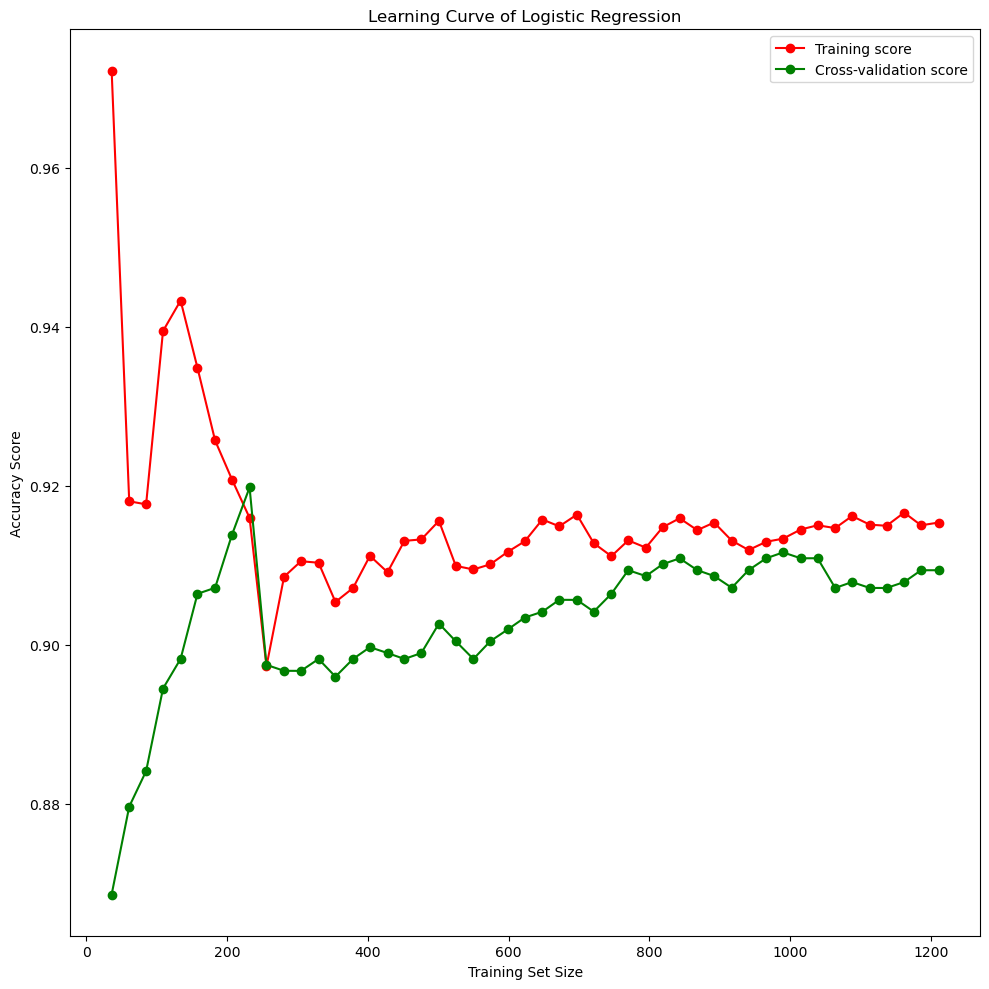

In [161]:
#Plotting the Learning Curve of Logistic Regression to check the model against Overfitting

def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes, scoring):
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")


    plt.title("Learning Curve of Logistic Regression")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()



from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

# Specify cross-validation strategy (e.g., ShuffleSplit)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Specify different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Specify scoring metric (e.g., accuracy)
scoring = 'accuracy'

# Plot the learning curve
plot_learning_curve(modelLr, X_train, y_train, X_val, y_val,  train_sizes, scoring)


In [162]:
#Random Forest

#Creating the instance of Random Forest Classifier model
modelRf = RandomForestClassifier()


#Fitting the model againsts training data
modelRf.fit(X_train, y_train)

#Predicting the output against validation set
y_val_predRf = modelRf.predict(X_val)

#Predicting the output against test set
y_test_predRf = modelRf.predict(X_test)

#Validation set accuracy
val_acc_score = accuracy_score(y_val, y_val_predRf)

#Validation set precision
val_pre_score = precision_score(y_val, y_val_predRf)

print('Validation accuracy of RF: ' + str(val_acc_score))
print('Validation precision of RF: ' + str(val_pre_score))


#Test set accuracy
acc_score = accuracy_score(y_test, y_test_predRf)

#Test set precision
pre_score = precision_score(y_test, y_test_predRf)

print('Test accuracy of RF: ' + str(acc_score))
print('Test precision of RF: ' + str(pre_score))

print('Difference in Validation and Test Accuracy of RandomForest:' + str((pre_score-acc_score)*100))


#Plotting Confusion matrix to evaluate the performance
cmRf = confusion_matrix(y_test, y_test_predRf)
print(cmRf)

#Plotting classification report to evaluate the performance
crRf = classification_report(y_test, y_test_predRf)
print(crRf)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2173594717.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)


Validation accuracy of RF: 0.9563253012048193
Validation precision of RF: 0.974025974025974
Test accuracy of RF: 0.9565656565656566
Test precision of RF: 0.9640718562874252
Difference in Validation and Test Accuracy of RandomForest:0.750619972176858
[[464  18]
 [ 25 483]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96       482
         1.0       0.96      0.95      0.96       508

    accuracy                           0.96       990
   macro avg       0.96      0.96      0.96       990
weighted avg       0.96      0.96      0.96       990



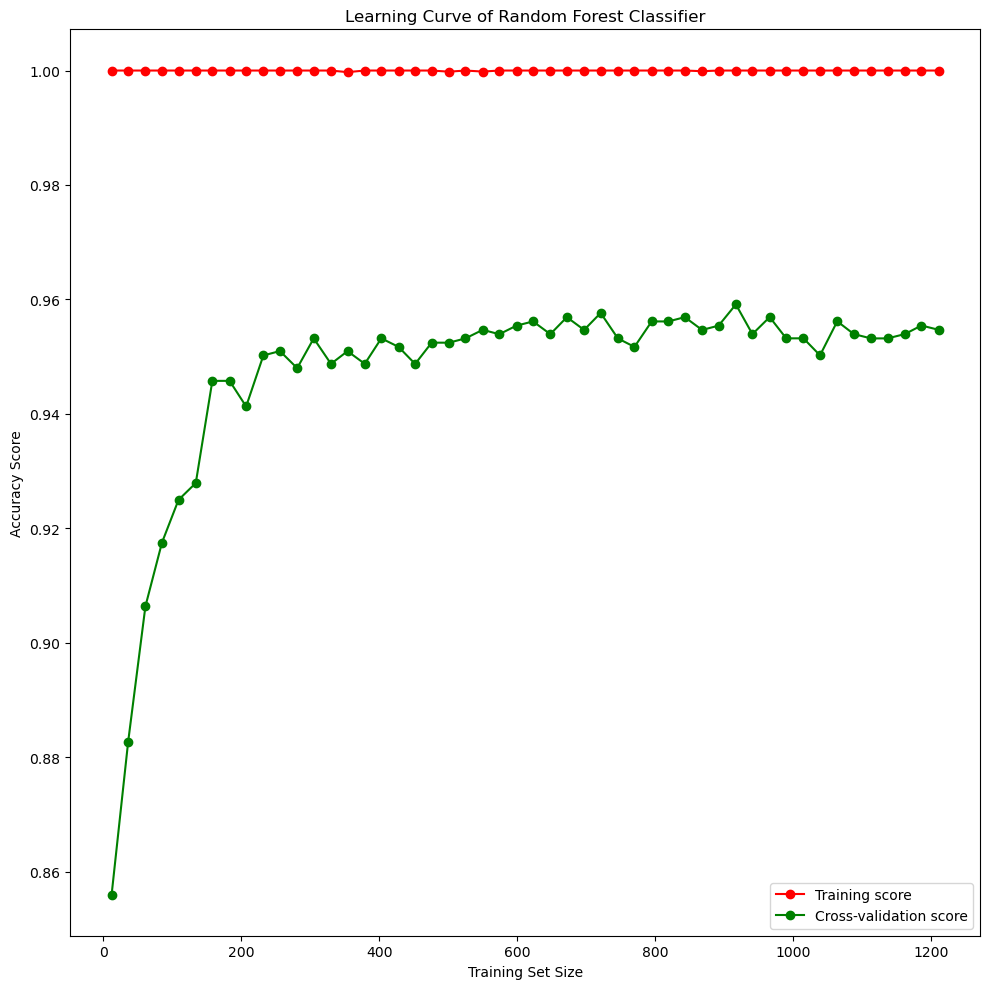

In [163]:
#Plotting the Learning Curve of Random Forest Classifier to check against overfitting

def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes, scoring):
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")


    plt.title("Learning Curve of Random Forest Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


# Example usage
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

# Specify cross-validation strategy (e.g., ShuffleSplit)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Specify different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Specify scoring metric (e.g., accuracy)
scoring = 'accuracy'

# Plot the learning curve
plot_learning_curve(modelRf, X_train, y_train, X_val, y_val,  train_sizes, scoring)






In [164]:
#Decision Tree

#Creating the instance of Decision Tree Classifier model
modelDt = DecisionTreeClassifier()

#Fitting the model againsts training data
modelDt.fit(X_train, y_train)

#predicting the output against validation set
y_val_predDt = modelDt.predict(X_val)

#predicting the output against test set
y_test_predDt = modelDt.predict(X_test)

#Calculating the validation set accuracy
val_acc_score = accuracy_score(y_val, y_val_predDt)

#Calculating the validation set precision
val_pre_score = precision_score(y_val, y_val_predDt)

print('Validation accuracy of DT: ' + str(val_acc_score))
print('Validation precision of DT: ' + str(val_pre_score))

#Calculating the test set accuracy
acc_score = accuracy_score(y_test, y_test_predDt)

#Calculating the test set accuracy
pre_score = precision_score(y_test, y_test_predDt)

print('Test accuracy of DT: ' + str(acc_score))
print('Test precision of DT: ' + str(pre_score))

#Generalisation error to check the performance of the model
print('Difference in Validation and Test Accuracy of DecisionTree:' + str((pre_score-acc_score)*100))

#Plotting Confusion matrix to evaluate the performance
cmDt = confusion_matrix(y_test, y_test_predDt)
print(cmDt)

#Plotting Classification report to evaluate the performance
crDt = classification_report(y_test, y_test_predDt)
print(crDt)

Validation accuracy of DT: 0.9307228915662651
Validation precision of DT: 0.9365079365079365
Test accuracy of DT: 0.9434343434343434
Test precision of DT: 0.9484126984126984
Difference in Validation and Test Accuracy of DecisionTree:0.4978354978354971
[[456  26]
 [ 30 478]]
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94       482
         1.0       0.95      0.94      0.94       508

    accuracy                           0.94       990
   macro avg       0.94      0.94      0.94       990
weighted avg       0.94      0.94      0.94       990



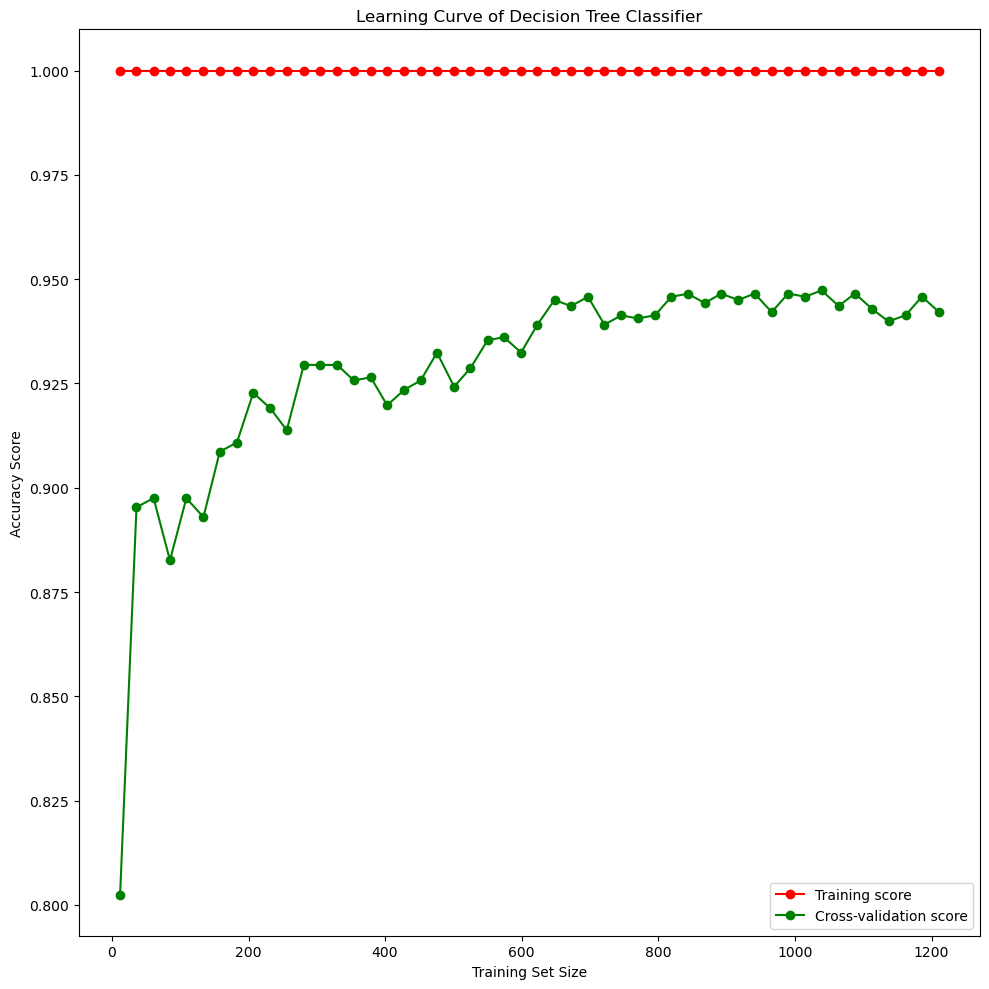

In [165]:
#Plotting Learning Curve for Decision Tree Classifier to check for the overfitting

def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes, scoring):


    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")


    plt.title("Learning Curve of Decision Tree Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()



# Example usage
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

# Specify cross-validation strategy (e.g., ShuffleSplit)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Specify different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Specify scoring metric (e.g., accuracy)
scoring = 'accuracy'

# Plot the learning curve
plot_learning_curve(modelDt, X_train, y_train, X_val, y_val,  train_sizes, scoring)









In [166]:
#Naive Bayes

#Creating the instance of Naive Bayer Classifier 
modelNb = GaussianNB()

#Fitting the model with Training data
modelNb.fit(X_train, y_train)

#predicting the out on validation set
y_val_predNb = modelNb.predict(X_val)

#predicting the out on test set
y_test_predNb = modelNb.predict(X_test)

#Validation set accuracy
val_acc_score = accuracy_score(y_val, y_val_predNb)

#Validation set precision
val_pre_score = precision_score(y_val, y_val_predNb)

print('Validation accuracy of NB: ' + str(val_acc_score))
print('Validation precision of NB: ' + str(val_pre_score))

#Test set accuracy
acc_score = accuracy_score(y_test, y_test_predNb)

#Test set precision
pre_score = precision_score(y_test, y_test_predNb)

print('Test accuracy of NB: ' + str(acc_score))
print('Test precision of NB: ' + str(pre_score))

#Generalisation error to check the performance of the model
print('Difference in Validation and Test Accuracy of Naive Bayes:' + str((pre_score-acc_score)*100))

#Plotting Confusion matrix to evaluate the performance
cmNb = confusion_matrix(y_test, y_test_predNb)
print(cmNb)

#Plotting Confusion matrix to evaluate the performance
crNb = classification_report(y_test, y_test_predNb)
print(crNb)

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Validation accuracy of NB: 0.8719879518072289
Validation precision of NB: 0.7935323383084577
Test accuracy of NB: 0.8787878787878788
Test precision of NB: 0.814935064935065
Difference in Validation and Test Accuracy of Naive Bayes:-6.385281385281383
[[368 114]
 [  6 502]]
              precision    recall  f1-score   support

         0.0       0.98      0.76      0.86       482
         1.0       0.81      0.99      0.89       508

    accuracy                           0.88       990
   macro avg       0.90      0.88      0.88       990
weighted avg       0.90      0.88      0.88       990



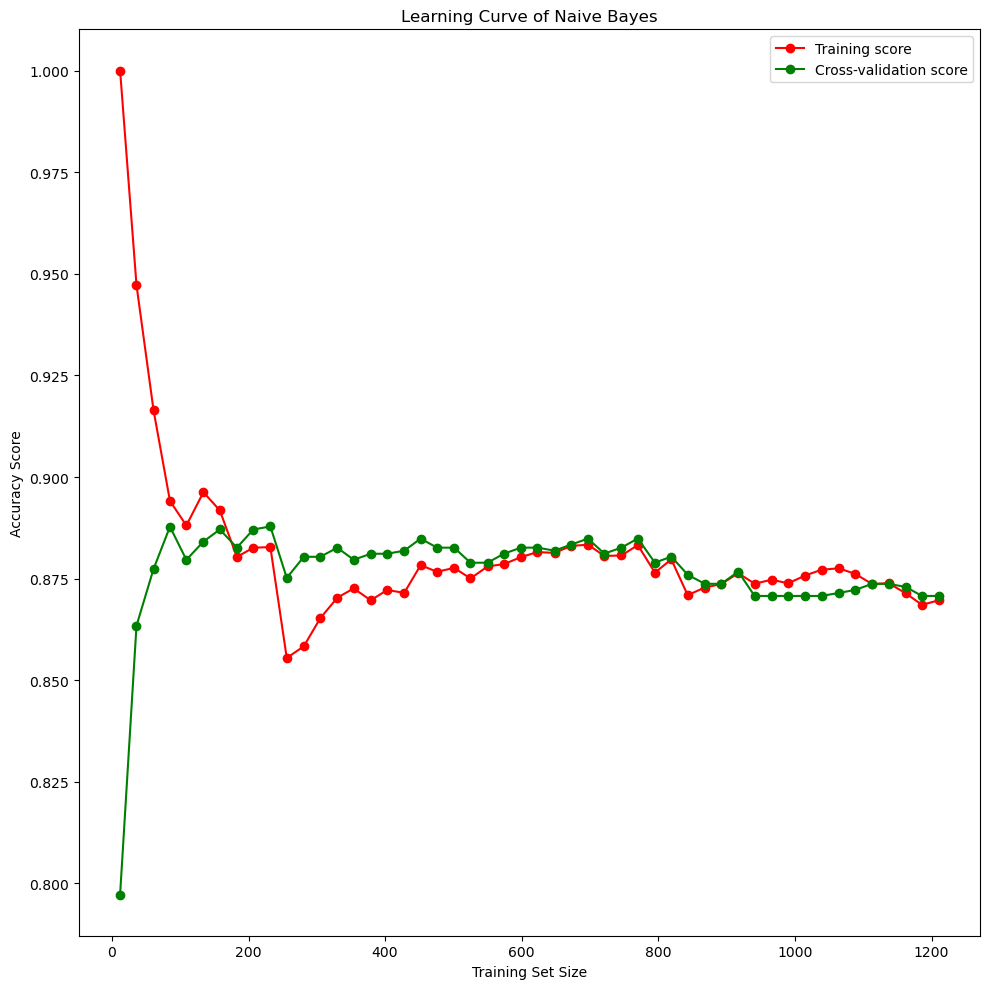

In [167]:
#Plotting the Learning Curve of naive bayes to check against overfitting

def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes, scoring):
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")


    plt.title("Learning Curve of Naive Bayes")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


# Example usage
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

# Specify cross-validation strategy (e.g., ShuffleSplit)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Specify different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Specify scoring metric (e.g., accuracy)
scoring = 'accuracy'

# Plot the learning curve
plot_learning_curve(modelNb, X_train, y_train, X_val, y_val,  train_sizes, scoring)


In [168]:
#Performing cross validation to check the performance of the model on various sets
#Selecting k = 2
 
num_splits = 2
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

accuracy_scoresLr = []
accuracy_scoresRf = []
accuracy_scoresDt = []
accuracy_scoresNb = []

i = 0
for train_index, test_index in kf.split(X):
    i = i+1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    modelLr.fit(X_train, y_train)
    y_predLr = modelLr.predict(X_test)
    accuracyLrInd = accuracy_score(y_test, y_predLr)
    
    modelRf.fit(X_train, y_train)
    y_predRf = modelRf.predict(X_test)
    accuracyRfInd = accuracy_score(y_test, y_predRf)
    
    modelDt.fit(X_train, y_train)
    y_predDt = modelDt.predict(X_test)
    accuracyDtInd = accuracy_score(y_test, y_predDt)
    
    modelNb.fit(X_train, y_train)
    y_predNb = modelNb.predict(X_test)
    accuracyNbInd = accuracy_score(y_test, y_predNb)
    
    print('accuracy of LR' + str(i) + ' ' + str(accuracyLrInd))
    print('accuracy of RF' + str(i) + ' ' + str(accuracyRfInd))
    print('accuracy of DT' + str(i) + ' ' + str(accuracyDtInd))
    print('accuracy of NB' + str(i) + ' ' + str(accuracyNbInd))
    
    accuracyLr = accuracy_score(y_test, y_predLr)
    accuracy_scoresLr.append(accuracyLr)
    
    accuracyRf = accuracy_score(y_test, y_predRf)
    accuracy_scoresRf.append(accuracyRf)
    
    accuracyDt = accuracy_score(y_test, y_predDt)
    accuracy_scoresDt.append(accuracyDt)
    
    accuracyNb = accuracy_score(y_test, y_predNb)
    accuracy_scoresNb.append(accuracyNb)

average_accuracyLr = sum(accuracy_scoresLr)/ num_splits
print('Average accuracy of LR: ' + str(average_accuracyLr))

average_accuracyRf = sum(accuracy_scoresRf)/ num_splits
print('Average accuracy of RF: ' + str(average_accuracyRf))

average_accuracyDt = sum(accuracy_scoresDt)/ num_splits
print(f'Average accuracy of DT: ' + str(average_accuracyDt))

average_accuracyNb = sum(accuracy_scoresNb)/ num_splits
print(f'Average accuracy of NB: ' + str(average_accuracyNb))

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2582742122.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_t

accuracy of LR1 0.9073333333333333
accuracy of RF1 0.9573333333333334
accuracy of DT1 0.93
accuracy of NB1 0.89


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\2582742122.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)


accuracy of LR2 0.9226666666666666
accuracy of RF2 0.9593333333333334
accuracy of DT2 0.9293333333333333
accuracy of NB2 0.8846666666666667
Average accuracy of LR: 0.915
Average accuracy of RF: 0.9583333333333334
Average accuracy of DT: 0.9296666666666666
Average accuracy of NB: 0.8873333333333333


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [169]:
#Selecting k = 5
num_splits = 5
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

accuracy_scoresLr = []
accuracy_scoresRf = []
accuracy_scoresDt = []
accuracy_scoresNb = []

i = 0
for train_index, test_index in kf.split(X):
    i = i+1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    modelLr.fit(X_train, y_train)
    y_predLr = modelLr.predict(X_test)
    accuracyLrInd = accuracy_score(y_test, y_predLr)
    
    modelRf.fit(X_train, y_train)
    y_predRf = modelRf.predict(X_test)
    accuracyRfInd = accuracy_score(y_test, y_predRf)
    
    modelDt.fit(X_train, y_train)
    y_predDt = modelDt.predict(X_test)
    accuracyDtInd = accuracy_score(y_test, y_predDt)
    
    modelNb.fit(X_train, y_train)
    y_predNb = modelNb.predict(X_test)
    accuracyNbInd = accuracy_score(y_test, y_predNb)
    
    print('accuracy of LR' + str(i) + ' ' + str(accuracyLrInd))
    print('accuracy of RF' + str(i) + ' ' + str(accuracyRfInd))
    print('accuracy of DT' + str(i) + ' ' + str(accuracyDtInd))
    print('accuracy of NB' + str(i) + ' ' + str(accuracyNbInd))
    
    accuracyLr = accuracy_score(y_test, y_predLr)
    accuracy_scoresLr.append(accuracyLr)
    
    accuracyRf = accuracy_score(y_test, y_predRf)
    accuracy_scoresRf.append(accuracyRf)
    
    accuracyDt = accuracy_score(y_test, y_predDt)
    accuracy_scoresDt.append(accuracyDt)
    
    accuracyNb = accuracy_score(y_test, y_predNb)
    accuracy_scoresNb.append(accuracyNb)

average_accuracyLr = sum(accuracy_scoresLr)/ num_splits
print('Average accuracy of LR: ' + str(average_accuracyLr))

average_accuracyRf = sum(accuracy_scoresRf)/ num_splits
print('Average accuracy of RF: ' + str(average_accuracyRf))

average_accuracyDt = sum(accuracy_scoresDt)/ num_splits
print(f'Average accuracy of DT: ' + str(average_accuracyDt))

average_accuracyNb = sum(accuracy_scoresNb)/ num_splits
print(f'Average accuracy of NB: ' + str(average_accuracyNb))

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\1857446920.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_t

accuracy of LR1 0.9233333333333333
accuracy of RF1 0.9616666666666667
accuracy of DT1 0.9383333333333334
accuracy of NB1 0.8966666666666666


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\1857446920.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

accuracy of LR2 0.9133333333333333
accuracy of RF2 0.9633333333333334
accuracy of DT2 0.9533333333333334
accuracy of NB2 0.8766666666666667


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\1857446920.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=

accuracy of LR3 0.9083333333333333
accuracy of RF3 0.9616666666666667
accuracy of DT3 0.935
accuracy of NB3 0.8683333333333333


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\1857446920.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_t

accuracy of LR4 0.905
accuracy of RF4 0.95
accuracy of DT4 0.9316666666666666
accuracy of NB4 0.875


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\1857446920.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)


accuracy of LR5 0.9316666666666666
accuracy of RF5 0.9583333333333334
accuracy of DT5 0.9483333333333334
accuracy of NB5 0.8916666666666667
Average accuracy of LR: 0.9163333333333334
Average accuracy of RF: 0.959
Average accuracy of DT: 0.9413333333333334
Average accuracy of NB: 0.8816666666666666


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [170]:
#Selecting k = 10
num_splits = 10
kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

accuracy_scoresLr = []
accuracy_scoresRf = []
accuracy_scoresDt = []
accuracy_scoresNb = []

i = 0
for train_index, test_index in kf.split(X):
    i = i+1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    modelLr.fit(X_train, y_train)
    y_predLr = modelLr.predict(X_test)
    accuracyLrInd = accuracy_score(y_test, y_predLr)
    
    modelRf.fit(X_train, y_train)
    y_predRf = modelRf.predict(X_test)
    accuracyRfInd = accuracy_score(y_test, y_predRf)
    
    modelDt.fit(X_train, y_train)
    y_predDt = modelDt.predict(X_test)
    accuracyDtInd = accuracy_score(y_test, y_predDt)
    
    modelNb.fit(X_train, y_train)
    y_predNb = modelNb.predict(X_test)
    accuracyNbInd = accuracy_score(y_test, y_predNb)
    
    print('accuracy of LR' + str(i) + ' ' + str(accuracyLrInd))
    print('accuracy of RF' + str(i) + ' ' + str(accuracyRfInd))
    print('accuracy of DT' + str(i) + ' ' + str(accuracyDtInd))
    print('accuracy of NB' + str(i) + ' ' + str(accuracyNbInd))
    
    accuracyLr = accuracy_score(y_test, y_predLr)
    accuracy_scoresLr.append(accuracyLr)
    
    accuracyRf = accuracy_score(y_test, y_predRf)
    accuracy_scoresRf.append(accuracyRf)
    
    accuracyDt = accuracy_score(y_test, y_predDt)
    accuracy_scoresDt.append(accuracyDt)
    
    accuracyNb = accuracy_score(y_test, y_predNb)
    accuracy_scoresNb.append(accuracyNb)

average_accuracyLr = sum(accuracy_scoresLr)/ num_splits
print('Average accuracy of LR: ' + str(average_accuracyLr))

average_accuracyRf = sum(accuracy_scoresRf)/ num_splits
print('Average accuracy of RF: ' + str(average_accuracyRf))

average_accuracyDt = sum(accuracy_scoresDt)/ num_splits
print(f'Average accuracy of DT: ' + str(average_accuracyDt))

average_accuracyNb = sum(accuracy_scoresNb)/ num_splits
print(f'Average accuracy of NB: ' + str(average_accuracyNb))

D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_tr

accuracy of LR1 0.9133333333333333
accuracy of RF1 0.9666666666666667
accuracy of DT1 0.9433333333333334
accuracy of NB1 0.9033333333333333


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_tr

accuracy of LR2 0.9266666666666666
accuracy of RF2 0.9533333333333334
accuracy of DT2 0.9333333333333333
accuracy of NB2 0.8866666666666667


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR3 0.9233333333333333
accuracy of RF3 0.9666666666666667
accuracy of DT3 0.9666666666666667
accuracy of NB3 0.8833333333333333


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR4 0.91
accuracy of RF4 0.96
accuracy of DT4 0.94
accuracy of NB4 0.8733333333333333


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR5 0.8866666666666667
accuracy of RF5 0.95
accuracy of DT5 0.92
accuracy of NB5 0.8433333333333334


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR6 0.9366666666666666
accuracy of RF6 0.98
accuracy of DT6 0.9633333333333334
accuracy of NB6 0.8933333333333333


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR7 0.9033333333333333
accuracy of RF7 0.9566666666666667
accuracy of DT7 0.9433333333333334
accuracy of NB7 0.8766666666666667


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR8 0.9033333333333333
accuracy of RF8 0.9466666666666667
accuracy of DT8 0.9333333333333333
accuracy of NB8 0.87


D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\AppData\Local\Temp\ipykernel_17132\247686562.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRf.fit(X_train, y_train)
D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=T

accuracy of LR9 0.9466666666666667
accuracy of RF9 0.9633333333333334
accuracy of DT9 0.9566666666666667
accuracy of NB9 0.92
accuracy of LR10 0.9066666666666666
accuracy of RF10 0.9566666666666667
accuracy of DT10 0.9366666666666666
accuracy of NB10 0.8533333333333334
Average accuracy of LR: 0.9156666666666666
Average accuracy of RF: 0.9600000000000002
Average accuracy of DT: 0.9436666666666668
Average accuracy of NB: 0.8803333333333334


D:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [171]:
from sklearn.model_selection import GridSearchCV

In [172]:
#Using GridSearchCV to get the best parameters for Random Forest Classifier

grid = {
    "n_estimators": [10, 50, 100],
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5, 10],
}
 
grid_searchRf = GridSearchCV(estimator=modelRf, param_grid=grid, scoring='accuracy', cv=5)

grid_searchRf.fit(X_train, y_train)

print(grid_searchRf.best_params_)

print(grid_searchRf.best_score_)

D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
D:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 10}
0.9525925925925925


D:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [173]:
#Final Model

In [174]:
#Creating an instance of RandomForestClassifier with the parameters providing best results
rf_Final = RandomForestClassifier(max_depth = 5, min_samples_split = 10, n_estimators = 10)

#Splitting the data in Training, Test, and Validation set 
X_trainRf, X_tempRf, y_trainRf, y_tempRf = train_test_split(scaled_X, y, test_size=0.33, random_state=42)
X_valRf, X_testRf, y_valRf, y_testRf = train_test_split(X_tempRf, y_tempRf, test_size=0.33, random_state=42)


#fitting the model using training data
rf_Final.fit(X_trainRf, y_trainRf)

#predicting the output of test data
y_predR = rf_Final.predict(X_testRf)

#predicting the output of validation data
y_predValR = rf_Final.predict(X_valRf)

#Test data accuracy 
Rfacc_score = accuracy_score(y_testRf, y_predR)

#Validation data accuracy
RfValacc_score = accuracy_score(y_valRf, y_predValR)


print('accuracy of RF: ' + str(Rfacc_score))
print('Validation accuracy of RF: ' + str(RfValacc_score))

#Plotting confusion matrix to evaluate model performance
cmR = confusion_matrix(y_testRf, y_predR)
print(cmR)

#Plotting classification report to evaluate model performance
crR = classification_report(y_testRf, y_predR)
print(crR)

C:\Users\HP\AppData\Local\Temp\ipykernel_17132\634068763.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_Final.fit(X_trainRf, y_trainRf)


accuracy of RF: 0.9602446483180428
Validation accuracy of RF: 0.9487179487179487
[[161   6]
 [  7 153]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       167
         1.0       0.96      0.96      0.96       160

    accuracy                           0.96       327
   macro avg       0.96      0.96      0.96       327
weighted avg       0.96      0.96      0.96       327



In [175]:
from sklearn import tree

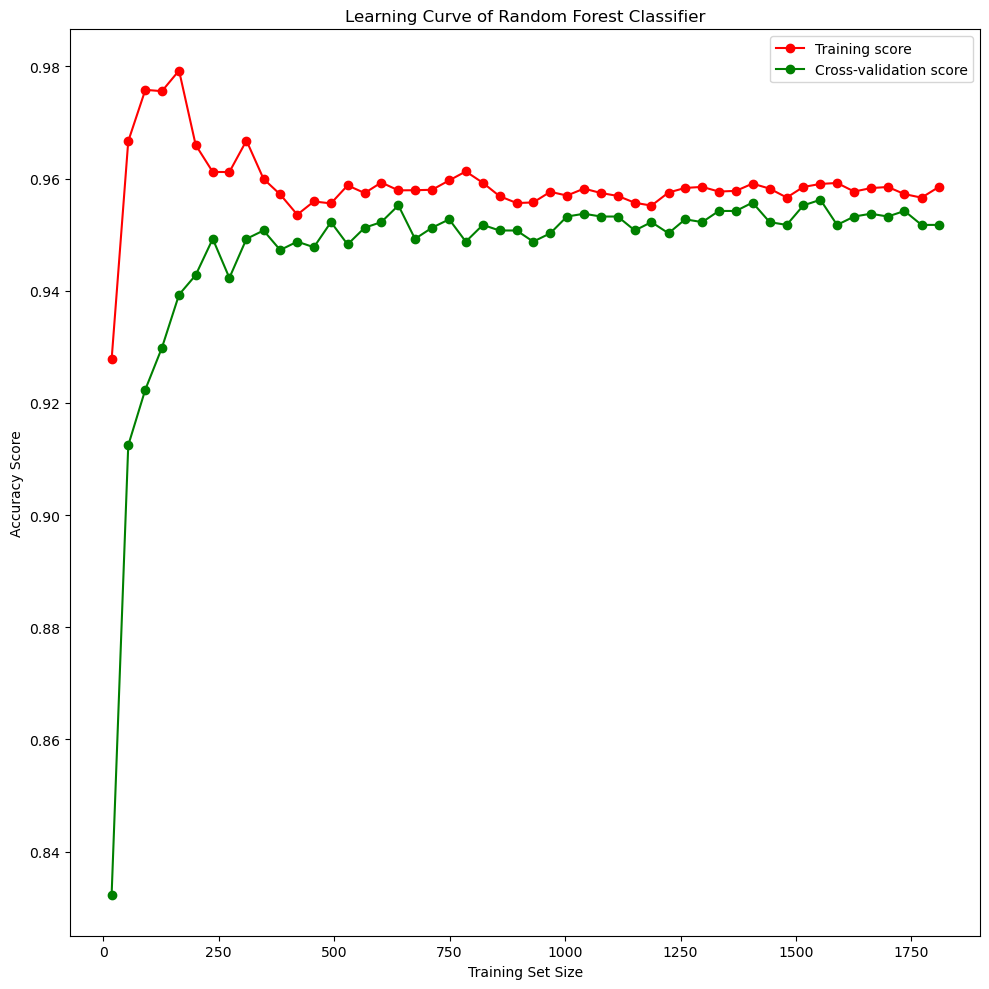

In [176]:
#Plotting the learning curve of the Random Forest classifier

def plot_learning_curve(model, X_train, y_train, X_val, y_val, train_sizes, scoring):
    
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))


    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)


    plt.subplots(1, figsize=(10,10))
    plt.plot(train_sizes, train_mean, 'o-', color="r",  label="Training score")
    plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")


    plt.title("Learning Curve of Random Forest Classifier")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()


# Example usage
from sklearn.datasets import load_digits
from sklearn.model_selection import ShuffleSplit

# Specify cross-validation strategy (e.g., ShuffleSplit)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Specify different training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Specify scoring metric (e.g., accuracy)
scoring = 'accuracy'

# Plot the learning curve
plot_learning_curve(rf_Final, X_trainRf, y_trainRf, X_valRf, y_valRf,  train_sizes, scoring)






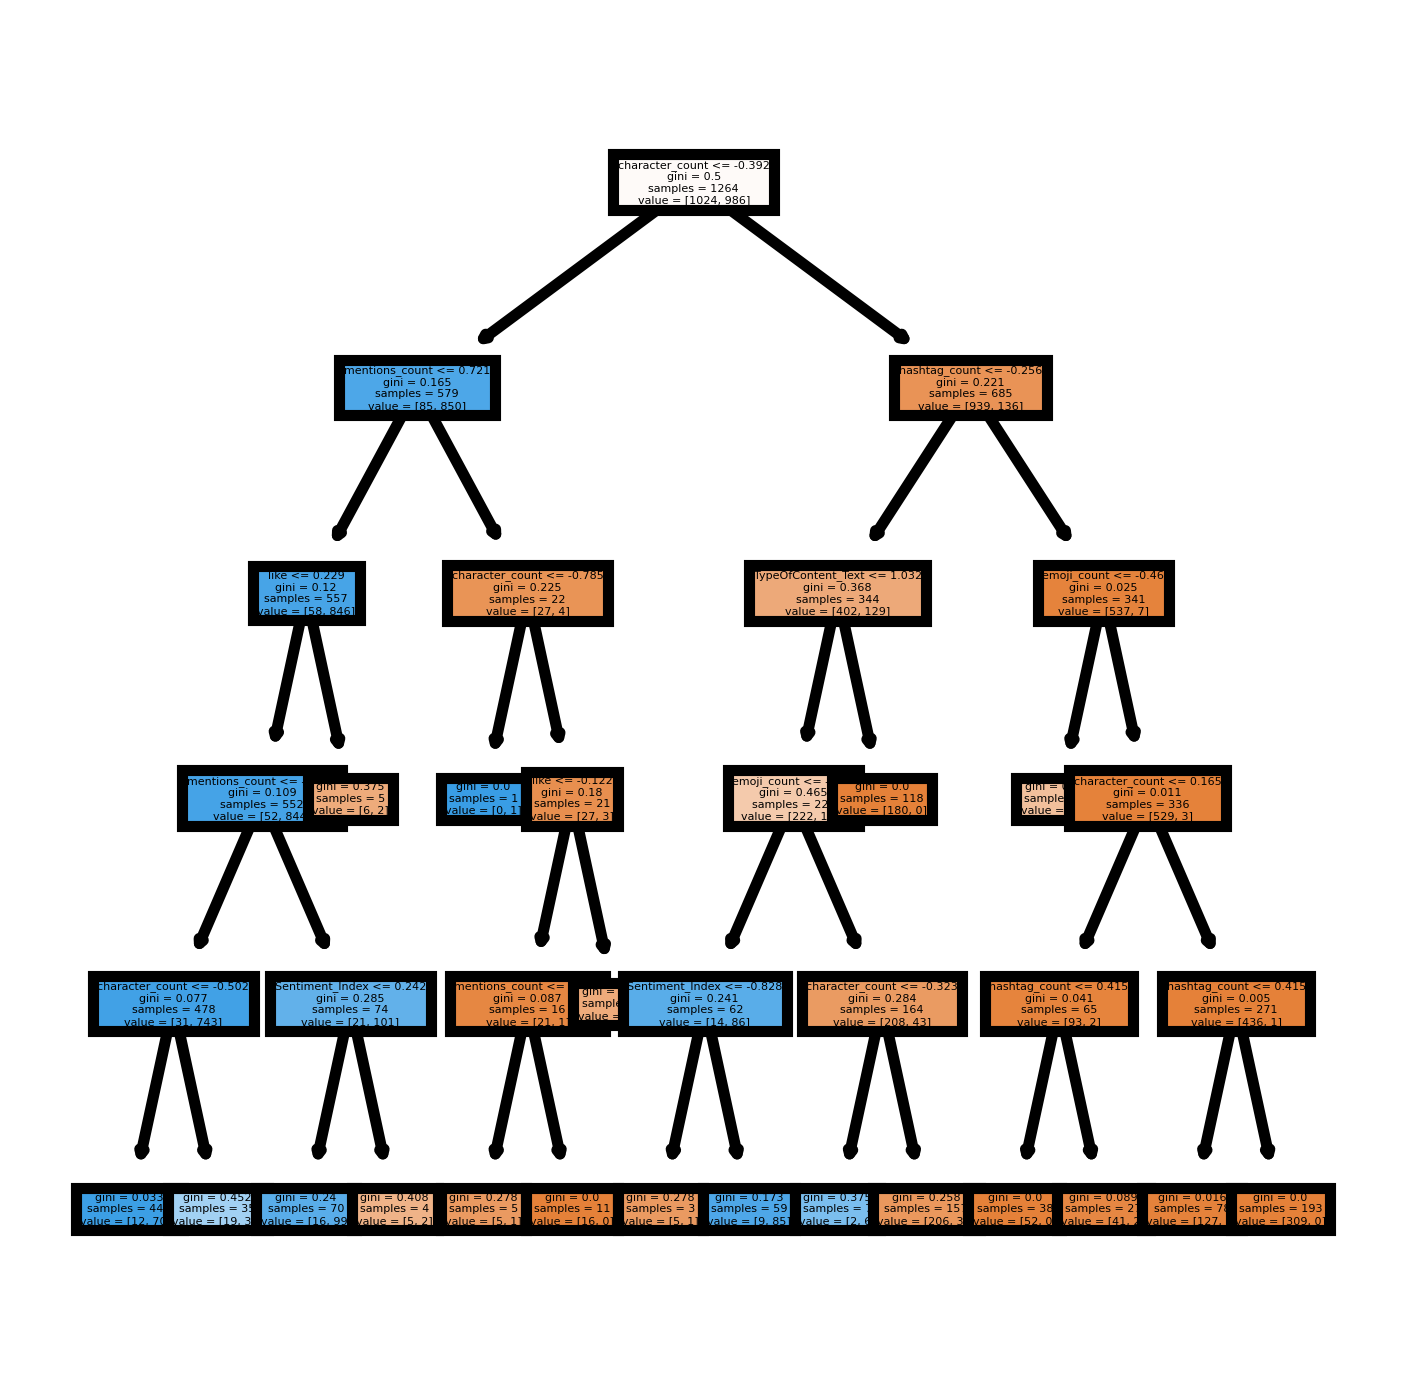

In [177]:
#Plotting the Random Forest Tree

fn=X_testRf.columns


fn
rf_Final.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=800)
tree.plot_tree(rf_Final.estimators_[0],
               feature_names = fn, 
               filled = True);
fig.savefig('rf_individualtree.png')

In [178]:
#Installing shap and pdp box for plotting feature importance

!pip install pdpbox shap

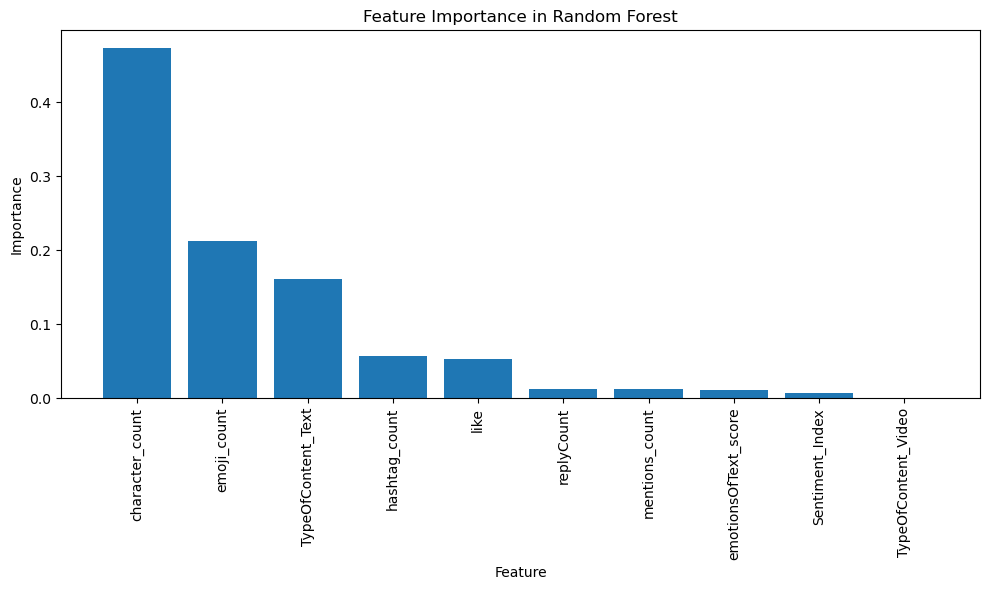

In [179]:
#Plotting feature importance bar graph on Random Forest Model

feature_importances = rf_Final.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]


plt.figure(figsize=(10, 6))
plt.bar(range(X_trainRf.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X_trainRf.shape[1]), [X_trainRf.columns[i] for i in sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Random Forest")
plt.tight_layout()
plt.show()

In [180]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


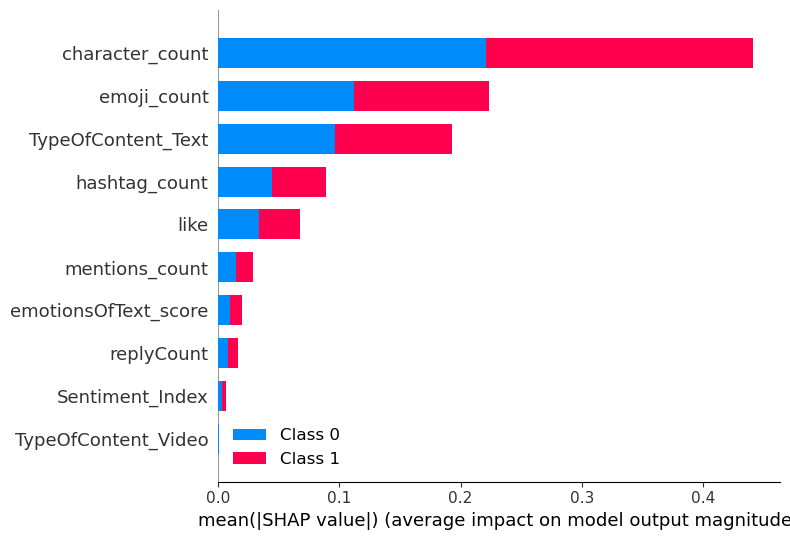

In [181]:
#Plotting shap plot for the measuring the impact of features on the model output

shap_values = shap.TreeExplainer(rf_Final).shap_values(X_trainRf)

shap.summary_plot(shap_values, X_trainRf.columns)

In [182]:
shap_values

[array([[-2.21975400e-02, -4.03026847e-03,  1.42982281e-01, ...,
         -4.59666654e-02, -1.26280029e-04, -4.44258415e-03],
        [-1.88039374e-02, -5.87977137e-03, -1.21152145e-01, ...,
         -7.69254952e-02, -2.47984972e-04, -6.16680046e-03],
        [-2.13991512e-02, -2.53520005e-03,  2.76015695e-02, ...,
          2.58287948e-01, -5.91605543e-05, -7.71135335e-04],
        ...,
        [-2.80994050e-02, -7.38485197e-03,  3.06173619e-02, ...,
         -5.74850652e-02,  7.80690234e-05, -9.42392988e-03],
        [ 5.18238807e-02, -2.71299160e-02, -1.46622228e-01, ...,
         -7.32053000e-02, -2.47984972e-04, -5.99713257e-03],
        [-3.66128085e-02, -4.02231596e-03,  6.89498702e-02, ...,
         -5.04490600e-02,  4.88103090e-04, -4.05668872e-03]]),
 array([[ 2.21975400e-02,  4.03026847e-03, -1.42982281e-01, ...,
          4.59666654e-02,  1.26280029e-04,  4.44258415e-03],
        [ 1.88039374e-02,  5.87977137e-03,  1.21152145e-01, ...,
          7.69254952e-02,  2.47984972e

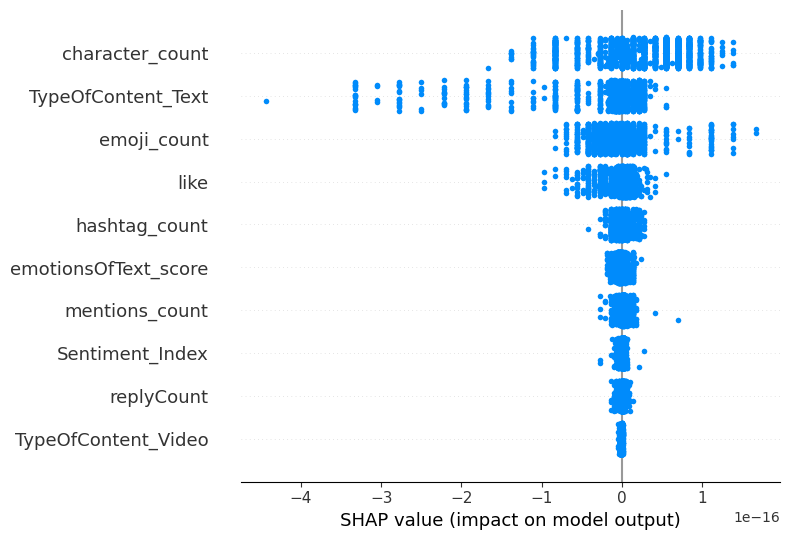

In [183]:
shap_values = shap.TreeExplainer(rf_Final).shap_values(X_trainRf)
mean_shap_values = np.mean(shap_values, axis=0)

shap.summary_plot(mean_shap_values, X_trainRf.columns)